# Statistics - Project ("Direct marketing campaigns")

## Importing the required libraries to do further work on it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## Importing the given Dataset(.csv):

In [3]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\Data.xlsx - Data.csv")
data

banking marketing Unnamed: 1                    Unnamed: 2  \
0      customer id and age.        NaN  Customer salary and balance.   
1                customerid        age                        salary   
2                         1         58                        100000   
3                         2         44                         60000   
4                         3         33                        120000   
...                     ...        ...                           ...   
45208                 45207       51.0                         60000   
45209                 45208       71.0                         55000   
45210                 45209       72.0                         55000   
45211                 45210       57.0                         20000   
45212                 45211       37.0                        120000   

      Unnamed: 3                                         Unnamed: 4  \
0            NaN  Customer marital status and job with education...   
1        balance                                            marital   
2           2143                                            married   
3             29                                             single   
4              2                                            married   
...          ...                                                ...   
45208        825                                            married   
45209       1729                                           divorced   
45210       5715                                            married   
45211        668                                            married   
45212       2971                                            married   

                   Unnamed: 5                                  Unnamed: 6  \
0                         NaN  particular customer before targeted or not   
1                      jobedu                                    targeted   
2         management,tertiary                                         yes   
3        technician,secondary                                         yes   
4      entrepreneur,secondary                                         yes   
...                       ...                                         ...   
45208     technician,tertiary                                         yes   
45209         retired,primary                                         yes   
45210       retired,secondary                                         yes   
45211   blue-collar,secondary                                         yes   
45212  entrepreneur,secondary                                         yes   

      Unnamed: 7                          Unnamed: 8 Unnamed: 9   Unnamed: 10  \
0            NaN  Loan types: loans or housing loans        NaN  Contact type   
1        default                             housing       loan       contact   
2             no                                 yes         no       unknown   
3             no                                 yes         no       unknown   
4             no                                 yes        yes       unknown   
...          ...                                 ...        ...           ...   
45208         no                                  no         no      cellular   
45209         no                                  no         no      cellular   
45210         no                                  no         no      cellular   
45211         no                                  no         no     telephone   
45212         no                                  no         no      cellular   

      Unnamed: 11       Unnamed: 12           Unnamed: 13 Unnamed: 14  \
0             NaN  month of contact      duration of call         NaN   
1             day             month              duration    campaign   
2               5         may, 2017               261 sec           1   
3               5         may, 2017               151 sec           1   
4               5         may

In [4]:
(data[1:2])

banking marketing Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
1        customerid        age     salary    balance    marital     jobedu   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  \
1   targeted    default    housing       loan     contact         day   

  Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17  \
1       month    duration    campaign       pdays    previous    poutcome   

  Unnamed: 18  
1    response

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45213 entries, 0 to 45212
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   banking marketing  45213 non-null  object
 1   Unnamed: 1         45192 non-null  object
 2   Unnamed: 2         45213 non-null  object
 3   Unnamed: 3         45212 non-null  object
 4   Unnamed: 4         45213 non-null  object
 5   Unnamed: 5         45212 non-null  object
 6   Unnamed: 6         45213 non-null  object
 7   Unnamed: 7         45212 non-null  object
 8   Unnamed: 8         45213 non-null  object
 9   Unnamed: 9         45212 non-null  object
 10  Unnamed: 10        45213 non-null  object
 11  Unnamed: 11        45212 non-null  object
 12  Unnamed: 12        45163 non-null  object
 13  Unnamed: 13        45213 non-null  object
 14  Unnamed: 14        45212 non-null  object
 15  Unnamed: 15        45212 non-null  object
 16  Unnamed: 16        45212 non-null  objec

## Data Cleaning(EDA):

### Droping the two unnecessary rows

In [7]:
data.drop([0],axis=0,inplace=True)
data.drop([1],axis=0,inplace=True)
data

banking marketing Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4  \
2                     1         58     100000       2143    married   
3                     2         44      60000         29     single   
4                     3         33     120000          2    married   
5                     4         47      20000       1506    married   
6                     5         33          0          1     single   
...                 ...        ...        ...        ...        ...   
45208             45207       51.0      60000        825    married   
45209             45208       71.0      55000       1729   divorced   
45210             45209       72.0      55000       5715    married   
45211             45210       57.0      20000        668    married   
45212             45211       37.0     120000       2971    married   

                   Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
2         management,tertiary        yes         no        yes         no   
3        technician,secondary        yes         no        yes         no   
4      entrepreneur,secondary        yes         no        yes        yes   
5         blue-collar,unknown         no         no        yes         no   
6             unknown,unknown         no         no         no         no   
...                       ...        ...        ...        ...        ...   
45208     technician,tertiary        yes         no         no         no   
45209         retired,primary        yes         no         no         no   
45210       retired,secondary        yes         no         no         no   
45211   blue-collar,secondary        yes         no         no         no   
45212  entrepreneur,secondary        yes         no         no         no   

      Unnamed: 10 Unnamed: 11 Unnamed: 12           Unnamed: 13 Unnamed: 14  \
2         unknown           5   may, 2017               261 sec           1   
3         unknown           5   may, 2017               151 sec           1   
4         unknown           5   may, 2017                76 sec           1   
5         unknown           5   may, 2017                92 sec           1   
6         unknown           5   may, 2017               198 sec           1   
...           ...         ...         ...                   ...         ...   
45208    cellular          17   nov, 2017  16.2833333333333 min           3   
45209    cellular          17   nov, 2017               7.6 min           2   
45210    cellular          17   nov, 2017  18.7833333333333 min           5   
45211   telephone          17   nov, 2017  8.46666666666667 min           4   
45212    cellular          17   nov, 2017  6.01666666666667 min           2   

      Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18  
2              -1           0     unknown          no  
3              -1           0     unknown          no  
4              -1           0     unknown          no  
5              -1           0     unknown          no  
6              -1           0     unknown          no  
...           ...         ...         ...         ...  
45208          -1           0     unknown         yes  
45209          -1           0     unknown         yes  
45210         184           3     success         yes  
45211          -1           0     unknown          no  
45212         188          11       other          no  

[45211 rows x 19 columns]

### Giving meaningfull tags to the unnamed colums

In [8]:
data.rename(columns = {'Unnamed: 1':'Age','Unnamed: 2':'Salary','Unnamed: 3':'Balance','Unnamed: 4':'Merital status','Unnamed: 5':'Job Education','Unnamed: 6':'Targeted','Unnamed: 7':'Default','Unnamed: 8':'Housing','Unnamed: 9':'Loan','Unnamed: 10':'Contact','Unnamed: 11':'Day','Unnamed: 12':'Month','Unnamed: 13':'Duration(min)','Unnamed: 14':'Campaign','Unnamed: 15':'Pdays','Unnamed: 16':'Previous','Unnamed: 17':'Poutcome','Unnamed: 18':'Response'},inplace=True)
data=data.reset_index()
data.drop('index',axis=1,inplace=True)
data

banking marketing   Age  Salary Balance Merital status  \
0                     1    58  100000    2143        married   
1                     2    44   60000      29         single   
2                     3    33  120000       2        married   
3                     4    47   20000    1506        married   
4                     5    33       0       1         single   
...                 ...   ...     ...     ...            ...   
45206             45207  51.0   60000     825        married   
45207             45208  71.0   55000    1729       divorced   
45208             45209  72.0   55000    5715        married   
45209             45210  57.0   20000     668        married   
45210             45211  37.0  120000    2971        married   

                Job Education Targeted Default Housing Loan    Contact Day  \
0         management,tertiary      yes      no     yes   no    unknown   5   
1        technician,secondary      yes      no     yes   no    unknown   5   
2      entrepreneur,secondary      yes      no     yes  yes    unknown   5   
3         blue-collar,unknown       no      no     yes   no    unknown   5   
4             unknown,unknown       no      no      no   no    unknown   5   
...                       ...      ...     ...     ...  ...        ...  ..   
45206     technician,tertiary      yes      no      no   no   cellular  17   
45207         retired,primary      yes      no      no   no   cellular  17   
45208       retired,secondary      yes      no      no   no   cellular  17   
45209   blue-collar,secondary      yes      no      no   no  telephone  17   
45210  entrepreneur,secondary      yes      no      no   no   cellular  17   

           Month         Duration(min) Campaign Pdays Previous Poutcome  \
0      may, 2017               261 sec        1    -1        0  unknown   
1      may, 2017               151 sec        1    -1        0  unknown   
2      may, 2017                76 sec        1    -1        0  unknown   
3      may, 2017                92 sec        1    -1        0  unknown   
4      may, 2017               198 sec        1    -1        0  unknown   
...          ...                   ...      ...   ...      ...      ...   
45206  nov, 2017  16.2833333333333 min        3    -1        0  unknown   
45207  nov, 2017               7.6 min        2    -1        0  unknown   
45208  nov, 2017  18.7833333333333 min        5   184        3  success   
45209  nov, 2017  8.46666666666667 min        4    -1        0  unknown   
45210  nov, 2017  6.01666666666667 min        2   188       11    other   

      Response  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45206      yes  
45207      yes  
45208      yes  
45209       no  
45210       no  

[45211 rows x 19 columns]

### Handaling the 'duration(min)' column 

In [9]:
d = [data['Duration(min)']]
for i in d:
    print(i),

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: Duration(min), Length: 45211, dtype: object


(None,)

In [10]:
for i in data['Duration(min)']:
    print((i),sep=',')

261 sec
151 sec
76 sec
92 sec
198 sec
139 sec
217 sec
380 sec
50 sec
55 sec
222 sec
137 sec
517 sec
71 sec
174 sec
353 sec
98 sec
38 sec
219 sec
54 sec
262 sec
164 sec
160 sec
342 sec
181 sec
172 sec
296 sec
127 sec
255 sec
348 sec
225 sec
230 sec
208 sec
226 sec
336 sec
242 sec
365 sec
1666 sec
577 sec
137 sec
160 sec
180 sec
22 sec
1492 sec
616 sec
242 sec
355 sec
225 sec
160 sec
363 sec
266 sec
253 sec
179 sec
787 sec
145 sec
174 sec
104 sec
13 sec
185 sec
1778 sec
138 sec
812 sec
164 sec
391 sec
357 sec
91 sec
528 sec
273 sec
158 sec
177 sec
258 sec
172 sec
154 sec
291 sec
181 sec
176 sec
211 sec
349 sec
272 sec
208 sec
193 sec
212 sec
20 sec
1042 sec
246 sec
529 sec
1467 sec
1389 sec
188 sec
180 sec
48 sec
213 sec
583 sec
221 sec
173 sec
426 sec
287 sec
101 sec
203 sec
197 sec
257 sec
124 sec
229 sec
55 sec
400 sec
197 sec
190 sec
21 sec
514 sec
849 sec
194 sec
144 sec
212 sec
286 sec
107 sec
247 sec
518 sec
364 sec
178 sec
98 sec
439 sec
79 sec
120 sec
127 sec
175 sec
262 sec
61 

187 sec
166 sec
144 sec
690 sec
323 sec
194 sec
82 sec
269 sec
285 sec
101 sec
294 sec
1119 sec
249 sec
106 sec
152 sec
12 sec
187 sec
214 sec
268 sec
193 sec
95 sec
60 sec
381 sec
206 sec
75 sec
128 sec
216 sec
155 sec
103 sec
494 sec
107 sec
147 sec
190 sec
339 sec
198 sec
141 sec
255 sec
1120 sec
306 sec
249 sec
215 sec
143 sec
162 sec
81 sec
33 sec
204 sec
124 sec
784 sec
393 sec
87 sec
108 sec
207 sec
278 sec
74 sec
196 sec
149 sec
287 sec
229 sec
154 sec
357 sec
147 sec
93 sec
665 sec
131 sec
160 sec
74 sec
60 sec
82 sec
475 sec
111 sec
284 sec
140 sec
110 sec
64 sec
149 sec
256 sec
156 sec
63 sec
362 sec
32 sec
712 sec
102 sec
338 sec
69 sec
446 sec
249 sec
176 sec
1007 sec
266 sec
172 sec
323 sec
175 sec
459 sec
211 sec
237 sec
50 sec
500 sec
186 sec
96 sec
98 sec
364 sec
477 sec
319 sec
178 sec
513 sec
170 sec
139 sec
70 sec
110 sec
280 sec
667 sec
63 sec
159 sec
177 sec
108 sec
194 sec
366 sec
213 sec
141 sec
982 sec
168 sec
468 sec
180 sec
195 sec
352 sec
91 sec
288 sec
72 s

143 sec
191 sec
833 sec
356 sec
485 sec
57 sec
930 sec
247 sec
208 sec
89 sec
72 sec
260 sec
129 sec
151 sec
181 sec
125 sec
225 sec
829 sec
749 sec
166 sec
87 sec
407 sec
438 sec
387 sec
100 sec
413 sec
521 sec
133 sec
191 sec
521 sec
109 sec
345 sec
1028 sec
566 sec
38 sec
314 sec
214 sec
248 sec
246 sec
136 sec
98 sec
225 sec
364 sec
784 sec
93 sec
57 sec
160 sec
210 sec
222 sec
21 sec
222 sec
157 sec
143 sec
371 sec
161 sec
350 sec
135 sec
162 sec
565 sec
850 sec
44 sec
337 sec
416 sec
102 sec
5 sec
129 sec
977 sec
138 sec
70 sec
71 sec
75 sec
230 sec
369 sec
136 sec
22 sec
378 sec
240 sec
80 sec
144 sec
380 sec
108 sec
927 sec
389 sec
192 sec
273 sec
48 sec
8 sec
628 sec
90 sec
221 sec
217 sec
762 sec
193 sec
302 sec
411 sec
245 sec
746 sec
673 sec
220 sec
232 sec
115 sec
485 sec
106 sec
107 sec
1044 sec
180 sec
354 sec
55 sec
392 sec
123 sec
148 sec
74 sec
267 sec
374 sec
295 sec
149 sec
226 sec
668 sec
95 sec
229 sec
252 sec
286 sec
242 sec
335 sec
323 sec
140 sec
159 sec
293 se

102 sec
183 sec
70 sec
19 sec
346 sec
643 sec
78 sec
411 sec
133 sec
193 sec
590 sec
151 sec
109 sec
263 sec
103 sec
333 sec
104 sec
191 sec
571 sec
180 sec
657 sec
107 sec
335 sec
120 sec
219 sec
148 sec
214 sec
400 sec
503 sec
125 sec
329 sec
194 sec
7 sec
53 sec
344 sec
104 sec
552 sec
345 sec
263 sec
88 sec
44 sec
401 sec
178 sec
53 sec
349 sec
34 sec
48 sec
182 sec
147 sec
457 sec
193 sec
142 sec
123 sec
65 sec
420 sec
100 sec
403 sec
229 sec
445 sec
206 sec
182 sec
183 sec
140 sec
134 sec
88 sec
234 sec
215 sec
194 sec
394 sec
5 sec
408 sec
114 sec
210 sec
243 sec
180 sec
8 sec
458 sec
313 sec
1622 sec
324 sec
205 sec
310 sec
194 sec
165 sec
86 sec
160 sec
492 sec
187 sec
197 sec
95 sec
159 sec
967 sec
221 sec
102 sec
579 sec
124 sec
158 sec
162 sec
211 sec
51 sec
173 sec
220 sec
110 sec
99 sec
112 sec
168 sec
283 sec
235 sec
138 sec
374 sec
353 sec
147 sec
332 sec
179 sec
571 sec
492 sec
265 sec
360 sec
175 sec
97 sec
84 sec
57 sec
105 sec
886 sec
182 sec
467 sec
18 sec
21 sec
4

144 sec
426 sec
241 sec
181 sec
39 sec
293 sec
316 sec
151 sec
132 sec
129 sec
106 sec
68 sec
173 sec
161 sec
155 sec
109 sec
36 sec
62 sec
137 sec
310 sec
195 sec
139 sec
470 sec
169 sec
223 sec
104 sec
201 sec
596 sec
90 sec
157 sec
253 sec
88 sec
600 sec
133 sec
138 sec
43 sec
731 sec
659 sec
112 sec
124 sec
217 sec
59 sec
121 sec
112 sec
98 sec
125 sec
175 sec
202 sec
185 sec
170 sec
98 sec
184 sec
261 sec
103 sec
190 sec
46 sec
198 sec
170 sec
235 sec
169 sec
125 sec
272 sec
265 sec
233 sec
307 sec
246 sec
290 sec
56 sec
259 sec
375 sec
74 sec
290 sec
148 sec
174 sec
32 sec
316 sec
332 sec
35 sec
935 sec
173 sec
144 sec
474 sec
313 sec
147 sec
123 sec
395 sec
93 sec
421 sec
166 sec
410 sec
89 sec
755 sec
139 sec
145 sec
95 sec
191 sec
211 sec
193 sec
220 sec
88 sec
120 sec
318 sec
405 sec
751 sec
207 sec
95 sec
319 sec
272 sec
142 sec
233 sec
498 sec
27 sec
127 sec
237 sec
193 sec
129 sec
116 sec
99 sec
345 sec
151 sec
376 sec
99 sec
210 sec
277 sec
326 sec
305 sec
320 sec
298 sec

99 sec
165 sec
121 sec
217 sec
129 sec
200 sec
431 sec
417 sec
480 sec
331 sec
359 sec
332 sec
535 sec
147 sec
13 sec
689 sec
242 sec
122 sec
665 sec
97 sec
322 sec
144 sec
376 sec
480 sec
158 sec
609 sec
161 sec
116 sec
76 sec
217 sec
112 sec
607 sec
726 sec
148 sec
135 sec
1059 sec
184 sec
245 sec
253 sec
293 sec
246 sec
195 sec
221 sec
166 sec
385 sec
789 sec
85 sec
173 sec
48 sec
410 sec
311 sec
81 sec
558 sec
109 sec
77 sec
70 sec
229 sec
565 sec
145 sec
792 sec
199 sec
488 sec
176 sec
123 sec
88 sec
768 sec
105 sec
101 sec
33 sec
122 sec
52 sec
150 sec
399 sec
58 sec
199 sec
260 sec
241 sec
399 sec
40 sec
167 sec
637 sec
107 sec
68 sec
137 sec
182 sec
553 sec
310 sec
206 sec
119 sec
764 sec
833 sec
126 sec
91 sec
251 sec
166 sec
188 sec
60 sec
368 sec
414 sec
128 sec
685 sec
512 sec
102 sec
1611 sec
44 sec
162 sec
74 sec
118 sec
725 sec
100 sec
124 sec
752 sec
233 sec
241 sec
430 sec
219 sec
67 sec
294 sec
318 sec
428 sec
1185 sec
110 sec
323 sec
58 sec
386 sec
218 sec
153 sec
84

150 sec
209 sec
86 sec
67 sec
197 sec
87 sec
75 sec
450 sec
216 sec
174 sec
180 sec
20 sec
179 sec
73 sec
55 sec
222 sec
267 sec
69 sec
186 sec
63 sec
166 sec
332 sec
542 sec
301 sec
207 sec
115 sec
159 sec
117 sec
159 sec
238 sec
161 sec
1173 sec
206 sec
438 sec
250 sec
46 sec
147 sec
275 sec
26 sec
202 sec
963 sec
50 sec
236 sec
272 sec
112 sec
384 sec
361 sec
49 sec
953 sec
148 sec
233 sec
409 sec
194 sec
538 sec
103 sec
579 sec
183 sec
117 sec
210 sec
175 sec
186 sec
23 sec
268 sec
68 sec
157 sec
132 sec
43 sec
363 sec
517 sec
315 sec
143 sec
73 sec
45 sec
447 sec
342 sec
119 sec
150 sec
110 sec
166 sec
65 sec
404 sec
280 sec
157 sec
170 sec
80 sec
34 sec
258 sec
291 sec
126 sec
88 sec
941 sec
349 sec
170 sec
102 sec
131 sec
384 sec
440 sec
143 sec
284 sec
290 sec
161 sec
247 sec
123 sec
771 sec
103 sec
132 sec
235 sec
1025 sec
45 sec
21 sec
243 sec
131 sec
316 sec
192 sec
145 sec
288 sec
23 sec
569 sec
23 sec
379 sec
406 sec
106 sec
393 sec
116 sec
25 sec
118 sec
75 sec
54 sec
235

377 sec
315 sec
24 sec
386 sec
79 sec
177 sec
30 sec
182 sec
358 sec
42 sec
227 sec
29 sec
52 sec
360 sec
136 sec
106 sec
141 sec
28 sec
862 sec
32 sec
97 sec
107 sec
94 sec
168 sec
44 sec
460 sec
712 sec
78 sec
262 sec
84 sec
173 sec
175 sec
29 sec
968 sec
219 sec
220 sec
71 sec
642 sec
238 sec
650 sec
159 sec
60 sec
165 sec
82 sec
133 sec
136 sec
136 sec
40 sec
383 sec
464 sec
37 sec
189 sec
176 sec
181 sec
118 sec
217 sec
86 sec
52 sec
185 sec
442 sec
554 sec
247 sec
800 sec
216 sec
57 sec
250 sec
230 sec
300 sec
397 sec
153 sec
78 sec
1041 sec
527 sec
100 sec
308 sec
341 sec
467 sec
178 sec
1288 sec
163 sec
172 sec
301 sec
407 sec
648 sec
311 sec
415 sec
212 sec
264 sec
326 sec
319 sec
186 sec
15 sec
473 sec
274 sec
105 sec
152 sec
18 sec
13 sec
639 sec
2653 sec
160 sec
129 sec
426 sec
460 sec
154 sec
148 sec
252 sec
292 sec
44 sec
384 sec
94 sec
72 sec
36 sec
316 sec
217 sec
180 sec
136 sec
562 sec
422 sec
272 sec
198 sec
17 sec
174 sec
250 sec
95 sec
261 sec
144 sec
59 sec
334 se

76 sec
264 sec
979 sec
89 sec
135 sec
420 sec
548 sec
235 sec
87 sec
169 sec
343 sec
88 sec
68 sec
77 sec
116 sec
363 sec
116 sec
207 sec
311 sec
138 sec
48 sec
390 sec
65 sec
637 sec
564 sec
117 sec
76 sec
128 sec
193 sec
130 sec
269 sec
291 sec
150 sec
1208 sec
144 sec
228 sec
158 sec
585 sec
334 sec
229 sec
117 sec
441 sec
60 sec
47 sec
235 sec
270 sec
192 sec
26 sec
89 sec
61 sec
386 sec
54 sec
272 sec
35 sec
1365 sec
284 sec
53 sec
311 sec
245 sec
64 sec
151 sec
89 sec
66 sec
30 sec
72 sec
120 sec
126 sec
48 sec
262 sec
1062 sec
295 sec
203 sec
906 sec
37 sec
118 sec
18 sec
18 sec
350 sec
421 sec
835 sec
104 sec
164 sec
89 sec
1029 sec
112 sec
744 sec
321 sec
24 sec
213 sec
165 sec
129 sec
371 sec
190 sec
114 sec
221 sec
178 sec
247 sec
680 sec
243 sec
185 sec
110 sec
172 sec
156 sec
34 sec
347 sec
394 sec
59 sec
72 sec
417 sec
96 sec
1528 sec
154 sec
533 sec
107 sec
122 sec
257 sec
23 sec
82 sec
55 sec
67 sec
83 sec
113 sec
59 sec
551 sec
367 sec
220 sec
15 sec
173 sec
37 sec
97 

298 sec
988 sec
123 sec
498 sec
670 sec
82 sec
53 sec
95 sec
123 sec
598 sec
54 sec
364 sec
655 sec
339 sec
662 sec
25 sec
216 sec
41 sec
165 sec
110 sec
137 sec
62 sec
56 sec
790 sec
481 sec
32 sec
183 sec
114 sec
146 sec
404 sec
528 sec
351 sec
51 sec
237 sec
103 sec
146 sec
347 sec
372 sec
411 sec
151 sec
157 sec
43 sec
167 sec
75 sec
249 sec
53 sec
268 sec
259 sec
155 sec
247 sec
100 sec
322 sec
93 sec
231 sec
75 sec
67 sec
71 sec
151 sec
91 sec
292 sec
281 sec
375 sec
168 sec
456 sec
103 sec
305 sec
91 sec
622 sec
650 sec
178 sec
465 sec
626 sec
322 sec
177 sec
519 sec
271 sec
198 sec
677 sec
138 sec
215 sec
251 sec
318 sec
253 sec
344 sec
301 sec
197 sec
71 sec
190 sec
93 sec
29 sec
133 sec
150 sec
150 sec
182 sec
277 sec
176 sec
105 sec
565 sec
138 sec
667 sec
464 sec
3183 sec
406 sec
243 sec
110 sec
113 sec
48 sec
174 sec
529 sec
45 sec
75 sec
422 sec
381 sec
856 sec
59 sec
198 sec
433 sec
159 sec
207 sec
120 sec
121 sec
95 sec
213 sec
110 sec
747 sec
111 sec
302 sec
154 sec
19

93 sec
998 sec
1019 sec
73 sec
211 sec
156 sec
119 sec
30 sec
402 sec
371 sec
226 sec
105 sec
218 sec
158 sec
168 sec
387 sec
68 sec
217 sec
183 sec
129 sec
121 sec
41 sec
327 sec
160 sec
89 sec
105 sec
192 sec
272 sec
364 sec
255 sec
90 sec
624 sec
128 sec
81 sec
51 sec
75 sec
384 sec
268 sec
497 sec
165 sec
42 sec
181 sec
234 sec
121 sec
190 sec
298 sec
356 sec
783 sec
228 sec
1102 sec
441 sec
370 sec
489 sec
103 sec
277 sec
154 sec
144 sec
633 sec
214 sec
37 sec
793 sec
473 sec
140 sec
412 sec
455 sec
503 sec
439 sec
152 sec
174 sec
804 sec
179 sec
961 sec
347 sec
58 sec
221 sec
329 sec
187 sec
39 sec
982 sec
324 sec
171 sec
149 sec
147 sec
45 sec
224 sec
150 sec
117 sec
95 sec
96 sec
48 sec
292 sec
369 sec
100 sec
184 sec
285 sec
418 sec
532 sec
467 sec
38 sec
220 sec
330 sec
584 sec
613 sec
152 sec
542 sec
210 sec
120 sec
122 sec
132 sec
108 sec
80 sec
143 sec
212 sec
279 sec
154 sec
68 sec
182 sec
123 sec
185 sec
478 sec
136 sec
27 sec
173 sec
259 sec
157 sec
277 sec
526 sec
283 

8.6 min
2 min
3.38333333333333 min
1.21666666666667 min
8.03333333333333 min
2.78333333333333 min
9.48333333333333 min
1.56666666666667 min
4.63333333333333 min
2.95 min
1.83333333333333 min
6.38333333333333 min
4.76666666666667 min
1.76666666666667 min
3.71666666666667 min
10.1666666666667 min
5.21666666666667 min
1.8 min
1.93333333333333 min
5.98333333333333 min
1.98333333333333 min
3.96666666666667 min
5.61666666666667 min
1.25 min
3.76666666666667 min
0.183333333333333 min
8.05 min
2.9 min
2.01666666666667 min
0.783333333333333 min
5.13333333333333 min
9.33333333333333 min
4.48333333333333 min
4.1 min
10.6666666666667 min
6.4 min
4.86666666666667 min
2.45 min
1.55 min
4.78333333333333 min
0.416666666666667 min
2.65 min
5.03333333333333 min
1.08333333333333 min
1.5 min
7.31666666666667 min
2.21666666666667 min
1.11666666666667 min
8.23333333333333 min
6.35 min
1.6 min
3.76666666666667 min
5.9 min
1.95 min
8.46666666666667 min
7 min
4.38333333333333 min
10.9666666666667 min
6.0333333

0.95 min
1.16666666666667 min
4.41666666666667 min
1.95 min
7.16666666666667 min
0.8 min
8.95 min
4.31666666666667 min
2.38333333333333 min
1.05 min
4.01666666666667 min
5.95 min
0.35 min
0.216666666666667 min
0.533333333333333 min
2.46666666666667 min
4.36666666666667 min
1.98333333333333 min
0.883333333333333 min
1.53333333333333 min
3.76666666666667 min
3.11666666666667 min
3.46666666666667 min
2.08333333333333 min
2.7 min
4.68333333333333 min
2.31666666666667 min
1.68333333333333 min
3.41666666666667 min
1.08333333333333 min
5.18333333333333 min
1.9 min
3.1 min
2 min
2.28333333333333 min
1.51666666666667 min
2.15 min
3.51666666666667 min
1.3 min
1.11666666666667 min
1.18333333333333 min
2.9 min
1.16666666666667 min
0.966666666666667 min
1.95 min
2.16666666666667 min
1.61666666666667 min
1.26666666666667 min
7.65 min
1.18333333333333 min
3.53333333333333 min
1.28333333333333 min
6.33333333333333 min
2.73333333333333 min
14.2166666666667 min
7.78333333333333 min
0.766666666666667 min

0.95 min
16.8166666666667 min
2.01666666666667 min
1.35 min
0.916666666666667 min
2.35 min
10.4 min
18.2666666666667 min
1.55 min
8.9 min
1.3 min
4.11666666666667 min
8.9 min
7.18333333333333 min
1.46666666666667 min
1.25 min
4.3 min
2.75 min
1.05 min
14.45 min
0.683333333333333 min
3.45 min
12.6833333333333 min
7.1 min
3.9 min
5.16666666666667 min
1.46666666666667 min
4.71666666666667 min
6.96666666666667 min
2.01666666666667 min
3.11666666666667 min
2.35 min
3.13333333333333 min
2.56666666666667 min
5.65 min
2.51666666666667 min
1.76666666666667 min
3.98333333333333 min
9.18333333333333 min
10.7333333333333 min
5.36666666666667 min
4.48333333333333 min
2.06666666666667 min
5.55 min
3.2 min
1.26666666666667 min
7.21666666666667 min
2 min
4.83333333333333 min
1.96666666666667 min
0.966666666666667 min
2.48333333333333 min
1.9 min
1.51666666666667 min
7.13333333333333 min
1.68333333333333 min
0.616666666666667 min
2.11666666666667 min
2.58333333333333 min
4.4 min
6.28333333333333 min
1.

7.76666666666667 min
1.45 min
8.61666666666667 min
5.83333333333333 min
15.35 min
3.61666666666667 min
10.5 min
1.35 min
1.41666666666667 min
1.9 min
0.916666666666667 min
0.466666666666667 min
3.45 min
6.73333333333333 min
1.25 min
18.1333333333333 min
19.1666666666667 min
3.86666666666667 min
3.16666666666667 min
0.616666666666667 min
1.53333333333333 min
6.4 min
5.35 min
0.5 min
0.3 min
6.56666666666667 min
7.51666666666667 min
1.95 min
1.45 min
3.45 min
3.26666666666667 min
3.26666666666667 min
6.88333333333333 min
0.25 min
1.35 min
2.08333333333333 min
9.05 min
0.233333333333333 min
1.51666666666667 min
1.16666666666667 min
2.16666666666667 min
2.51666666666667 min
1.73333333333333 min
7.8 min
0.733333333333333 min
1.7 min
3.05 min
1.03333333333333 min
0.766666666666667 min
1.08333333333333 min
6.58333333333333 min
0.25 min
7.9 min
0.816666666666667 min
1.96666666666667 min
0.5 min
0.466666666666667 min
3.68333333333333 min
0.5 min
3.6 min
2.48333333333333 min
1.83333333333333 min

10.1333333333333 min
3.38333333333333 min
4.91666666666667 min
2.96666666666667 min
6.18333333333333 min
2.45 min
5.11666666666667 min
1.81666666666667 min
1.3 min
16.6 min
2.61666666666667 min
1.53333333333333 min
1.91666666666667 min
1.3 min
1.93333333333333 min
5.23333333333333 min
1.51666666666667 min
1.51666666666667 min
6.4 min
0.766666666666667 min
3.53333333333333 min
2.31666666666667 min
22.6166666666667 min
1.1 min
2.08333333333333 min
6.26666666666667 min
7.58333333333333 min
2.43333333333333 min
1.35 min
3.41666666666667 min
3.2 min
2.53333333333333 min
1.48333333333333 min
6.76666666666667 min
1.71666666666667 min
1.4 min
2.91666666666667 min
1.88333333333333 min
8.83333333333333 min
4.55 min
15.0333333333333 min
2.63333333333333 min
12.3333333333333 min
1.43333333333333 min
2.31666666666667 min
5.78333333333333 min
2 min
1.33333333333333 min
2.9 min
2.33333333333333 min
4.61666666666667 min
14.9666666666667 min
10.6166666666667 min
2.36666666666667 min
3.73333333333333 mi

2.65 min
2.11666666666667 min
1.98333333333333 min
5.05 min
16.15 min
4.91666666666667 min
2.61666666666667 min
13.7166666666667 min
1.48333333333333 min
11.7166666666667 min
10.3 min
2.53333333333333 min
3.75 min
2.18333333333333 min
4.53333333333333 min
7.66666666666667 min
4.11666666666667 min
1.55 min
8.76666666666667 min
7.58333333333333 min
3.56666666666667 min
2.31666666666667 min
3.05 min
2.36666666666667 min
4.3 min
4.78333333333333 min
3.08333333333333 min
7.63333333333333 min
3.51666666666667 min
1.21666666666667 min
2.01666666666667 min
15 min
5.56666666666667 min
1.86666666666667 min
1.46666666666667 min
2.05 min
1.86666666666667 min
1.76666666666667 min
1.91666666666667 min
1.21666666666667 min
1.18333333333333 min
1.83333333333333 min
14.1 min
1.81666666666667 min
3.68333333333333 min
3.88333333333333 min
0.95 min
1.6 min
3.78333333333333 min
2.36666666666667 min
2.11666666666667 min
4.71666666666667 min
1.73333333333333 min
1.51666666666667 min
2.83333333333333 min
7.66

0.9 min
4.25 min
2.21666666666667 min
2.23333333333333 min
0.933333333333333 min
1.3 min
2.7 min
1.96666666666667 min
7.2 min
5.51666666666667 min
1.45 min
1.16666666666667 min
3.7 min
3.55 min
2.76666666666667 min
1.66666666666667 min
0.916666666666667 min
1.71666666666667 min
3.58333333333333 min
1.73333333333333 min
6.01666666666667 min
3.71666666666667 min
3.91666666666667 min
1.6 min
3.5 min
4.6 min
11.1833333333333 min
1.38333333333333 min
3.15 min
2.4 min
2.51666666666667 min
0.85 min
5.73333333333333 min
1.51666666666667 min
4.73333333333333 min
8.16666666666667 min
1.25 min
2.23333333333333 min
2.35 min
4.91666666666667 min
3.3 min
3.31666666666667 min
1.53333333333333 min
8.4 min
1.13333333333333 min
1.68333333333333 min
1.88333333333333 min
2.01666666666667 min
4.4 min
2.55 min
21.55 min
5.98333333333333 min
2.5 min
1.23333333333333 min
3.78333333333333 min
2.15 min
2.08333333333333 min
5.38333333333333 min
1.68333333333333 min
2.13333333333333 min
3.21666666666667 min
4.333

1.36666666666667 min
3.45 min
2.66666666666667 min
2.36666666666667 min
3.28333333333333 min
0.15 min
2.46666666666667 min
3.48333333333333 min
1.56666666666667 min
2.06666666666667 min
2.01666666666667 min
3.31666666666667 min
5.1 min
2.88333333333333 min
4.98333333333333 min
4.46666666666667 min
2.58333333333333 min
2.93333333333333 min
1.86666666666667 min
2.25 min
3.46666666666667 min
2.3 min
4.11666666666667 min
6.53333333333333 min
2.2 min
4.71666666666667 min
2.46666666666667 min
12.25 min
1.83333333333333 min
2.9 min
3.33333333333333 min
5.18333333333333 min
11.1833333333333 min
3.43333333333333 min
1.93333333333333 min
2.31666666666667 min
1.45 min
1.01666666666667 min
10.4333333333333 min
1.71666666666667 min
1.93333333333333 min
2.7 min
1.81666666666667 min
0.8 min
9 min
3.18333333333333 min
5.7 min
4.8 min
3.48333333333333 min
1.51666666666667 min
3.26666666666667 min
1.83333333333333 min
1.91666666666667 min
0.95 min
1.7 min
1.46666666666667 min
1.13333333333333 min
1.3 mi

4.26666666666667 min
4 min
1.46666666666667 min
2.68333333333333 min
2.98333333333333 min
3.33333333333333 min
1.81666666666667 min
5 min
1.05 min
1.75 min
3.55 min
1.86666666666667 min
4.25 min
2.18333333333333 min
1.71666666666667 min
1.28333333333333 min
11.5833333333333 min
2.65 min
1.71666666666667 min
2.6 min
1.35 min
1.56666666666667 min
8.66666666666667 min
0.583333333333333 min
1.6 min
1.6 min
5.75 min
4.08333333333333 min
1.31666666666667 min
2.13333333333333 min
2.5 min
3.4 min
2.6 min
2.8 min
1.11666666666667 min
2.58333333333333 min
1.51666666666667 min
1.46666666666667 min
2.35 min
1.18333333333333 min
2.8 min
3.91666666666667 min
2.26666666666667 min
1.05 min
2.03333333333333 min
3.38333333333333 min
2.28333333333333 min
1.81666666666667 min
4.55 min
2.35 min
1.78333333333333 min
1.43333333333333 min
1.16666666666667 min
1.6 min
6.63333333333333 min
1.35 min
1 min
2.5 min
2.16666666666667 min
2.25 min
4.26666666666667 min
12.1333333333333 min
4.4 min
1.58333333333333 min

1.05 min
4.66666666666667 min
4.21666666666667 min
14.1666666666667 min
8.1 min
1.9 min
2.2 min
2.81666666666667 min
3.76666666666667 min
13.9166666666667 min
3.33333333333333 min
1.58333333333333 min
2.2 min
1.5 min
13.9166666666667 min
2.15 min
0.9 min
10.2166666666667 min
2.5 min
1.76666666666667 min
4.93333333333333 min
1.1 min
6.85 min
4.26666666666667 min
2.58333333333333 min
1.95 min
4.95 min
4.43333333333333 min
7.25 min
1.36666666666667 min
4.28333333333333 min
1.58333333333333 min
2.56666666666667 min
4.41666666666667 min
2.16666666666667 min
4.21666666666667 min
6.61666666666667 min
2.73333333333333 min
1.4 min
15.4833333333333 min
9.93333333333333 min
1.28333333333333 min
6.65 min
3.05 min
15.4 min
0.616666666666667 min
3.3 min
1.65 min
4.23333333333333 min
3.28333333333333 min
7.73333333333333 min
7.55 min
2.23333333333333 min
2.83333333333333 min
6.98333333333333 min
1.36666666666667 min
4.13333333333333 min
10.6333333333333 min
1.3 min
2.7 min
1.4 min
9.76666666666667 mi

1.66666666666667 min
9.35 min
2.3 min
10.6 min
5.95 min
1.96666666666667 min
6.7 min
2.56666666666667 min
1.13333333333333 min
4.81666666666667 min
1.1 min
1.45 min
11.0166666666667 min
4.5 min
1.23333333333333 min
1 min
1.71666666666667 min
4.3 min
3.7 min
2.2 min
2.03333333333333 min
1.03333333333333 min
4.86666666666667 min
10.35 min
1.55 min
0.666666666666667 min
3.16666666666667 min
1.05 min
2.35 min
7.06666666666667 min
3.3 min
2.03333333333333 min
16.6333333333333 min
6.75 min
0.833333333333333 min
0.833333333333333 min
4.85 min
2.28333333333333 min
2.53333333333333 min
17.6166666666667 min
1.06666666666667 min
1.45 min
3.26666666666667 min
2.68333333333333 min
1.15 min
1.63333333333333 min
2.61666666666667 min
2.58333333333333 min
5.68333333333333 min
5.53333333333333 min
3.11666666666667 min
2.1 min
3.11666666666667 min
4.68333333333333 min
0.983333333333333 min
0.616666666666667 min
2.3 min
2.35 min
2.26666666666667 min
2.33333333333333 min
4.56666666666667 min
2.25 min
16.1 

14.5166666666667 min
1.46666666666667 min
4.65 min
3 min
2.6 min
3.91666666666667 min
25.5333333333333 min
4.18333333333333 min
14.7333333333333 min
3.63333333333333 min
10.1833333333333 min
1.25 min
16.4333333333333 min
2.86666666666667 min
5.25 min
1.95 min
2.51666666666667 min
6.65 min
5.28333333333333 min
1.93333333333333 min
1.5 min
1.91666666666667 min
5.05 min
1.3 min
1.61666666666667 min
1.73333333333333 min
1.13333333333333 min
2.26666666666667 min
9.85 min
4.18333333333333 min
5.91666666666667 min
3.85 min
4.18333333333333 min
5.68333333333333 min
1.76666666666667 min
1.83333333333333 min
6.01666666666667 min
6.3 min
7.35 min
4.7 min
3.28333333333333 min
3.61666666666667 min
1.58333333333333 min
2.86666666666667 min
3.5 min
15.8666666666667 min
5.53333333333333 min
1.95 min
3.23333333333333 min
3.88333333333333 min
22.35 min
3.28333333333333 min
2.8 min
11.8833333333333 min
40.3333333333333 min
2.93333333333333 min
3.58333333333333 min
4.86666666666667 min
1.5 min
3.866666666

1.5 min
3.88333333333333 min
11.7666666666667 min
9.53333333333333 min
1.81666666666667 min
13.8166666666667 min
3.01666666666667 min
1.26666666666667 min
0.716666666666667 min
2.58333333333333 min
5.7 min
7.16666666666667 min
2.93333333333333 min
2.86666666666667 min
4.06666666666667 min
6.7 min
5.01666666666667 min
0.933333333333333 min
2.43333333333333 min
1.71666666666667 min
5.91666666666667 min
3.71666666666667 min
3.38333333333333 min
9.56666666666667 min
1.85 min
2.31666666666667 min
0.466666666666667 min
2.3 min
9.35 min
1.13333333333333 min
2.18333333333333 min
6.5 min
1.61666666666667 min
5 min
2.36666666666667 min
8.85 min
9.3 min
4.03333333333333 min
2.2 min
4.25 min
2.6 min
1.81666666666667 min
5.23333333333333 min
3.18333333333333 min
1.33333333333333 min
4.1 min
7.68333333333333 min
5.06666666666667 min
4.26666666666667 min
1.28333333333333 min
1.66666666666667 min
6.23333333333333 min
1.18333333333333 min
0.866666666666667 min
0.5 min
6.86666666666667 min
2.63333333333

1.9 min
6.23333333333333 min
7.7 min
1.23333333333333 min
4.3 min
8.88333333333333 min
9 min
2.81666666666667 min
3.66666666666667 min
3.21666666666667 min
1.7 min
1.11666666666667 min
1.51666666666667 min
3.31666666666667 min
4.98333333333333 min
1.33333333333333 min
2.73333333333333 min
0.9 min
2.35 min
15.5166666666667 min
4 min
7.11666666666667 min
1.55 min
2.38333333333333 min
9.08333333333333 min
1.01666666666667 min
2.3 min
3.78333333333333 min
3.65 min
2.08333333333333 min
1.05 min
2.8 min
1.48333333333333 min
14.35 min
1.43333333333333 min
7.26666666666667 min
2.63333333333333 min
14.4666666666667 min
6.83333333333333 min
3.38333333333333 min
4.25 min
2.55 min
3.21666666666667 min
0.383333333333333 min
3.76666666666667 min
4.45 min
0.183333333333333 min
3.28333333333333 min
2.95 min
2.16666666666667 min
10.8333333333333 min
2.65 min
1.13333333333333 min
21.6 min
0.166666666666667 min
1.45 min
1.5 min
1.48333333333333 min
10.7166666666667 min
0.266666666666667 min
2.76666666666

3.2 min
11.5333333333333 min
0.266666666666667 min
0.7 min
4.5 min
3.31666666666667 min
7.1 min
2.08333333333333 min
0.8 min
4.85 min
12.2666666666667 min
1.25 min
1.1 min
2.41666666666667 min
4.58333333333333 min
3.31666666666667 min
8.58333333333333 min
1.56666666666667 min
4.3 min
6.33333333333333 min
0.866666666666667 min
0.866666666666667 min
23.6 min
1.2 min
3.21666666666667 min
2.13333333333333 min
0.933333333333333 min
11.9666666666667 min
5.26666666666667 min
2.76666666666667 min
7.13333333333333 min
1.33333333333333 min
1.48333333333333 min
1.3 min
1.96666666666667 min
1.33333333333333 min
5.21666666666667 min
1.86666666666667 min
1.31666666666667 min
5.08333333333333 min
0.883333333333333 min
2.56666666666667 min
3.21666666666667 min
2.26666666666667 min
11.9166666666667 min
2.11666666666667 min
3.21666666666667 min
3.26666666666667 min
10.0833333333333 min
6.75 min
0.416666666666667 min
0.95 min
2.3 min
1.21666666666667 min
3.86666666666667 min
1.38333333333333 min
3.516666

0.266666666666667 min
0.2 min
2.53333333333333 min
0.266666666666667 min
1.75 min
0.116666666666667 min
2.03333333333333 min
0.116666666666667 min
0.2 min
0.633333333333333 min
0.233333333333333 min
1.95 min
0.316666666666667 min
0.783333333333333 min
2.21666666666667 min
1.15 min
0.366666666666667 min
0.85 min
2.31666666666667 min
0.266666666666667 min
2.43333333333333 min
8.36666666666667 min
5.13333333333333 min
4.46666666666667 min
2.93333333333333 min
6.5 min
2.46666666666667 min
0.183333333333333 min
0.2 min
11.6833333333333 min
1.45 min
15.2 min
1.31666666666667 min
1.7 min
2.58333333333333 min
5.7 min
3.16666666666667 min
19.7166666666667 min
0.483333333333333 min
1.18333333333333 min
1.36666666666667 min
3.08333333333333 min
1.95 min
0.45 min
0.466666666666667 min
1.75 min
2.86666666666667 min
4.11666666666667 min
0.433333333333333 min
0.3 min
0.3 min
1 min
6.91666666666667 min
0.75 min
0.6 min
0.7 min
0.2 min
0.216666666666667 min
25.6833333333333 min
0.216666666666667 min
2.

3.4 min
0.583333333333333 min
4.85 min
2.53333333333333 min
3.35 min
4.95 min
3.86666666666667 min
4.16666666666667 min
7.98333333333333 min
5.4 min
4.8 min
6.73333333333333 min
2.6 min
1 min
4 min
11.6666666666667 min
6.71666666666667 min
1.9 min
0.583333333333333 min
3.13333333333333 min
10.3 min
8.8 min
1.73333333333333 min
10.3666666666667 min
2.16666666666667 min
9.71666666666667 min
0.3 min
1.51666666666667 min
5.45 min
12.3833333333333 min
4.71666666666667 min
0.65 min
2.86666666666667 min
4.03333333333333 min
0.5 min
3.3 min
7.9 min
4.58333333333333 min
6.01666666666667 min
2.76666666666667 min
4.21666666666667 min
5.15 min
5.83333333333333 min
5.65 min
8.3 min
2.31666666666667 min
1.28333333333333 min
5 min
0.966666666666667 min
2.08333333333333 min
0.566666666666667 min
3.18333333333333 min
26.3166666666667 min
8.21666666666667 min
3.8 min
7.38333333333333 min
5.26666666666667 min
2.95 min
0.583333333333333 min
9.25 min
8.25 min
1.66666666666667 min
2.5 min
10.2833333333333 m

5.3 min
4.63333333333333 min
7.1 min
3.81666666666667 min
1.23333333333333 min
19.7333333333333 min
7.73333333333333 min
5.56666666666667 min
34.2166666666667 min
1.15 min
1.65 min
4.61666666666667 min
4.7 min
17.7333333333333 min
2.71666666666667 min
8.35 min
4.08333333333333 min
12.3 min
1.65 min
1.45 min
1.83333333333333 min
2.33333333333333 min
3.4 min
5.58333333333333 min
7.43333333333333 min
2.98333333333333 min
2.51666666666667 min
2.9 min
1.61666666666667 min
12.6333333333333 min
7.81666666666667 min
0.8 min
3.73333333333333 min
0.8 min
0.9 min
3.05 min
5.7 min
2.5 min
1.21666666666667 min
6.56666666666667 min
13.65 min
11.5666666666667 min
10.6 min
0.366666666666667 min
0.233333333333333 min
5.28333333333333 min
5.33333333333333 min
1.66666666666667 min
3.96666666666667 min
3.36666666666667 min
0.833333333333333 min
5.35 min
3.36666666666667 min
2.95 min
3.51666666666667 min
1.8 min
3.75 min
15.8666666666667 min
1.98333333333333 min
13.8166666666667 min
2.18333333333333 min
6.

9.18333333333333 min
7.63333333333333 min
6.45 min
1.15 min
5.86666666666667 min
5.98333333333333 min
1.35 min
4.33333333333333 min
5.86666666666667 min
13 min
1.78333333333333 min
9.66666666666667 min
3.56666666666667 min
4.3 min
1.9 min
7.25 min
3.51666666666667 min
7.35 min
6.26666666666667 min
10.25 min
9.25 min
5.68333333333333 min
2.48333333333333 min
15.85 min
1.55 min
6.4 min
2.8 min
11.0666666666667 min
3.06666666666667 min
0.616666666666667 min
1.18333333333333 min
8.13333333333333 min
7.66666666666667 min
16.1666666666667 min
12.6833333333333 min
4.43333333333333 min
10.3 min
2.76666666666667 min
2.03333333333333 min
12.9 min
2.2 min
1.86666666666667 min
2.01666666666667 min
2.91666666666667 min
4.93333333333333 min
5 min
14.35 min
4 min
5.48333333333333 min
6.66666666666667 min
8.38333333333333 min
5.45 min
4.4 min
2.93333333333333 min
1.36666666666667 min
2.11666666666667 min
2.11666666666667 min
3.2 min
0.733333333333333 min
0.933333333333333 min
8.5 min
4.01666666666667 

2.5 min
7.41666666666667 min
2.05 min
4.58333333333333 min
2.93333333333333 min
4.95 min
1.53333333333333 min
12.1333333333333 min
2.11666666666667 min
9.23333333333333 min
2.98333333333333 min
2.3 min
1.63333333333333 min
3.1 min
2.25 min
18.85 min
2.6 min
8.65 min
5.71666666666667 min
1.06666666666667 min
15.05 min
1.76666666666667 min
7.65 min
1.81666666666667 min
1.66666666666667 min
0.783333333333333 min
2.68333333333333 min
0.75 min
3.28333333333333 min
11.45 min
3.85 min
6.48333333333333 min
3.83333333333333 min
5.38333333333333 min
2.08333333333333 min
2.9 min
1.48333333333333 min
1.23333333333333 min
2.5 min
1 min
9 min
3.01666666666667 min
5.08333333333333 min
2.31666666666667 min
2.81666666666667 min
13.7833333333333 min
5.31666666666667 min
3.38333333333333 min
1.81666666666667 min
5.18333333333333 min
2.91666666666667 min
1.83333333333333 min
3.45 min
1.53333333333333 min
2.45 min
15.1833333333333 min
5.35 min
1.5 min
5.28333333333333 min
2.3 min
9.16666666666667 min
13.51

3.45 min
5.76666666666667 min
2.56666666666667 min
3.36666666666667 min
2.45 min
1.43333333333333 min
8.38333333333333 min
2.95 min
3.1 min
5.56666666666667 min
4.56666666666667 min
4.76666666666667 min
2.23333333333333 min
1.73333333333333 min
0.666666666666667 min
10.2 min
8.43333333333333 min
3.18333333333333 min
3.11666666666667 min
4.93333333333333 min
2.9 min
3.73333333333333 min
3.91666666666667 min
2.13333333333333 min
2.4 min
0.916666666666667 min
11.4166666666667 min
7.98333333333333 min
6.88333333333333 min
3.51666666666667 min
2.15 min
4.91666666666667 min
3.61666666666667 min
3.6 min
2.53333333333333 min
17.0666666666667 min
6.75 min
2.15 min
11.3666666666667 min
6.01666666666667 min
5.18333333333333 min
12.4333333333333 min
5.8 min
4.71666666666667 min
1.8 min
9.71666666666667 min
4.41666666666667 min
2.43333333333333 min
8.11666666666667 min
17.4833333333333 min
7.76666666666667 min
5.8 min
4.38333333333333 min
1.38333333333333 min
5.4 min
4.45 min
5.66666666666667 min
9

1.13333333333333 min
0.85 min
1.81666666666667 min
0.383333333333333 min
3.45 min
17.8833333333333 min
2.23333333333333 min
3.21666666666667 min
3.73333333333333 min
2.88333333333333 min
1.11666666666667 min
2.48333333333333 min
0.483333333333333 min
10.1666666666667 min
1.58333333333333 min
1.96666666666667 min
1.4 min
0.716666666666667 min
1.55 min
2.86666666666667 min
2.68333333333333 min
2.86666666666667 min
13.0833333333333 min
10.4666666666667 min
3.33333333333333 min
2.23333333333333 min
0.85 min
14.1666666666667 min
2.33333333333333 min
8.85 min
1.45 min
1.31666666666667 min
2.61666666666667 min
0.316666666666667 min
0.15 min
0.15 min
0.316666666666667 min
0.65 min
10.9833333333333 min
8.36666666666667 min
1.88333333333333 min
4.45 min
0.5 min
5.91666666666667 min
0.716666666666667 min
4 min
0.783333333333333 min
1.15 min
4.93333333333333 min
2.78333333333333 min
5.38333333333333 min
9.5 min
2.45 min
8.6 min
2.95 min
6.46666666666667 min
1.01666666666667 min
9.75 min
2.21666666

2.63333333333333 min
0.483333333333333 min
3.68333333333333 min
3.28333333333333 min
3.05 min
6.33333333333333 min
1.88333333333333 min
3.8 min
0.95 min
8.91666666666667 min
1.51666666666667 min
0.716666666666667 min
4.41666666666667 min
4.98333333333333 min
3.26666666666667 min
24.3666666666667 min
2.7 min
7.75 min
5.06666666666667 min
8.11666666666667 min
4.18333333333333 min
4.35 min
0.133333333333333 min
8 min
2.85 min
6.23333333333333 min
1 min
4.01666666666667 min
2.93333333333333 min
5.05 min
9.43333333333333 min
10.8166666666667 min
2.23333333333333 min
15.9833333333333 min
5.88333333333333 min
5.61666666666667 min
1.55 min
4.85 min
4.2 min
9.1 min
3.4 min
2.53333333333333 min
4.45 min
6.76666666666667 min
5.33333333333333 min
18.2333333333333 min
14.7333333333333 min
6.83333333333333 min
3.5 min
3.3 min
4.01666666666667 min
7.66666666666667 min
10.0666666666667 min
7.11666666666667 min
5.83333333333333 min
2.93333333333333 min
1.55 min
1.96666666666667 min
5.6 min
6.45 min
1.7

8.21666666666667 min
4.91666666666667 min
3.76666666666667 min
4.46666666666667 min
0.55 min
2.53333333333333 min
2.93333333333333 min
2.26666666666667 min
0.683333333333333 min
0.666666666666667 min
0.566666666666667 min
4.2 min
2.6 min
2.1 min
0.916666666666667 min
10.05 min
1.9 min
2.23333333333333 min
1.63333333333333 min
0.3 min
5.03333333333333 min
5.85 min
2.63333333333333 min
1.63333333333333 min
6.31666666666667 min
2.13333333333333 min
5.95 min
1.28333333333333 min
10.5333333333333 min
0.15 min
1.15 min
0.966666666666667 min
2.46666666666667 min
1.63333333333333 min
14.05 min
0.216666666666667 min
0.3 min
5.75 min
0.133333333333333 min
0.95 min
1.55 min
7 min
2.2 min
0.566666666666667 min
4.35 min
2.21666666666667 min
6.63333333333333 min
4.78333333333333 min
3.46666666666667 min
2.98333333333333 min
7.23333333333333 min
1.98333333333333 min
2.33333333333333 min
3.08333333333333 min
0.433333333333333 min
4.83333333333333 min
3.18333333333333 min
0.883333333333333 min
0.733333

1.78333333333333 min
3.96666666666667 min
2.83333333333333 min
5.7 min
1.88333333333333 min
2.83333333333333 min
1.23333333333333 min
1.08333333333333 min
2.51666666666667 min
4.55 min
8.98333333333333 min
2.3 min
2.61666666666667 min
22.6833333333333 min
4.23333333333333 min
3 min
3.3 min
7.45 min
4.11666666666667 min
2.26666666666667 min
2.78333333333333 min
1.23333333333333 min
1.7 min
5 min
3.33333333333333 min
1.61666666666667 min
5.71666666666667 min
2.6 min
11.65 min
0.7 min
7.18333333333333 min
2.68333333333333 min
2.91666666666667 min
2.06666666666667 min
10.9333333333333 min
1.28333333333333 min
13.95 min
5.56666666666667 min
12.0833333333333 min
2.4 min
10.2833333333333 min
2.33333333333333 min
2.96666666666667 min
2.5 min
17.9333333333333 min
3.55 min
4.43333333333333 min
1.3 min
1.9 min
3.38333333333333 min
0.566666666666667 min
4.91666666666667 min
3.11666666666667 min
3.63333333333333 min
8.5 min
2.08333333333333 min
2.55 min
4.61666666666667 min
5.46666666666667 min
4.3

1.65 min
3.08333333333333 min
6.18333333333333 min
2.38333333333333 min
1.65 min
2.43333333333333 min
4.73333333333333 min
12.3 min
1.25 min
5.33333333333333 min
2.25 min
0.716666666666667 min
1.53333333333333 min
6.55 min
7.98333333333333 min
4.73333333333333 min
3.93333333333333 min
3.61666666666667 min
1.65 min
3.36666666666667 min
3.96666666666667 min
2.63333333333333 min
4.58333333333333 min
5.9 min
2.1 min
10.6666666666667 min
3.8 min
3.03333333333333 min
2.5 min
3.88333333333333 min
2.93333333333333 min
2.6 min
2.86666666666667 min
3.08333333333333 min
1.5 min
2.1 min
3 min
2.51666666666667 min
1.63333333333333 min
1.95 min
3.75 min
3.48333333333333 min
5.31666666666667 min
4.28333333333333 min
3.83333333333333 min
7.26666666666667 min
6.91666666666667 min
4.33333333333333 min
1.53333333333333 min
5.43333333333333 min
4.21666666666667 min
1.3 min
4.33333333333333 min
3.16666666666667 min
1.78333333333333 min
3.1 min
3.93333333333333 min
1.8 min
2.28333333333333 min
3.08333333333

5.21666666666667 min
1.96666666666667 min
2.11666666666667 min
4.61666666666667 min
3.01666666666667 min
2.21666666666667 min
7.03333333333333 min
4.78333333333333 min
4.11666666666667 min
5.56666666666667 min
6.51666666666667 min
8.4 min
16.7 min
5.1 min
4.33333333333333 min
1.61666666666667 min
1.7 min
5.73333333333333 min
1.9 min
5.6 min
4.5 min
2.16666666666667 min
3.5 min
2.48333333333333 min
7.93333333333333 min
7.11666666666667 min
10.3666666666667 min
4.25 min
7.3 min
3.68333333333333 min
1.26666666666667 min
4.68333333333333 min
1.55 min
4.28333333333333 min
0.933333333333333 min
4.7 min
1.01666666666667 min
3.05 min
1.45 min
2.11666666666667 min
1.83333333333333 min
2.51666666666667 min
1.65 min
1.45 min
1.11666666666667 min
5.91666666666667 min
4.96666666666667 min
2.6 min
2.18333333333333 min
1.6 min
2.61666666666667 min
2.38333333333333 min
2 min
3.45 min
1.6 min
1.6 min
4.95 min
1.7 min
7.06666666666667 min
2.28333333333333 min
12.65 min
10.4 min
8.58333333333333 min
1.48

2.46666666666667 min
1.83333333333333 min
1.65 min
1.6 min
3.25 min
1.08333333333333 min
2.2 min
6.38333333333333 min
1.7 min
5.76666666666667 min
1.83333333333333 min
1.11666666666667 min
4.66666666666667 min
4.76666666666667 min
2.21666666666667 min
3.5 min
4.6 min
4.33333333333333 min
2.06666666666667 min
2.65 min
4.03333333333333 min
2.41666666666667 min
13.05 min
3.61666666666667 min
3.38333333333333 min
6.26666666666667 min
3.16666666666667 min
2.41666666666667 min
3.1 min
3.58333333333333 min
18.8833333333333 min
6.05 min
6.75 min
4.63333333333333 min
5.66666666666667 min
1.56666666666667 min
5.15 min
1.8 min
3.08333333333333 min
1.3 min
1.75 min
3.1 min
7.81666666666667 min
1.8 min
1.93333333333333 min
5.68333333333333 min
5.98333333333333 min
2.11666666666667 min
1.63333333333333 min
1.53333333333333 min
4.83333333333333 min
3.58333333333333 min
2.78333333333333 min
10.5166666666667 min
2 min
2.86666666666667 min
1.05 min
2.08333333333333 min
2.73333333333333 min
12.3666666666

2.33333333333333 min
2.48333333333333 min
3.11666666666667 min
3.58333333333333 min
6.33333333333333 min
9.06666666666667 min
8.43333333333333 min
0.5 min
3.3 min
0.816666666666667 min
0.483333333333333 min
0.483333333333333 min
4.18333333333333 min
3.16666666666667 min
2.5 min
3.2 min
3.43333333333333 min
11.8666666666667 min
5.56666666666667 min
1.96666666666667 min
4.9 min
2.71666666666667 min
14.5666666666667 min
12.0333333333333 min
0.766666666666667 min
39.8166666666667 min
11.2333333333333 min
2.56666666666667 min
4.63333333333333 min
7.23333333333333 min
3.11666666666667 min
4.08333333333333 min
8.46666666666667 min
11.0166666666667 min
4.5 min
3.53333333333333 min
7.63333333333333 min
11.8833333333333 min
8.6 min
4.88333333333333 min
9.38333333333333 min
3.58333333333333 min
0.5 min
0.333333333333333 min
7.86666666666667 min
4.36666666666667 min
2.78333333333333 min
8.08333333333333 min
10.3166666666667 min
6.31666666666667 min
15.1666666666667 min
2.2 min
3.96666666666667 min

9.48333333333333 min
0.166666666666667 min
11.7333333333333 min
2.58333333333333 min
3.05 min
3.03333333333333 min
6.6 min
2.58333333333333 min
3.05 min
12.4 min
14.2666666666667 min
5.08333333333333 min
3 min
5.55 min
1.4 min
3.48333333333333 min
6.81666666666667 min
2.41666666666667 min
7.11666666666667 min
2.06666666666667 min
2.6 min
1.71666666666667 min
4.06666666666667 min
5.28333333333333 min
4.53333333333333 min
7.45 min
1.86666666666667 min
6.5 min
3.61666666666667 min
6.75 min
3.38333333333333 min
4.08333333333333 min
4.53333333333333 min
2.23333333333333 min
2.88333333333333 min
2.61666666666667 min
5.81666666666667 min
3.86666666666667 min
3.73333333333333 min
4.1 min
4.15 min
6.58333333333333 min
0.1 min
0.1 min
4.36666666666667 min
2.61666666666667 min
3.13333333333333 min
2.2 min
2.6 min
6.31666666666667 min
2.7 min
21.6333333333333 min
16.5 min
3.06666666666667 min
0.1 min
3.95 min
4.7 min
10 min
0.216666666666667 min
0.35 min
4.03333333333333 min
1.83333333333333 min
3

#### Converting the seconds unit into minutes

In [11]:
data[data['Duration(min)']=='131 sec']

banking marketing Age  Salary Balance Merital status  \
795                 796  43  100000     144        married   
876                 877  37       0     414         single   
1299               1300  24   60000     777         single   
1635               1636  45   50000     -88         single   
1644               1645  33   20000      60       divorced   
1692               1693  27   70000     777         single   
2479               2480  59  100000   13308       divorced   
3340               3341  60   50000    3020       divorced   
3822               3823  27  120000     554        married   
3910               3911  29   60000     782        married   
3961               3962  44   50000    2687        married   
4077               4078  42  100000       0       divorced   
4082               4083  51   70000    8806        married   
4211               4212  44   55000     181        married   
4597               4598  32   20000    8291        married   
5512               5513  43   50000    -495         single   
5697               5698  56   60000     463        married   
5790               5791  33  100000    9725        married   
5915               5916  59   60000    -247        married   
7171               7172  46   20000     176        married   
8188               8189  34   60000     264         single   
8446               8447  55   50000     873       divorced   
8463               8464  40   60000     435        married   
8727               8728  34   70000     258         single   
9006               9007  36  100000       0        married   
9256               9257  51   60000     223        married   
9295               9296  34   20000    1848         single   
10625             10626  53   60000    -435         single   
10691             10692  55   16000    3680        married   
10764             10765  37   16000    1088         single   
10771             10772  49  120000      27        married   
12554             12555  38   70000     304        married   
13020             13021  25   20000     495         single   
14061             14062  40  100000     -83        married   
14114             14115  34   20000    -745        married   

                Job Education Targeted Default Housing Loan   Contact Day  \
795       management,tertiary      yes      no     yes   no   unknown   7   
876           unknown,unknown       no      no     yes   no   unknown   7   
1299      technician,tertiary       no      no     yes   no   unknown   8   
1635         admin.,secondary      yes      no     yes   no   unknown   9   
1644      blue-collar,primary      yes      no      no   no   unknown   9   
1692       services,secondary      yes      no     yes   no   unknown   9   
2479       management,primary      yes      no     yes   no   unknown  13   
3340         admin.,secondary      yes      no     yes   no   unknown  15   
3822   entrepreneur,secondary      yes      no     yes   no   unknown  16   
3910     technician,secondary      yes      no     yes   no   unknown  16   
3961         admin.,secondary      yes      no     yes   no   unknown  16   
4077      management,tertiary       no      no      no   no   unknown  19   
4082         services,primary      yes      no     yes   no   unknown  19   
4211        retired,secondary      yes      no     yes   no   unknown  19   
4597      blue-collar,primary      yes      no      no   no   unknown  20   
5512         admin.,secondary      yes      no     yes  yes   unknown  23   
5697     technician,secondary      yes      no      no   no   unknown  26   
5790      management,tertiary      yes      no     yes   no   unknown  26   
5915     technician,secondary      yes      no     yes   no   unknown  26   
7171    blue-collar,secondary      yes      no      no   no   unknown  29   
8188     technician,secondary      yes     yes      no   no   unknown   2   
8446         admin.,secondary      yes      no     yes  yes   unknown   3   
84

In [12]:
data['Duration(min)'][0:14114]=data['Duration(min)'][0:14114].apply(lambda x:float(x.split()[0])/60)
data

banking marketing   Age  Salary Balance Merital status  \
0                     1    58  100000    2143        married   
1                     2    44   60000      29         single   
2                     3    33  120000       2        married   
3                     4    47   20000    1506        married   
4                     5    33       0       1         single   
...                 ...   ...     ...     ...            ...   
45206             45207  51.0   60000     825        married   
45207             45208  71.0   55000    1729       divorced   
45208             45209  72.0   55000    5715        married   
45209             45210  57.0   20000     668        married   
45210             45211  37.0  120000    2971        married   

                Job Education Targeted Default Housing Loan    Contact Day  \
0         management,tertiary      yes      no     yes   no    unknown   5   
1        technician,secondary      yes      no     yes   no    unknown   5   
2      entrepreneur,secondary      yes      no     yes  yes    unknown   5   
3         blue-collar,unknown       no      no     yes   no    unknown   5   
4             unknown,unknown       no      no      no   no    unknown   5   
...                       ...      ...     ...     ...  ...        ...  ..   
45206     technician,tertiary      yes      no      no   no   cellular  17   
45207         retired,primary      yes      no      no   no   cellular  17   
45208       retired,secondary      yes      no      no   no   cellular  17   
45209   blue-collar,secondary      yes      no      no   no  telephone  17   
45210  entrepreneur,secondary      yes      no      no   no   cellular  17   

           Month         Duration(min) Campaign Pdays Previous Poutcome  \
0      may, 2017                  4.35        1    -1        0  unknown   
1      may, 2017              2.516667        1    -1        0  unknown   
2      may, 2017              1.266667        1    -1        0  unknown   
3      may, 2017              1.533333        1    -1        0  unknown   
4      may, 2017                   3.3        1    -1        0  unknown   
...          ...                   ...      ...   ...      ...      ...   
45206  nov, 2017  16.2833333333333 min        3    -1        0  unknown   
45207  nov, 2017               7.6 min        2    -1        0  unknown   
45208  nov, 2017  18.7833333333333 min        5   184        3  success   
45209  nov, 2017  8.46666666666667 min        4    -1        0  unknown   
45210  nov, 2017  6.01666666666667 min        2   188       11    other   

      Response  
0           no  
1           no  
2           no  
3           no  
4           no  
...        ...  
45206      yes  
45207      yes  
45208      yes  
45209       no  
45210       no  

[45211 rows x 19 columns]

In [13]:
261/60

4.35

In [15]:
#data[data['Duration(min)']=='2.45 min']


In [16]:
#data['Duration(min)'][14115:45211]=data['Duration(min)'][14115:45211].apply(lambda x:float(x.split()[0])*60)

#### Removing the units(sec & min) from the    'Duration(min)'    column

In [14]:
data['Duration(min)']=data['Duration(min)'].astype(str)
data['Duration(min)']=data['Duration(min)'].apply(lambda x: x.replace('sec',''))
data['Duration(min)']=data['Duration(min)'].apply(lambda x: x.replace('min',''))
data['Duration(min)']=data['Duration(min)'].astype(float)
data

banking marketing   Age  Salary Balance Merital status  \
0                     1    58  100000    2143        married   
1                     2    44   60000      29         single   
2                     3    33  120000       2        married   
3                     4    47   20000    1506        married   
4                     5    33       0       1         single   
...                 ...   ...     ...     ...            ...   
45206             45207  51.0   60000     825        married   
45207             45208  71.0   55000    1729       divorced   
45208             45209  72.0   55000    5715        married   
45209             45210  57.0   20000     668        married   
45210             45211  37.0  120000    2971        married   

                Job Education Targeted Default Housing Loan    Contact Day  \
0         management,tertiary      yes      no     yes   no    unknown   5   
1        technician,secondary      yes      no     yes   no    unknown   5   
2      entrepreneur,secondary      yes      no     yes  yes    unknown   5   
3         blue-collar,unknown       no      no     yes   no    unknown   5   
4             unknown,unknown       no      no      no   no    unknown   5   
...                       ...      ...     ...     ...  ...        ...  ..   
45206     technician,tertiary      yes      no      no   no   cellular  17   
45207         retired,primary      yes      no      no   no   cellular  17   
45208       retired,secondary      yes      no      no   no   cellular  17   
45209   blue-collar,secondary      yes      no      no   no  telephone  17   
45210  entrepreneur,secondary      yes      no      no   no   cellular  17   

           Month  Duration(min) Campaign Pdays Previous Poutcome Response  
0      may, 2017       4.350000        1    -1        0  unknown       no  
1      may, 2017       2.516667        1    -1        0  unknown       no  
2      may, 2017       1.266667        1    -1        0  unknown       no  
3      may, 2017       1.533333        1    -1        0  unknown       no  
4      may, 2017       3.300000        1    -1        0  unknown       no  
...          ...            ...      ...   ...      ...      ...      ...  
45206  nov, 2017      16.283333        3    -1        0  unknown      yes  
45207  nov, 2017       7.600000        2    -1        0  unknown      yes  
45208  nov, 2017      18.783333        5   184        3  success      yes  
45209  nov, 2017       8.466667        4    -1        0  unknown       no  
45210  nov, 2017       6.016667        2   188       11    other       no  

[45211 rows x 19 columns]

### Creating two new columns 'Job' & Education from 'Job Education' column

In [15]:
data['Job']=data['Job Education'].apply(lambda x:re.search('\w+',x).group())
data['Education']=data['Job Education'].apply(lambda x:re.search('\,\\D+',x).group())
data['Education']=data['Education'].apply(lambda x: x.replace(',',''))
data.head()

banking marketing Age  Salary Balance Merital status  \
0                 1  58  100000    2143        married   
1                 2  44   60000      29         single   
2                 3  33  120000       2        married   
3                 4  47   20000    1506        married   
4                 5  33       0       1         single   

            Job Education Targeted Default Housing Loan  ... Day      Month  \
0     management,tertiary      yes      no     yes   no  ...   5  may, 2017   
1    technician,secondary      yes      no     yes   no  ...   5  may, 2017   
2  entrepreneur,secondary      yes      no     yes  yes  ...   5  may, 2017   
3     blue-collar,unknown       no      no     yes   no  ...   5  may, 2017   
4         unknown,unknown       no      no      no   no  ...   5  may, 2017   

  Duration(min)  Campaign Pdays Previous Poutcome Response           Job  \
0      4.350000         1    -1        0  unknown       no    management   
1      2.516667         1    -1        0  unknown       no    technician   
2      1.266667         1    -1        0  unknown       no  entrepreneur   
3      1.533333         1    -1        0  unknown       no          blue   
4      3.300000         1    -1        0  unknown       no       unknown   

   Education  
0   tertiary  
1  secondary  
2  secondary  
3    unknown  
4    unknown  

[5 rows x 21 columns]

### Creating 'Month' & 'Year' colmns from 'Month' column

In [16]:
data['Month']=data['Month'].astype(str)
data["Year"] = data['Month'].apply(lambda x: x.split(',')[-1])
data["Months"] = data['Month'].apply(lambda x: x.split(',')[0])
data['Year']=data['Year'].astype(float)
data.head()

banking marketing Age  Salary Balance Merital status  \
0                 1  58  100000    2143        married   
1                 2  44   60000      29         single   
2                 3  33  120000       2        married   
3                 4  47   20000    1506        married   
4                 5  33       0       1         single   

            Job Education Targeted Default Housing Loan  ... Duration(min)  \
0     management,tertiary      yes      no     yes   no  ...      4.350000   
1    technician,secondary      yes      no     yes   no  ...      2.516667   
2  entrepreneur,secondary      yes      no     yes  yes  ...      1.266667   
3     blue-collar,unknown       no      no     yes   no  ...      1.533333   
4         unknown,unknown       no      no      no   no  ...      3.300000   

  Campaign Pdays  Previous Poutcome Response           Job  Education    Year  \
0        1    -1         0  unknown       no    management   tertiary  2017.0   
1        1    -1         0  unknown       no    technician  secondary  2017.0   
2        1    -1         0  unknown       no  entrepreneur  secondary  2017.0   
3        1    -1         0  unknown       no          blue    unknown  2017.0   
4        1    -1         0  unknown       no       unknown    unknown  2017.0   

  Months  
0    may  
1    may  
2    may  
3    may  
4    may  

[5 rows x 23 columns]

### Droping two columns 'Month' & 'Job Education'

In [17]:
data.drop(['Month'],axis=1,inplace=True)
data.drop(['Job Education'],axis=1,inplace=True)
data.head()

banking marketing Age  Salary Balance Merital status Targeted Default  \
0                 1  58  100000    2143        married      yes      no   
1                 2  44   60000      29         single      yes      no   
2                 3  33  120000       2        married      yes      no   
3                 4  47   20000    1506        married       no      no   
4                 5  33       0       1         single       no      no   

  Housing Loan  Contact  ... Duration(min)  Campaign Pdays Previous Poutcome  \
0     yes   no  unknown  ...      4.350000         1    -1        0  unknown   
1     yes   no  unknown  ...      2.516667         1    -1        0  unknown   
2     yes  yes  unknown  ...      1.266667         1    -1        0  unknown   
3     yes   no  unknown  ...      1.533333         1    -1        0  unknown   
4      no   no  unknown  ...      3.300000         1    -1        0  unknown   

  Response           Job  Education    Year  Months  
0       no    management   tertiary  2017.0     may  
1       no    technician  secondary  2017.0     may  
2       no  entrepreneur  secondary  2017.0     may  
3       no          blue    unknown  2017.0     may  
4       no       unknown    unknown  2017.0     may  

[5 rows x 21 columns]

### Converting the numerical columns into integer & float data types

In [18]:
data['Pdays']=data['Pdays'].astype(int)
data['Campaign']=data['Pdays'].astype(int)
data['Previous']=data['Previous'].astype(int)
data['banking marketing']=data['banking marketing'].astype(int)
data['Age']=data['Age'].astype(float)
data['Salary']=data['Salary'].apply(lambda x: x.replace('?','0'))
data['Salary']=data['Salary'].astype(int)
data['Balance']=data['Balance'].astype(int)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   banking marketing  45211 non-null  int32  
 1   Age                45191 non-null  float64
 2   Salary             45211 non-null  int32  
 3   Balance            45211 non-null  int32  
 4   Merital status     45211 non-null  object 
 5   Targeted           45211 non-null  object 
 6   Default            45211 non-null  object 
 7   Housing            45211 non-null  object 
 8   Loan               45211 non-null  object 
 9   Contact            45211 non-null  object 
 10  Day                45211 non-null  object 
 11  Duration(min)      45211 non-null  float64
 12  Campaign           45211 non-null  int32  
 13  Pdays              45211 non-null  int32  
 14  Previous           45211 non-null  int32  
 15  Poutcome           45211 non-null  object 
 16  Response           451

### Checking the null values in each columns

In [20]:
data.isnull().sum()

banking marketing     0
Age                  20
Salary                0
Balance               0
Merital status        0
Targeted              0
Default               0
Housing               0
Loan                  0
Contact               0
Day                   0
Duration(min)         0
Campaign              0
Pdays                 0
Previous              0
Poutcome              0
Response             30
Job                   0
Education             0
Year                 50
Months                0
dtype: int64

In [21]:
data.Age.mean()
data.Age.median()

40.93565090394105

39.0

### Replacing 'Age' column with it's median

In [22]:
data.Age.replace(np.nan,data.Age.median(),inplace=True)

In [23]:
data.isna().sum()

banking marketing     0
Age                   0
Salary                0
Balance               0
Merital status        0
Targeted              0
Default               0
Housing               0
Loan                  0
Contact               0
Day                   0
Duration(min)         0
Campaign              0
Pdays                 0
Previous              0
Poutcome              0
Response             30
Job                   0
Education             0
Year                 50
Months                0
dtype: int64

In [24]:
data.Year.median()

2017.0

### Replacing 'Year' column with it's median

In [25]:
data.Year.replace(np.nan,data.Year.median(),inplace=True)

In [26]:
data.isna().sum()

banking marketing     0
Age                   0
Salary                0
Balance               0
Merital status        0
Targeted              0
Default               0
Housing               0
Loan                  0
Contact               0
Day                   0
Duration(min)         0
Campaign              0
Pdays                 0
Previous              0
Poutcome              0
Response             30
Job                   0
Education             0
Year                  0
Months                0
dtype: int64

In [27]:
data.Response.mode()

0    no
Name: Response, dtype: object

In [28]:
data['Response'].unique()

array(['no', 'yes', nan], dtype=object)

In [34]:
data.Response.fillna(data.Response.mode(),inplace=True)

In [35]:
data.isna().sum()

banking marketing     0
Age                   0
Salary                0
Balance               0
Merital status        0
Targeted              0
Default               0
Housing               0
Loan                  0
Contact               0
Day                   0
Duration(min)         0
Campaign              0
Pdays                 0
Previous              0
Poutcome              0
Response             30
Job                   0
Education             0
Year                  0
Months                0
dtype: int64

In [36]:
data['Response'].dropna(inplace=True)

In [37]:
data.isna().sum()

banking marketing     0
Age                   0
Salary                0
Balance               0
Merital status        0
Targeted              0
Default               0
Housing               0
Loan                  0
Contact               0
Day                   0
Duration(min)         0
Campaign              0
Pdays                 0
Previous              0
Poutcome              0
Response             30
Job                   0
Education             0
Year                  0
Months                0
dtype: int64

### Checking if any duplicates in a dataset or not

In [38]:
data.duplicated().sum()

0

### Saving the dataset into .csv format

In [39]:
data.to_csv('Direct marketing campaigns.csv',index=False)

In [3]:
df = pd.read_csv('Direct marketing campaigns.csv')
df = df.rename(columns={'Duration(min)':'Duration_minu'})
df

banking marketing   Age  Salary  Balance Merital status Targeted  \
0                      1  58.0  100000     2143        married      yes   
1                      2  44.0   60000       29         single      yes   
2                      3  33.0  120000        2        married      yes   
3                      4  47.0   20000     1506        married       no   
4                      5  33.0       0        1         single       no   
...                  ...   ...     ...      ...            ...      ...   
45206              45207  51.0   60000      825        married      yes   
45207              45208  71.0   55000     1729       divorced      yes   
45208              45209  72.0   55000     5715        married      yes   
45209              45210  57.0   20000      668        married      yes   
45210              45211  37.0  120000     2971        married      yes   

      Default Housing Loan    Contact  ...  Duration_minu  Campaign  Pdays  \
0          no     yes   no    unknown  ...       4.350000        -1     -1   
1          no     yes   no    unknown  ...       2.516667        -1     -1   
2          no     yes  yes    unknown  ...       1.266667        -1     -1   
3          no     yes   no    unknown  ...       1.533333        -1     -1   
4          no      no   no    unknown  ...       3.300000        -1     -1   
...       ...     ...  ...        ...  ...            ...       ...    ...   
45206      no      no   no   cellular  ...      16.283333        -1     -1   
45207      no      no   no   cellular  ...       7.600000        -1     -1   
45208      no      no   no   cellular  ...      18.783333       184    184   
45209      no      no   no  telephone  ...       8.466667        -1     -1   
45210      no      no   no   cellular  ...       6.016667       188    188   

       Previous  Poutcome Response           Job  Education    Year  Months  
0             0   unknown       no    management   tertiary  2017.0     may  
1             0   unknown       no    technician  secondary  2017.0     may  
2             0   unknown       no  entrepreneur  secondary  2017.0     may  
3             0   unknown       no          blue    unknown  2017.0     may  
4             0   unknown       no       unknown    unknown  2017.0     may  
...         ...       ...      ...           ...        ...     ...     ...  
45206         0   unknown      yes    technician   tertiary  2017.0     nov  
45207         0   unknown      yes       retired    primary  2017.0     nov  
45208         3   success      yes       retired  secondary  2017.0     nov  
45209         0   unknown       no          blue  secondary  2017.0     nov  
45210        11     other       no  entrepreneur  secondary  2017.0     nov  

[45211 rows x 21 columns]

In [4]:
df.shape

(45211, 21)

<AxesSubplot:>

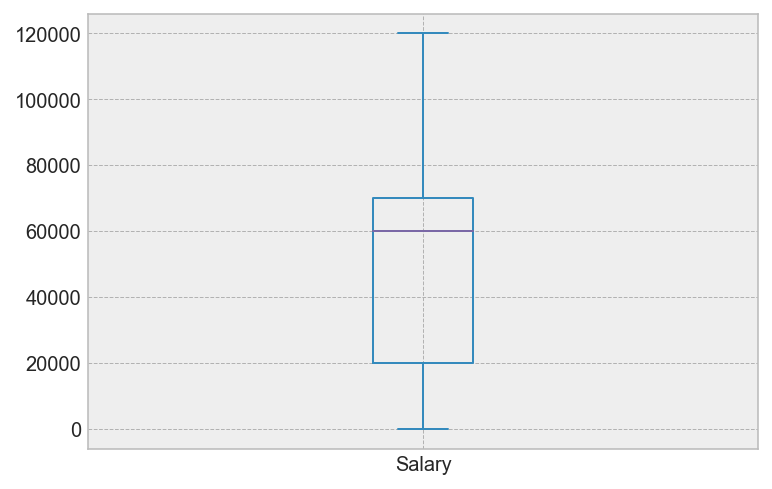

In [6]:
df.Salary.plot(kind='box')

<AxesSubplot:>

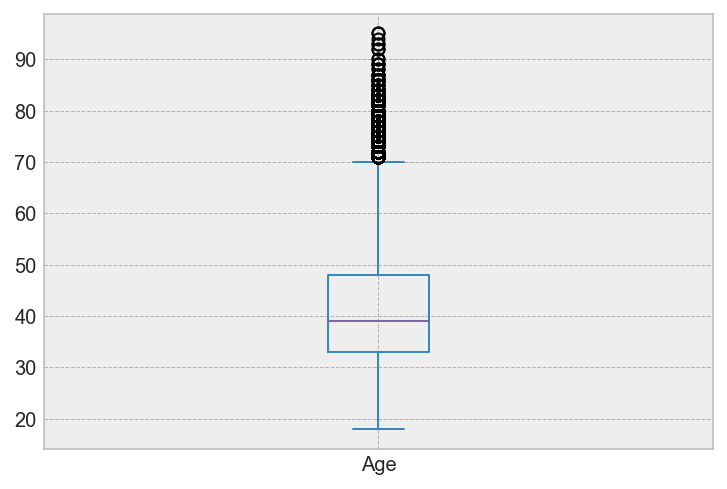

In [7]:
df.Age.plot(kind='box')

<AxesSubplot:>

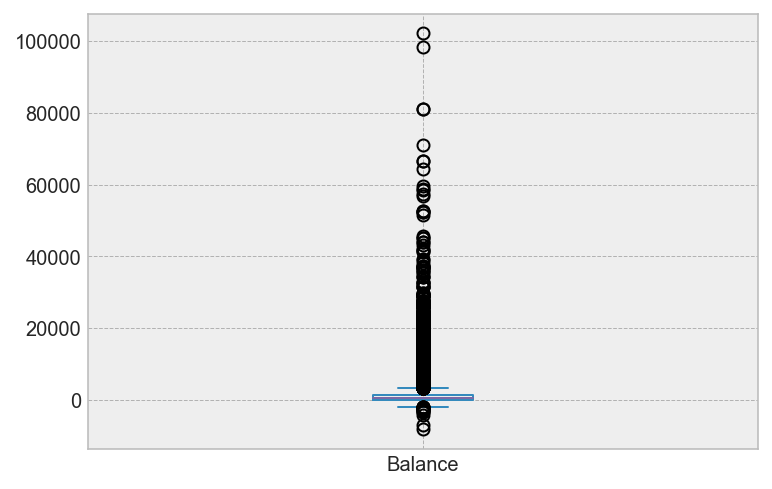

In [8]:
df.Balance.plot(kind='box')

<AxesSubplot:>

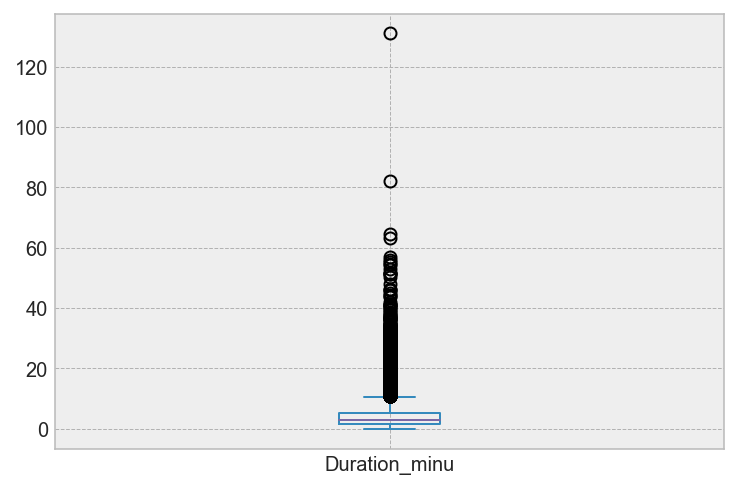

In [10]:
df.Duration_minu.plot(kind='box')

<AxesSubplot:>

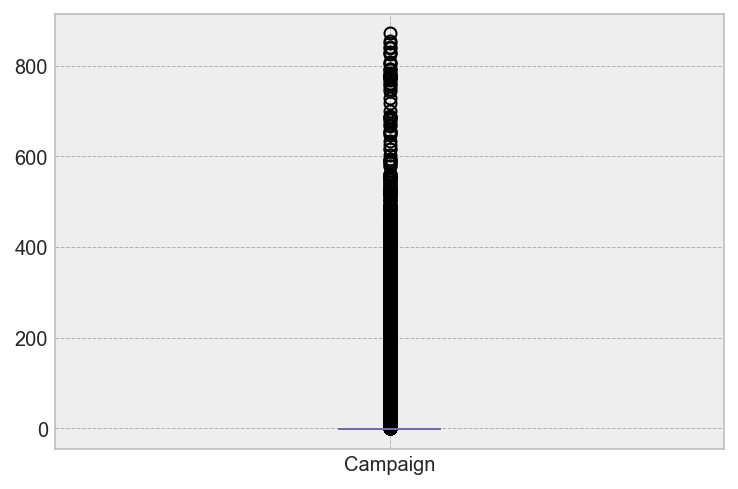

In [11]:
df.Campaign.plot(kind='box')

<AxesSubplot:>

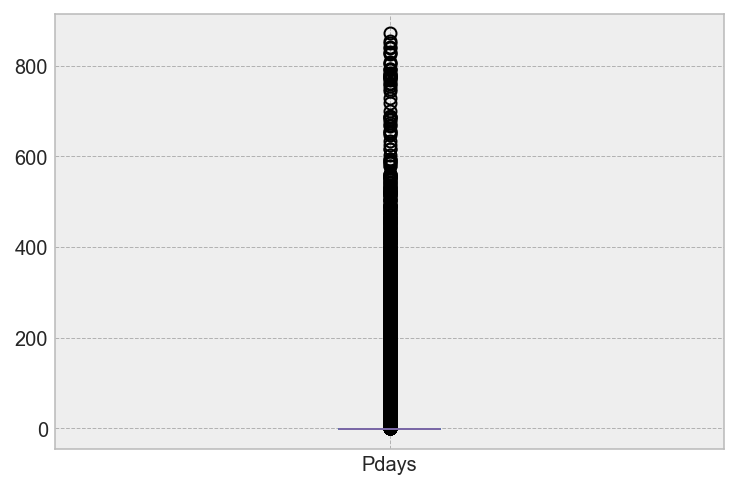

In [12]:
df.Pdays.plot(kind='box')

<AxesSubplot:>

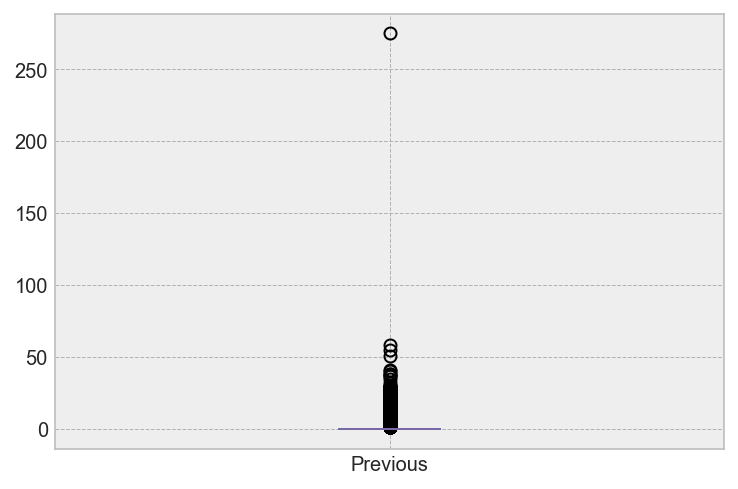

In [13]:
df.Previous.plot(kind='box')

<AxesSubplot:>

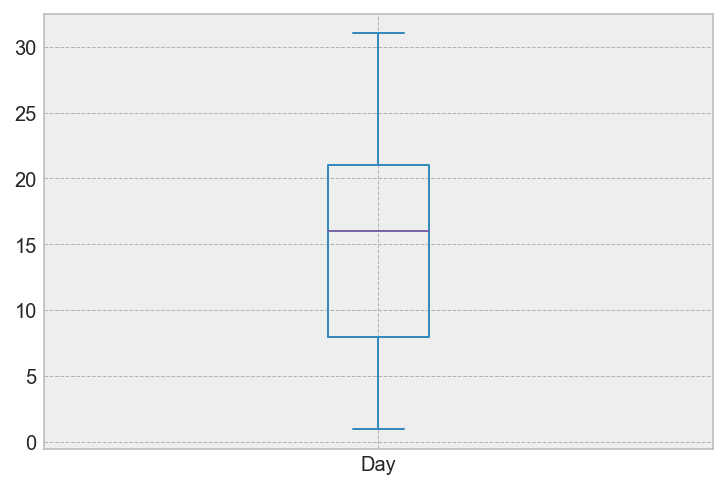

In [14]:
df.Day.plot(kind='box')

# Data Visualization:

## Univariant Analysis:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   banking marketing  45211 non-null  int64  
 1   Age                45211 non-null  float64
 2   Salary             45211 non-null  int64  
 3   Balance            45211 non-null  int64  
 4   Merital status     45211 non-null  object 
 5   Targeted           45211 non-null  object 
 6   Default            45211 non-null  object 
 7   Housing            45211 non-null  object 
 8   Loan               45211 non-null  object 
 9   Contact            45211 non-null  object 
 10  Day                45211 non-null  int64  
 11  Duration_minu      45211 non-null  float64
 12  Campaign           45211 non-null  int64  
 13  Pdays              45211 non-null  int64  
 14  Previous           45211 non-null  int64  
 15  Poutcome           45211 non-null  object 
 16  Response           451

###  (1)Histogram:

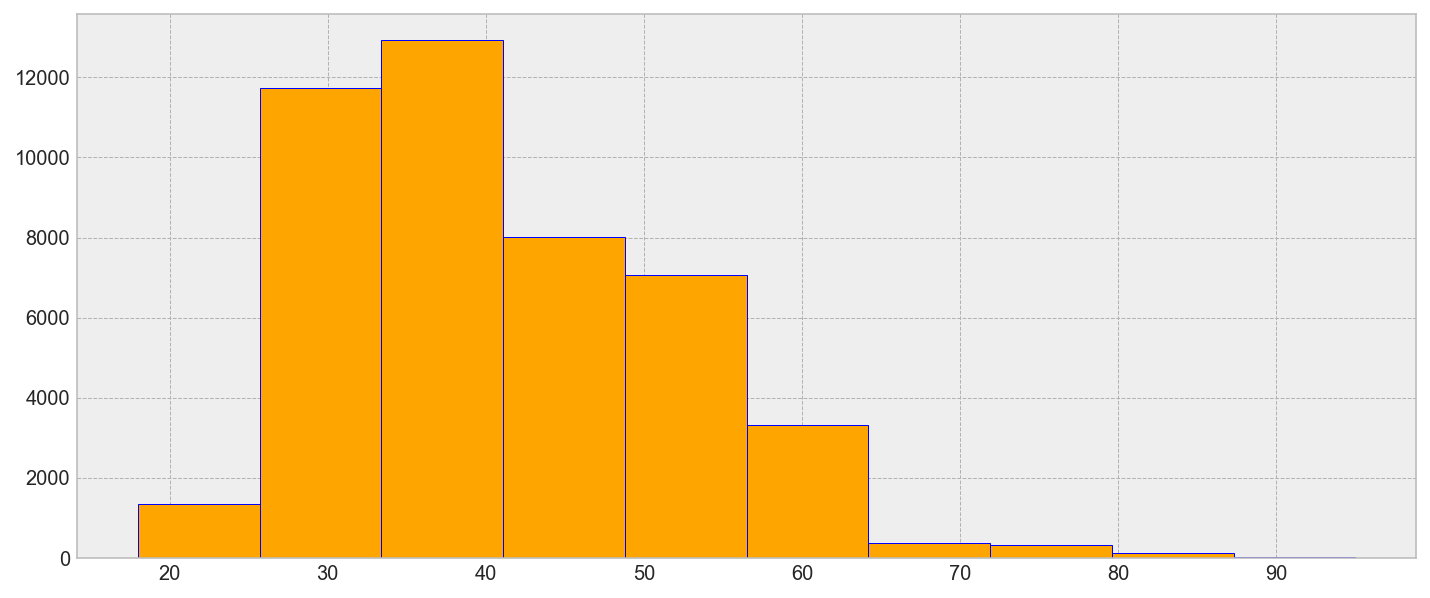

In [17]:
plt.figure(figsize=(12,5))
plt.hist(df.Age,edgecolor = 'b', color= 'orange');

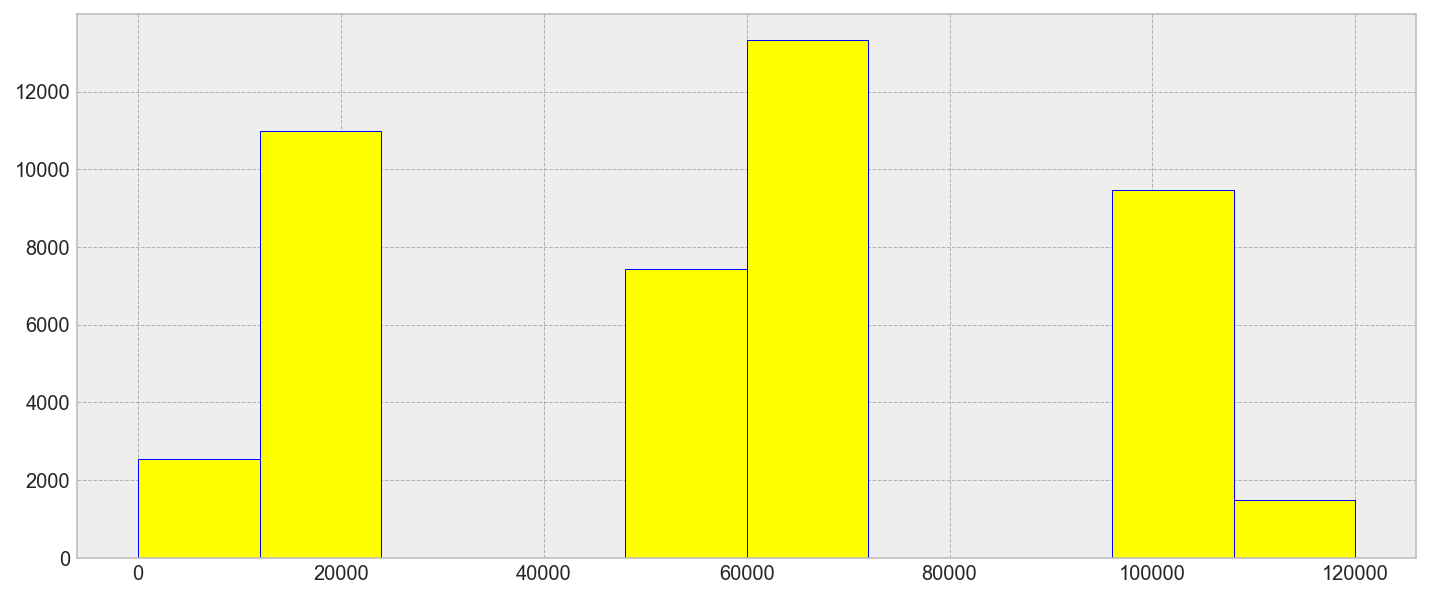

In [18]:
plt.figure(figsize=(12,5))
plt.hist(df.Salary,edgecolor = 'b', color= 'yellow');

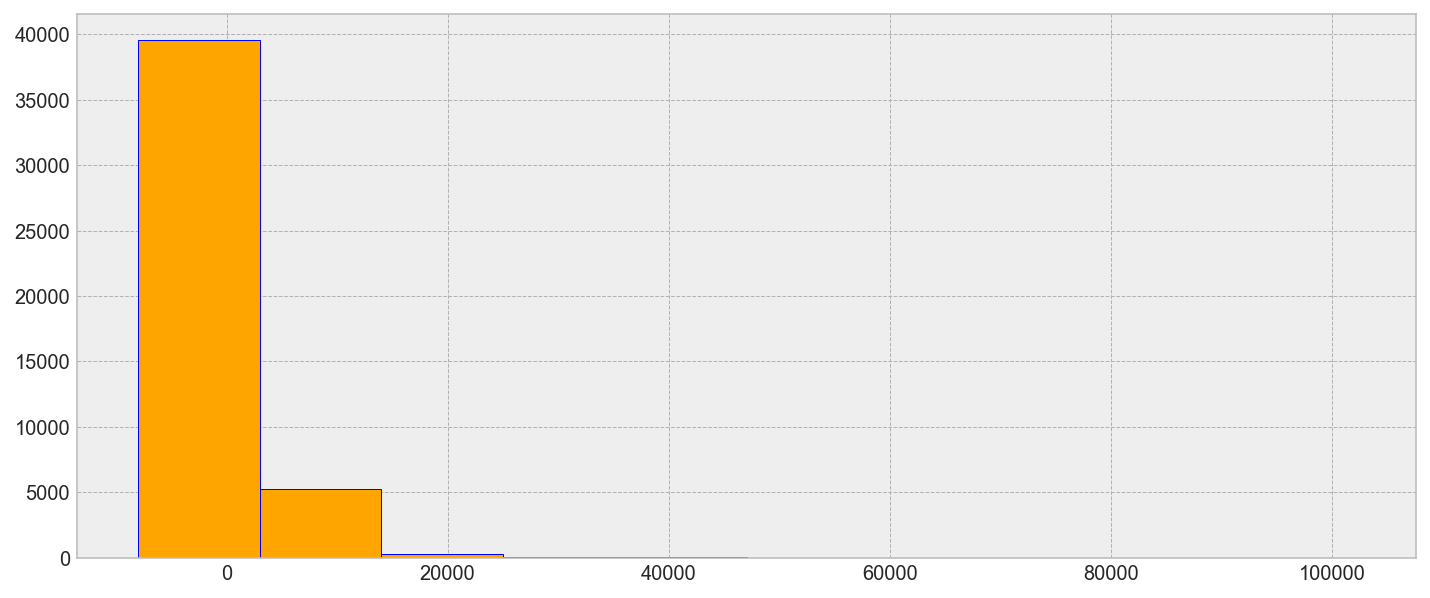

In [19]:
plt.figure(figsize=(12,5))
plt.hist(df.Balance,edgecolor = 'b', color= 'orange');

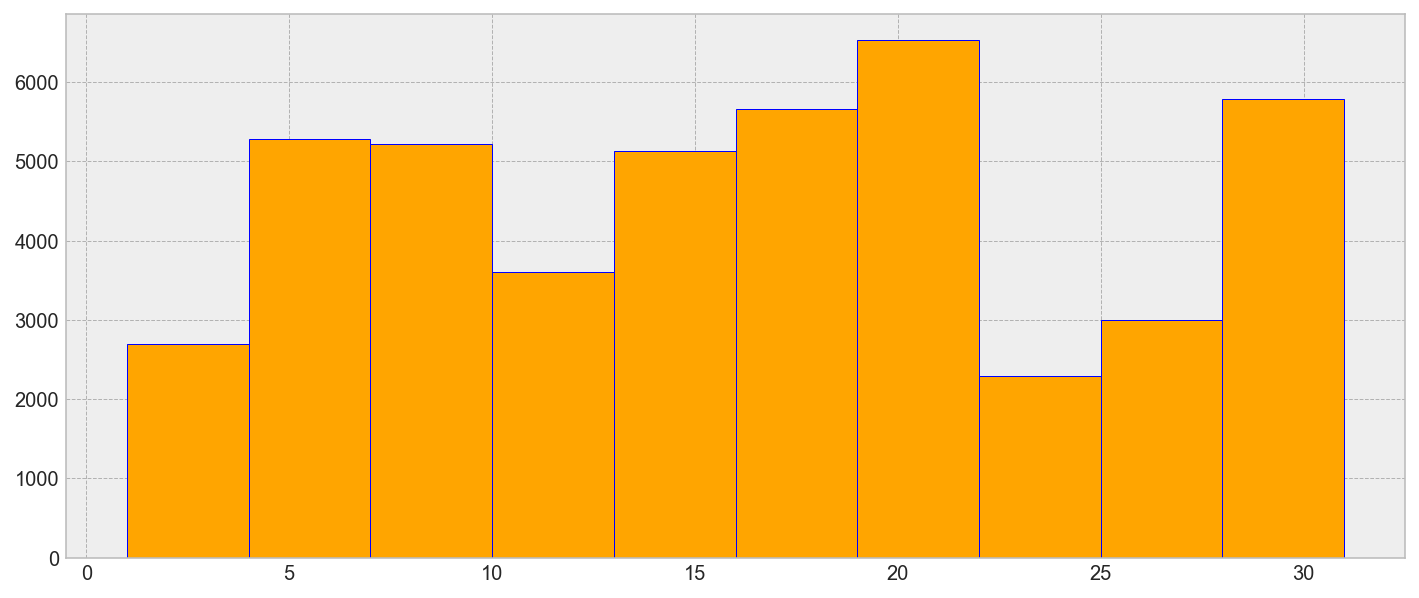

In [20]:
plt.figure(figsize=(12,5))
plt.hist(df.Day,edgecolor = 'b', color= 'orange');

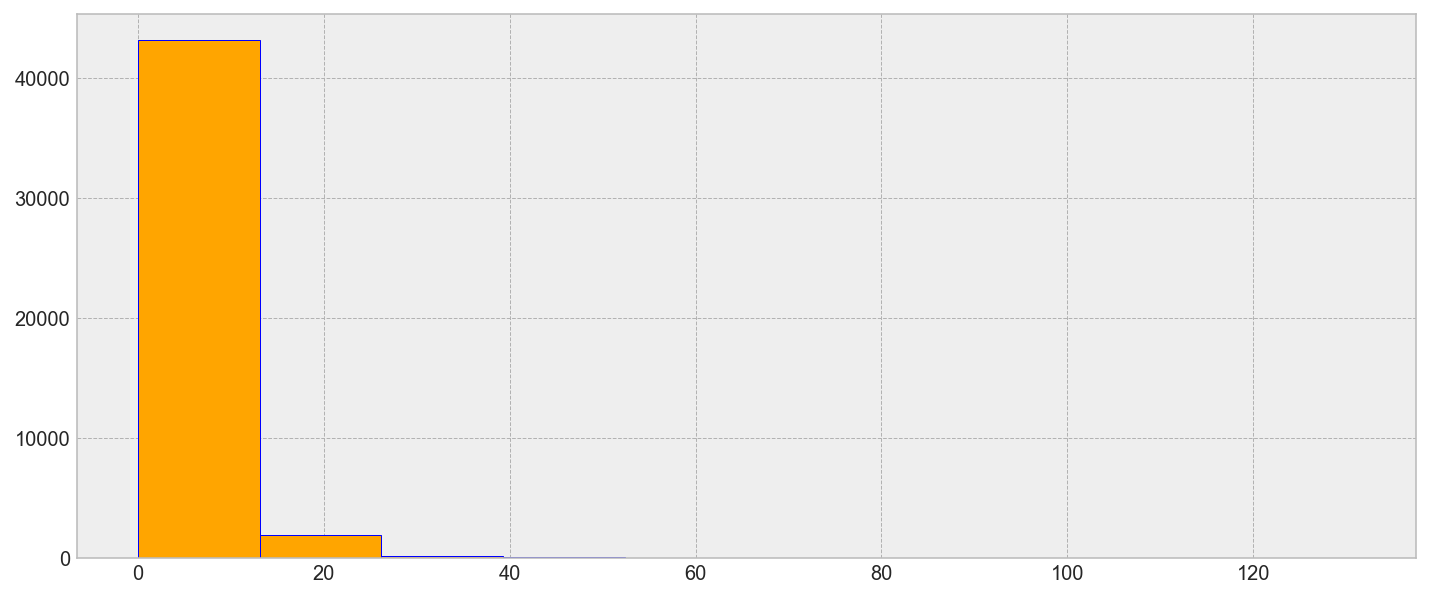

In [21]:
plt.figure(figsize=(12,5))
plt.hist(df.Duration_minu,edgecolor = 'b', color= 'orange');

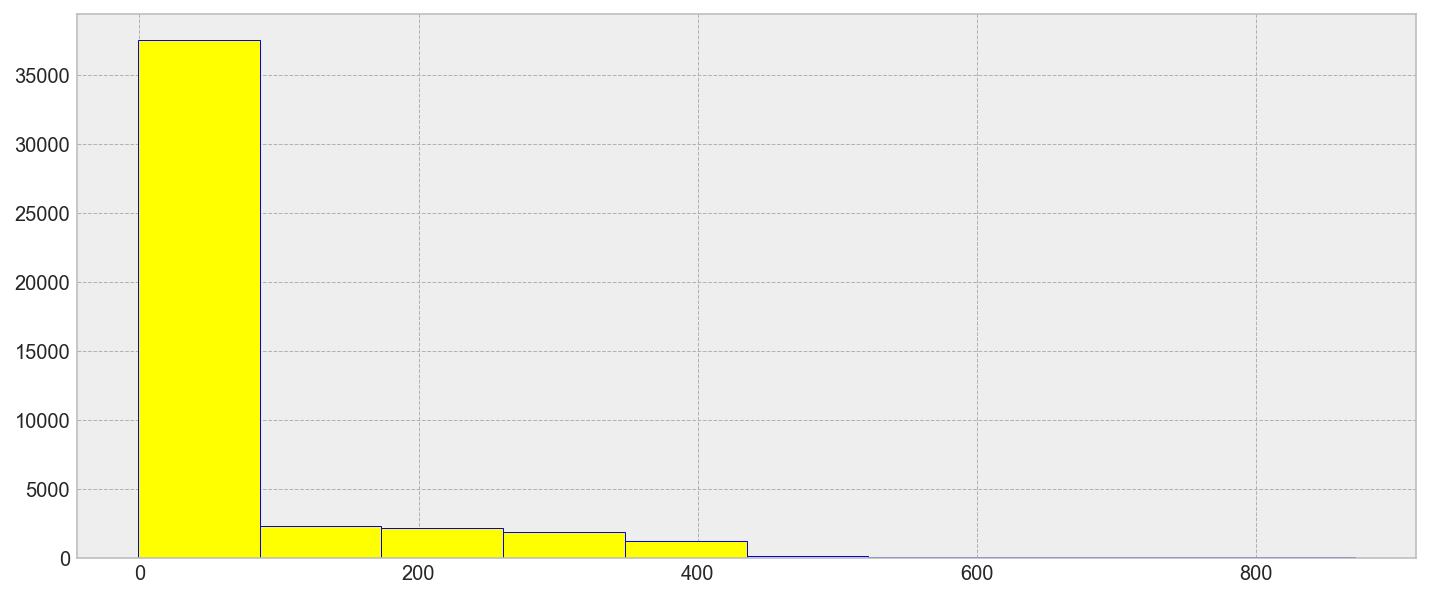

In [22]:
plt.figure(figsize=(12,5))
plt.hist(df.Campaign,edgecolor = 'b', color= 'yellow');

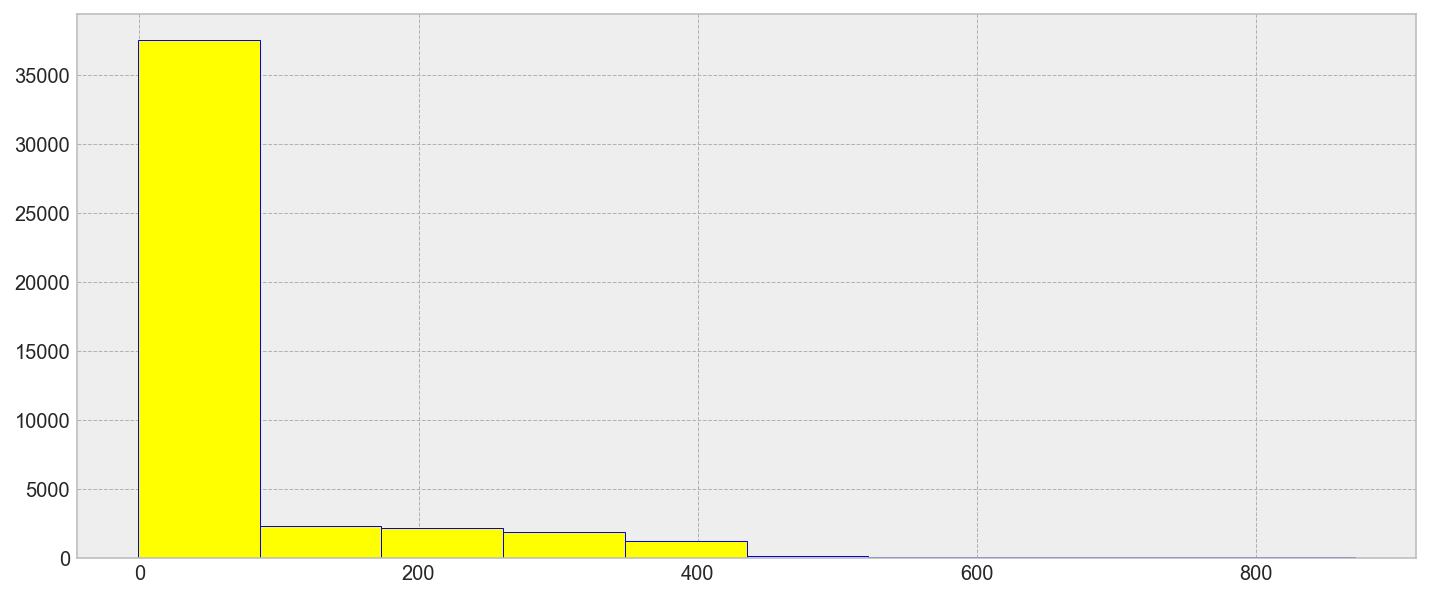

In [23]:
plt.figure(figsize=(12,5))
plt.hist(df.Pdays,edgecolor = 'b', color= 'yellow');

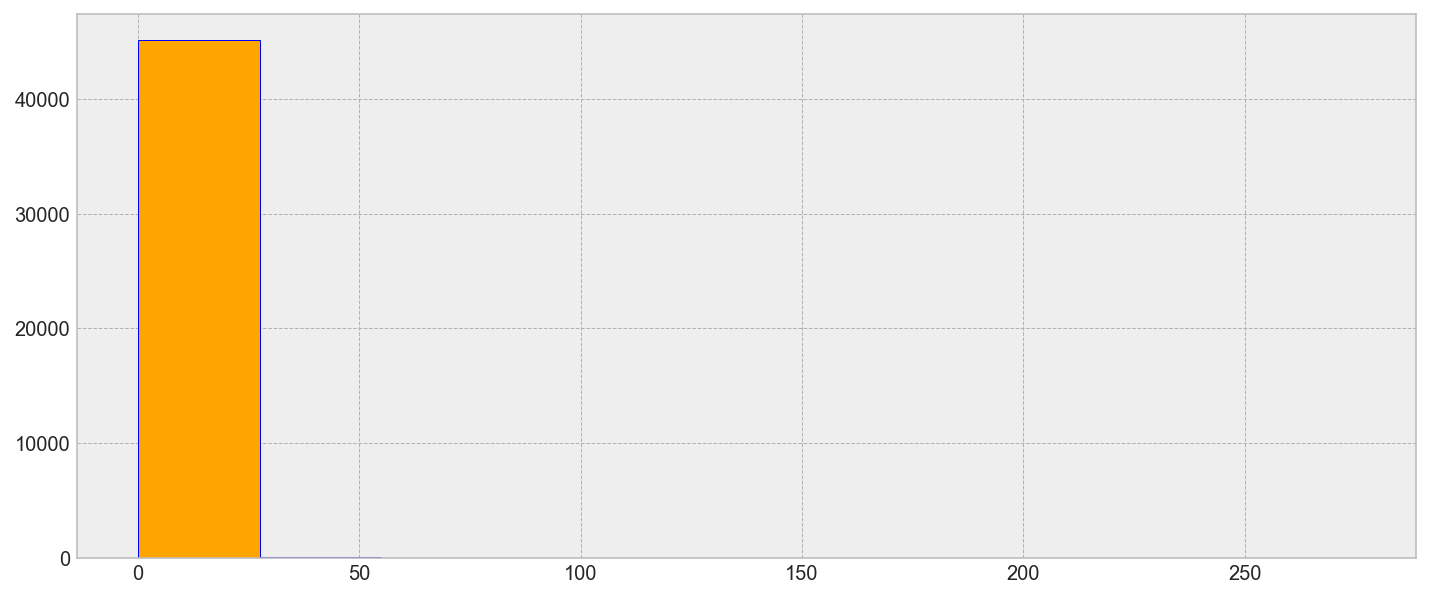

In [24]:
plt.figure(figsize=(12,5))
plt.hist(df.Previous,edgecolor = 'b', color= 'orange');

### (2) Box Plot:

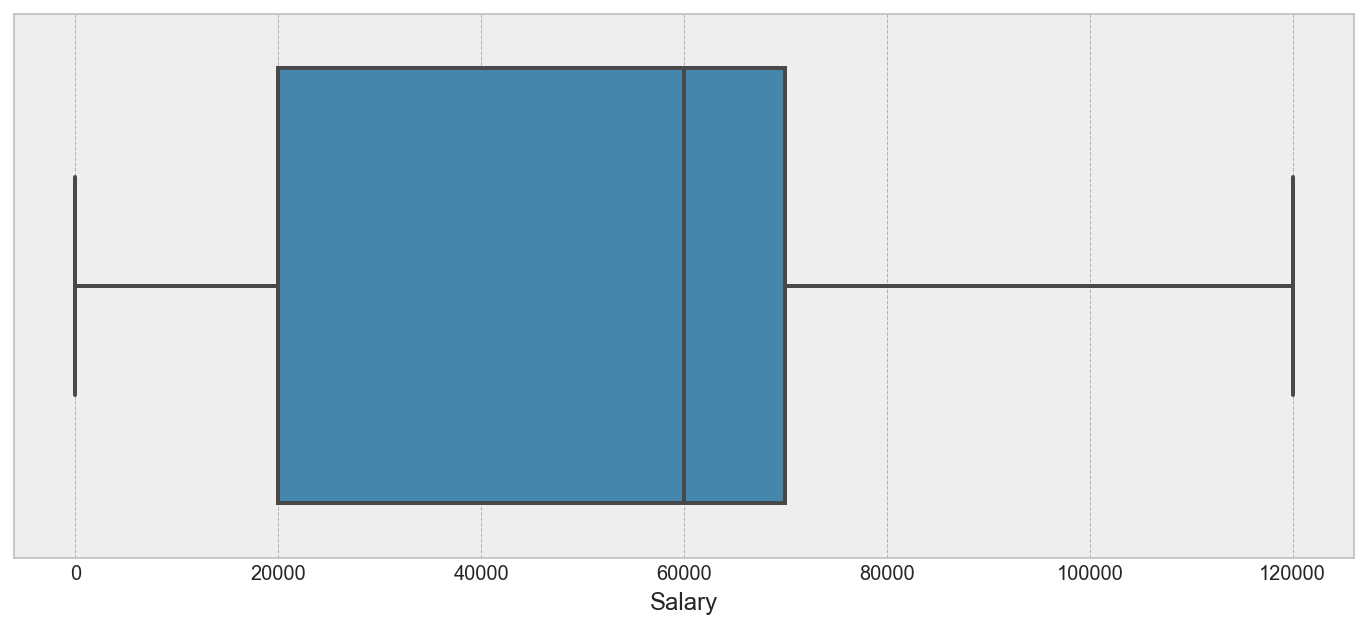

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Salary');

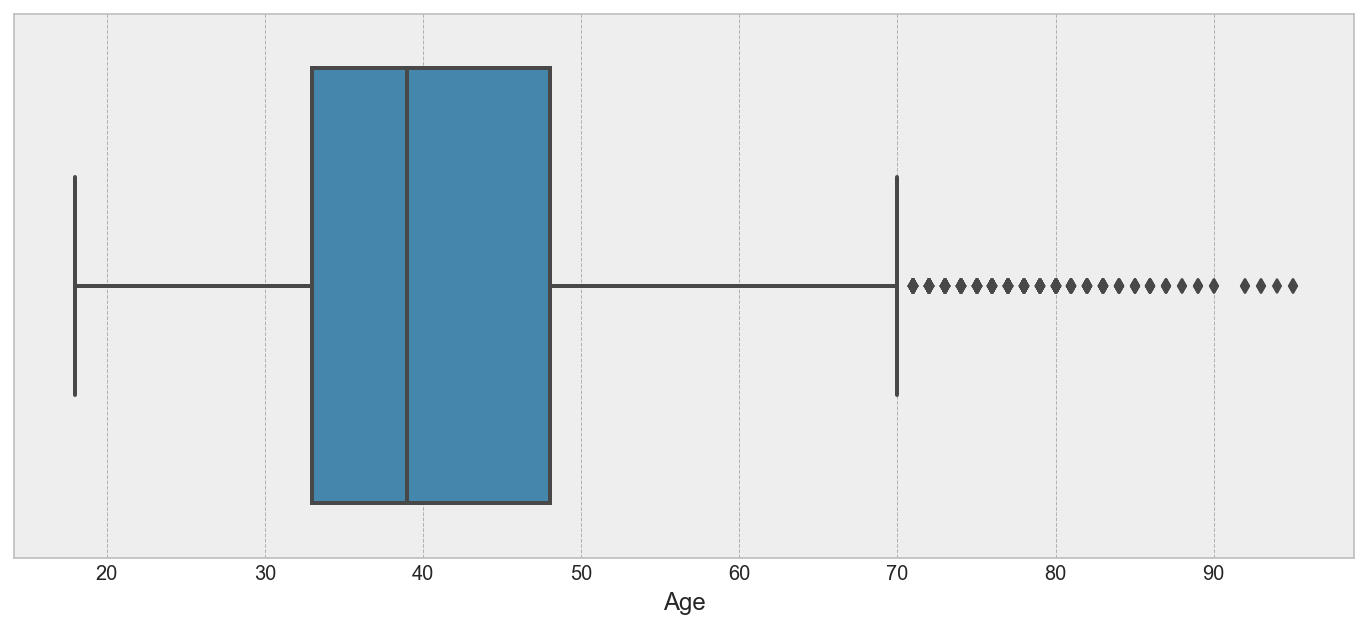

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Age');

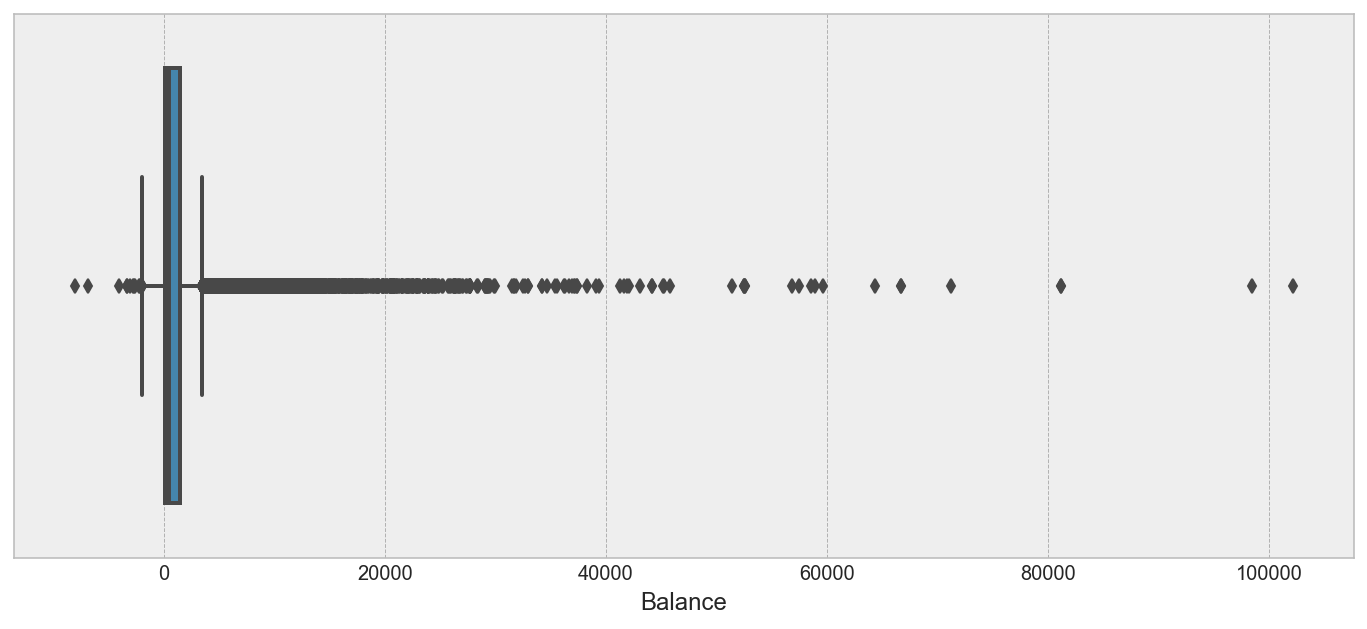

In [27]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Balance');

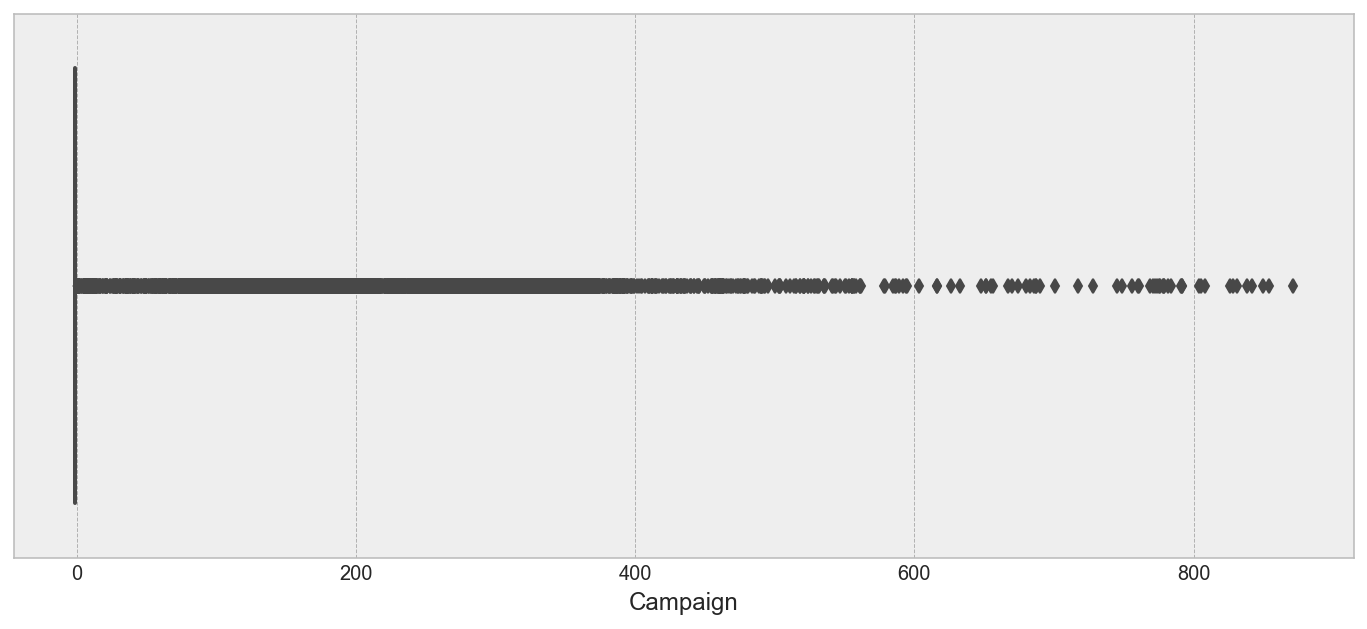

In [28]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Campaign');

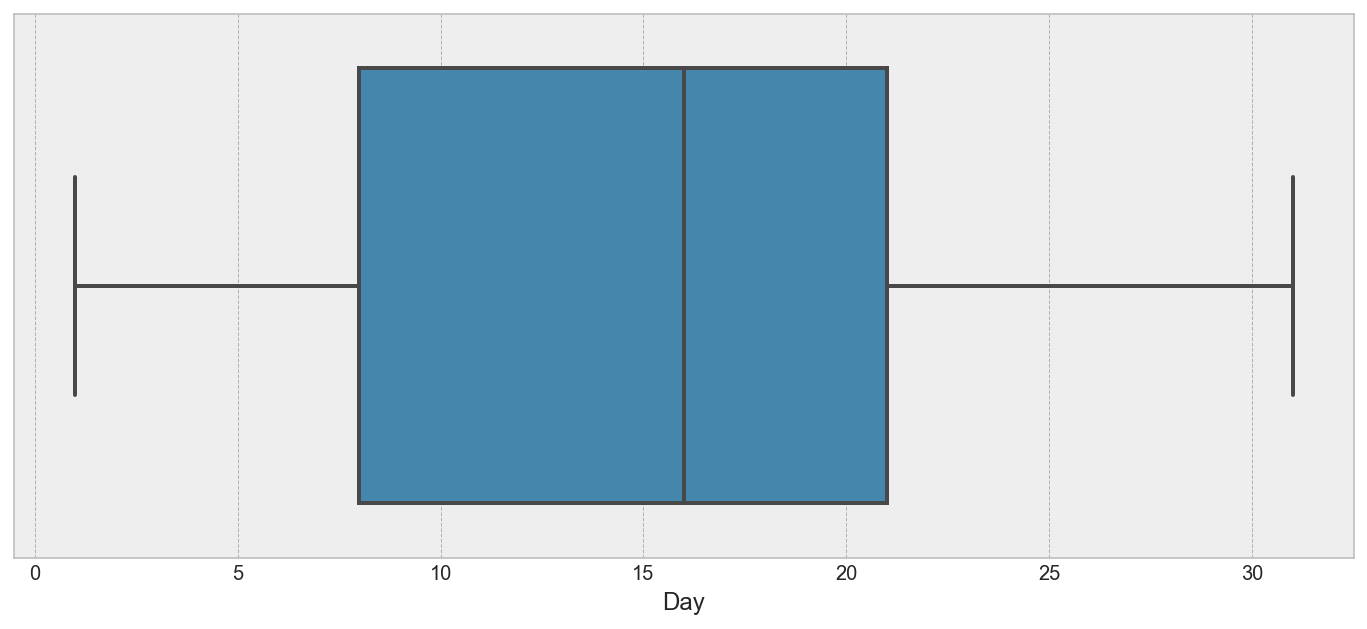

In [29]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Day');

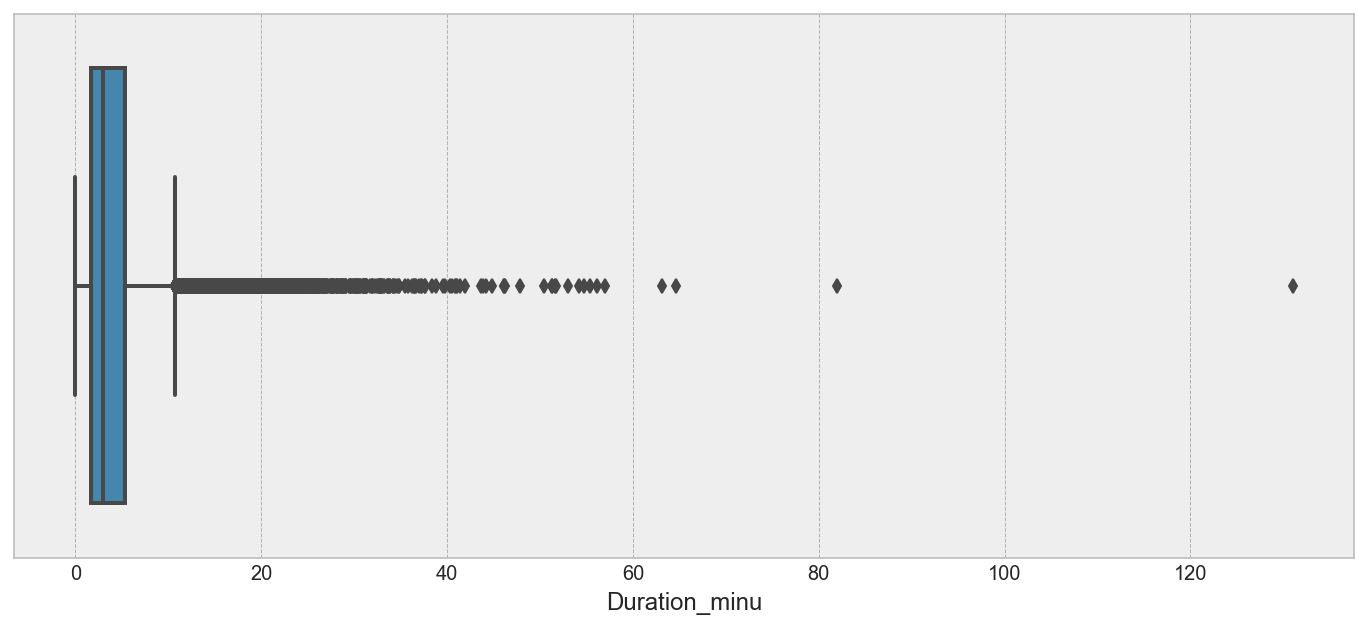

In [30]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Duration_minu');

### (3) Cont Plot:

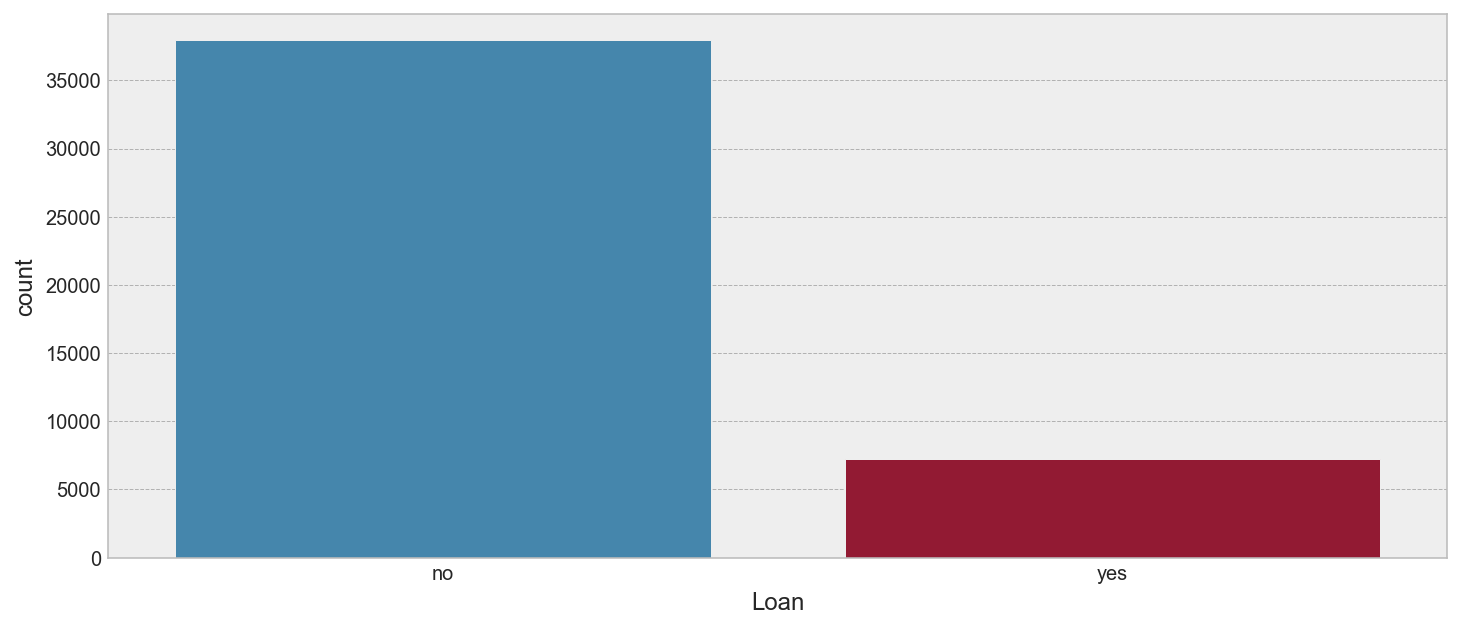

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Loan');

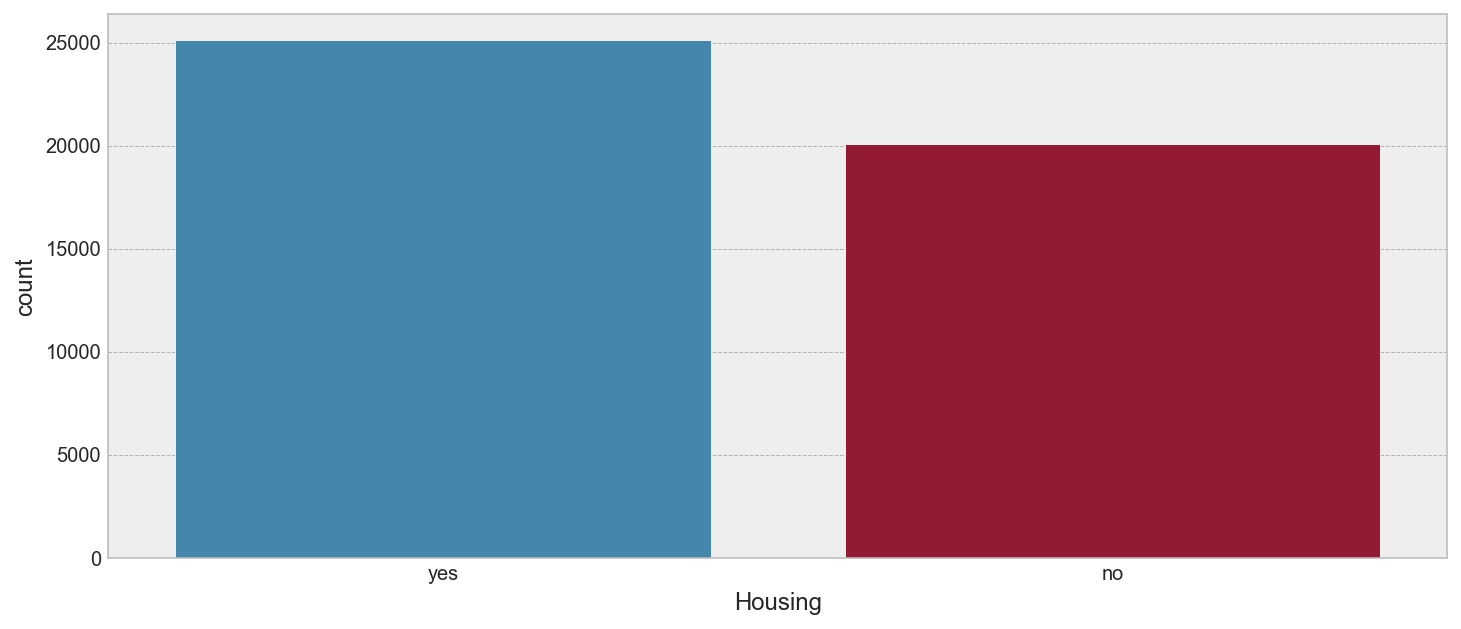

In [45]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Housing');

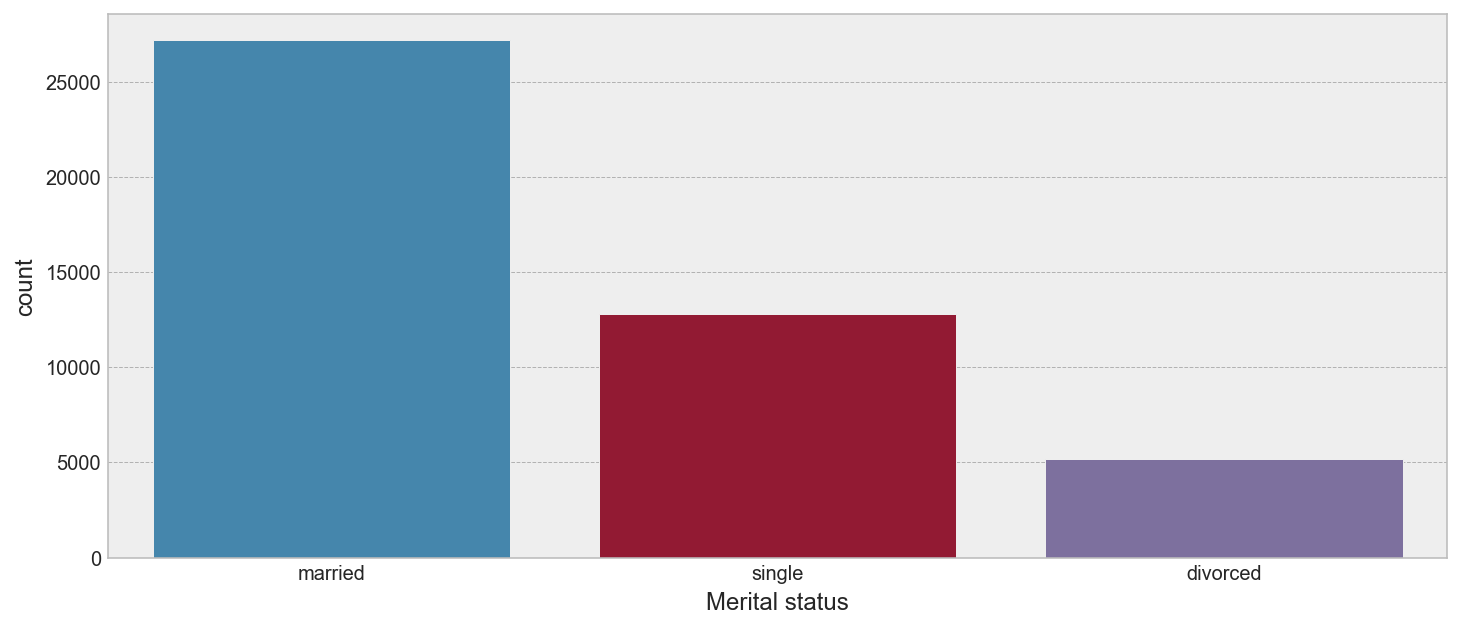

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Merital status');

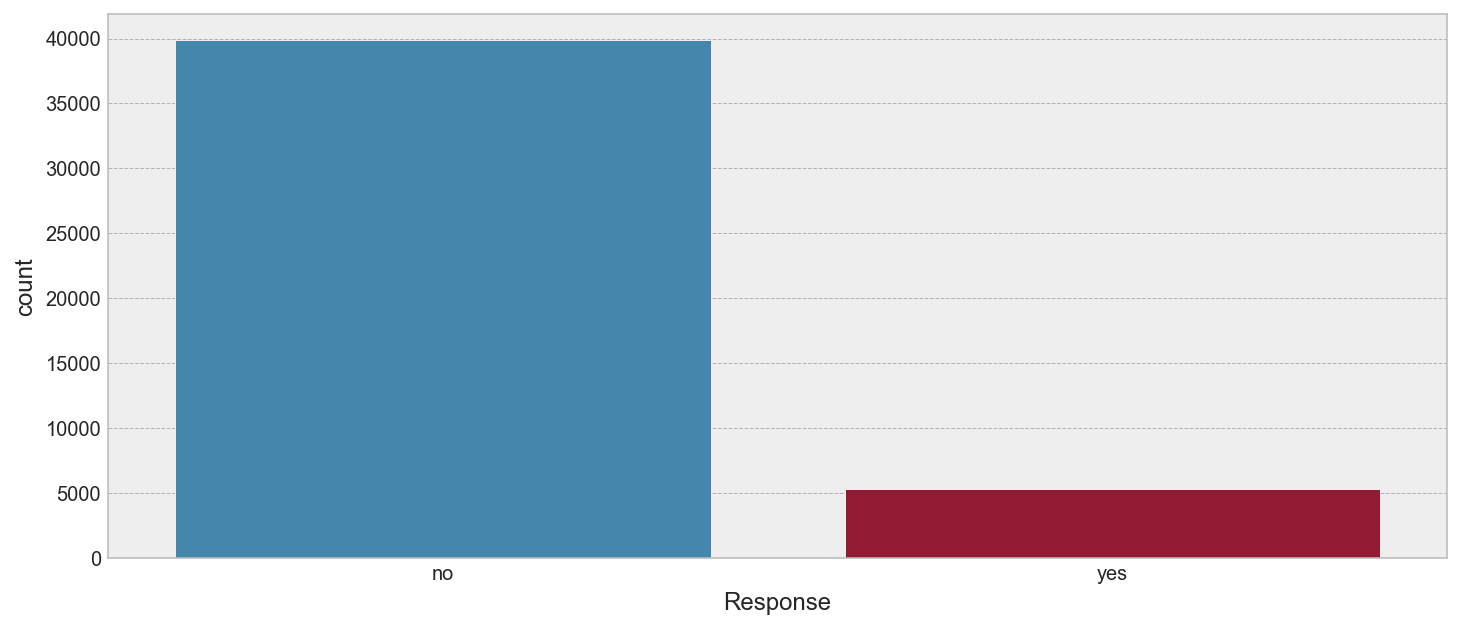

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Response');

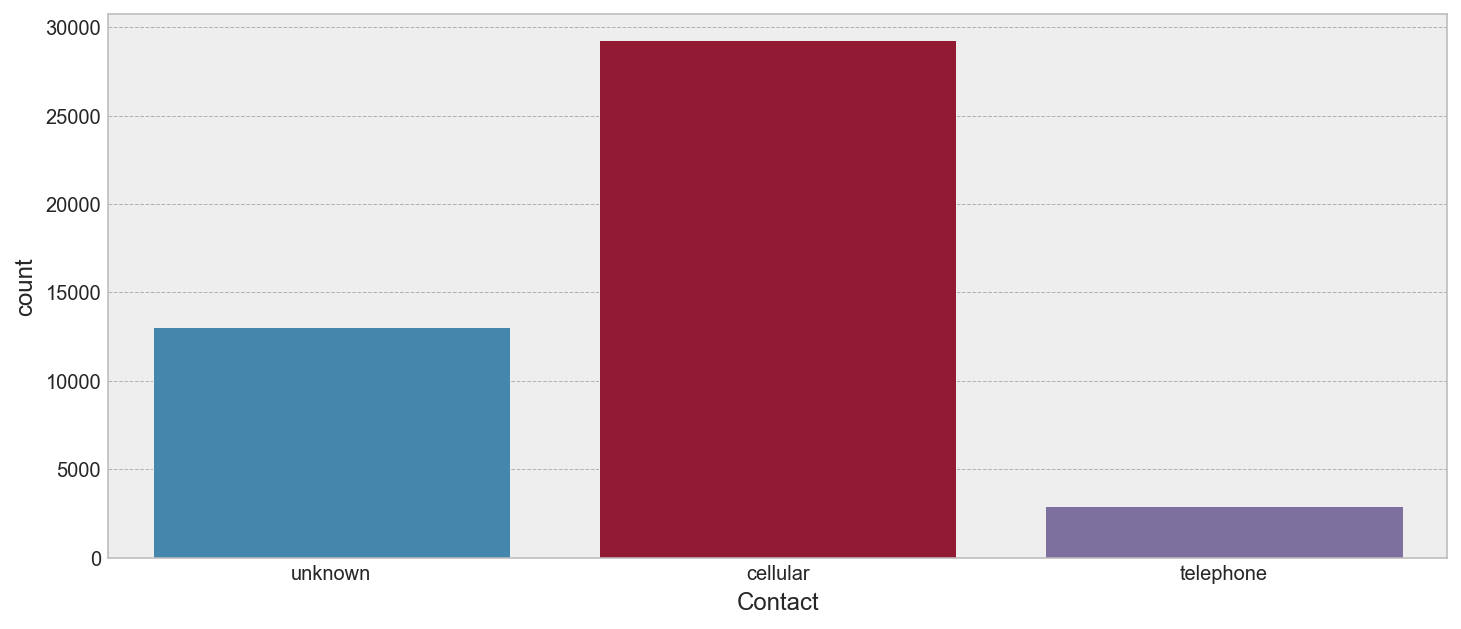

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Contact');

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='Targeted', ylabel='count'>

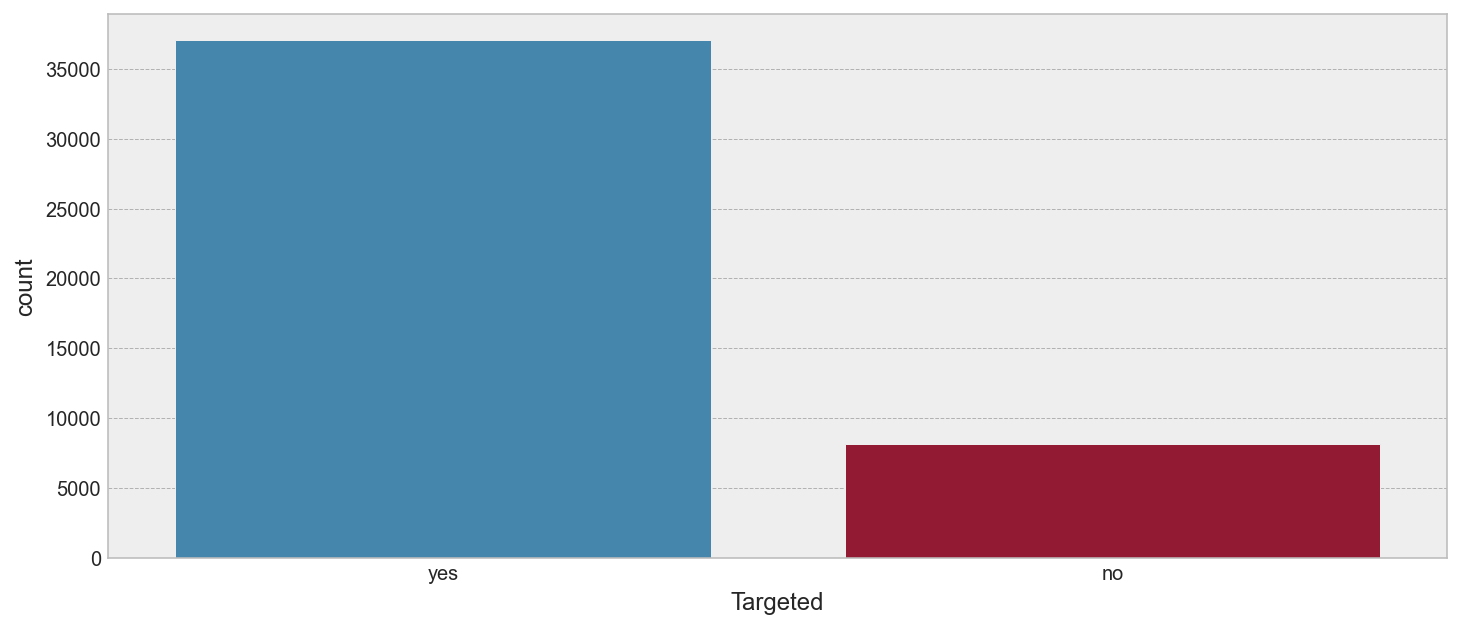

In [49]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Targeted')

<Figure size 864x360 with 0 Axes>

<AxesSubplot:xlabel='Default', ylabel='count'>

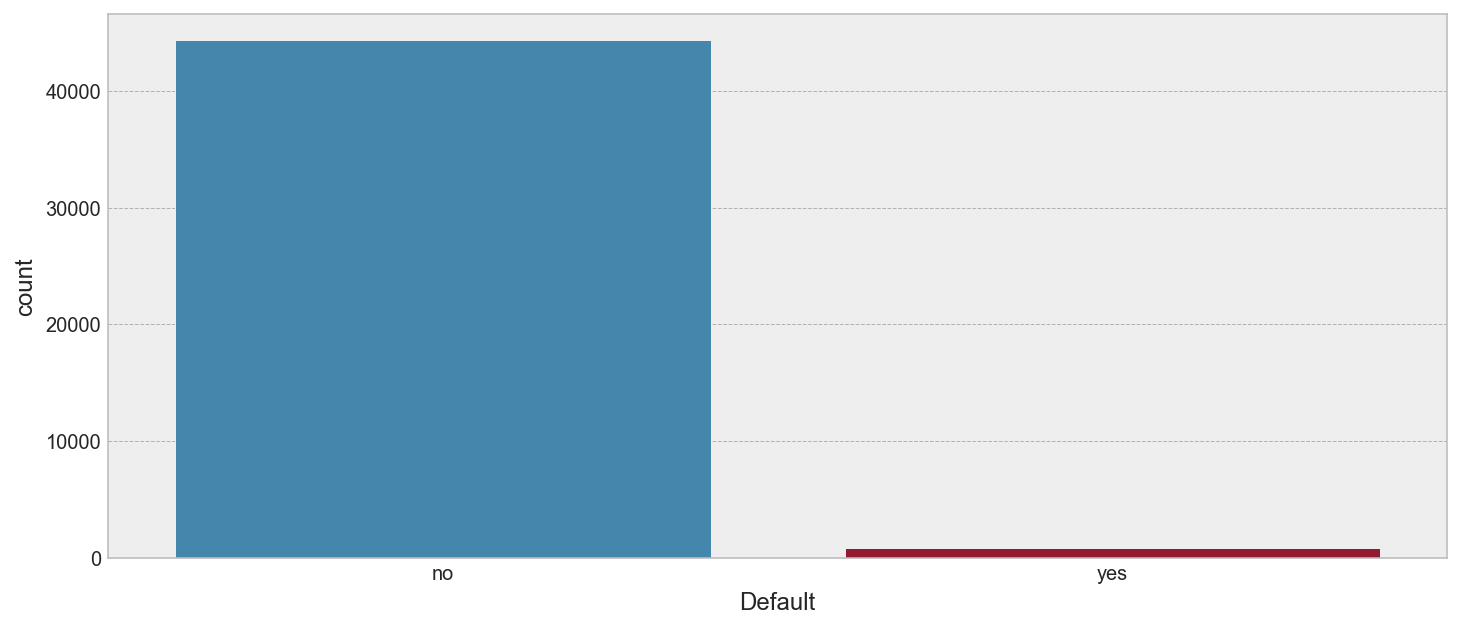

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Default')

<Figure size 792x360 with 0 Axes>

<AxesSubplot:xlabel='Poutcome', ylabel='count'>

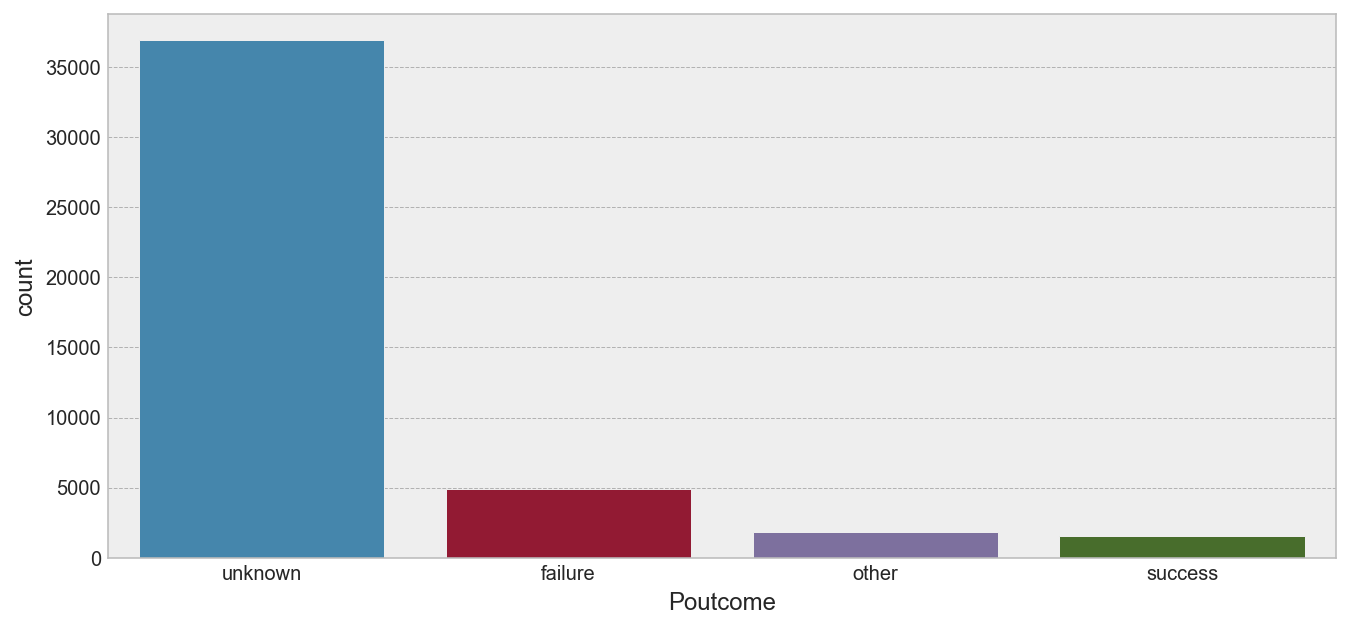

In [51]:
plt.figure(figsize=(11,5))
sns.countplot(data=df,x='Poutcome')

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='Job', ylabel='count'>

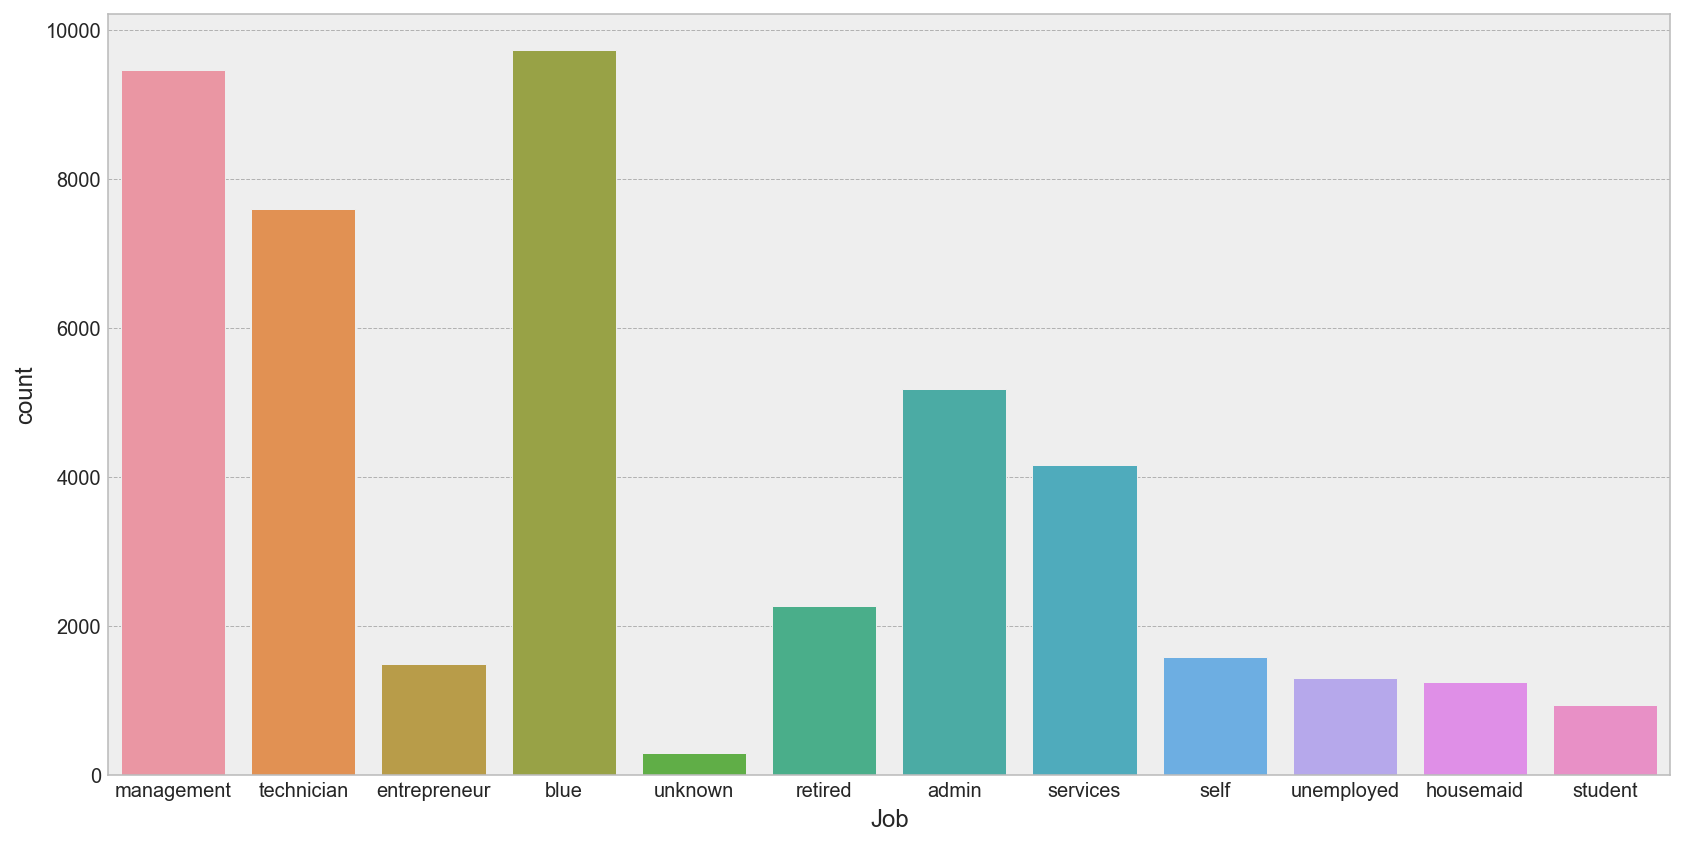

In [52]:
plt.figure(figsize=(14,7))
sns.countplot(data=df,x='Job')

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='Education', ylabel='count'>

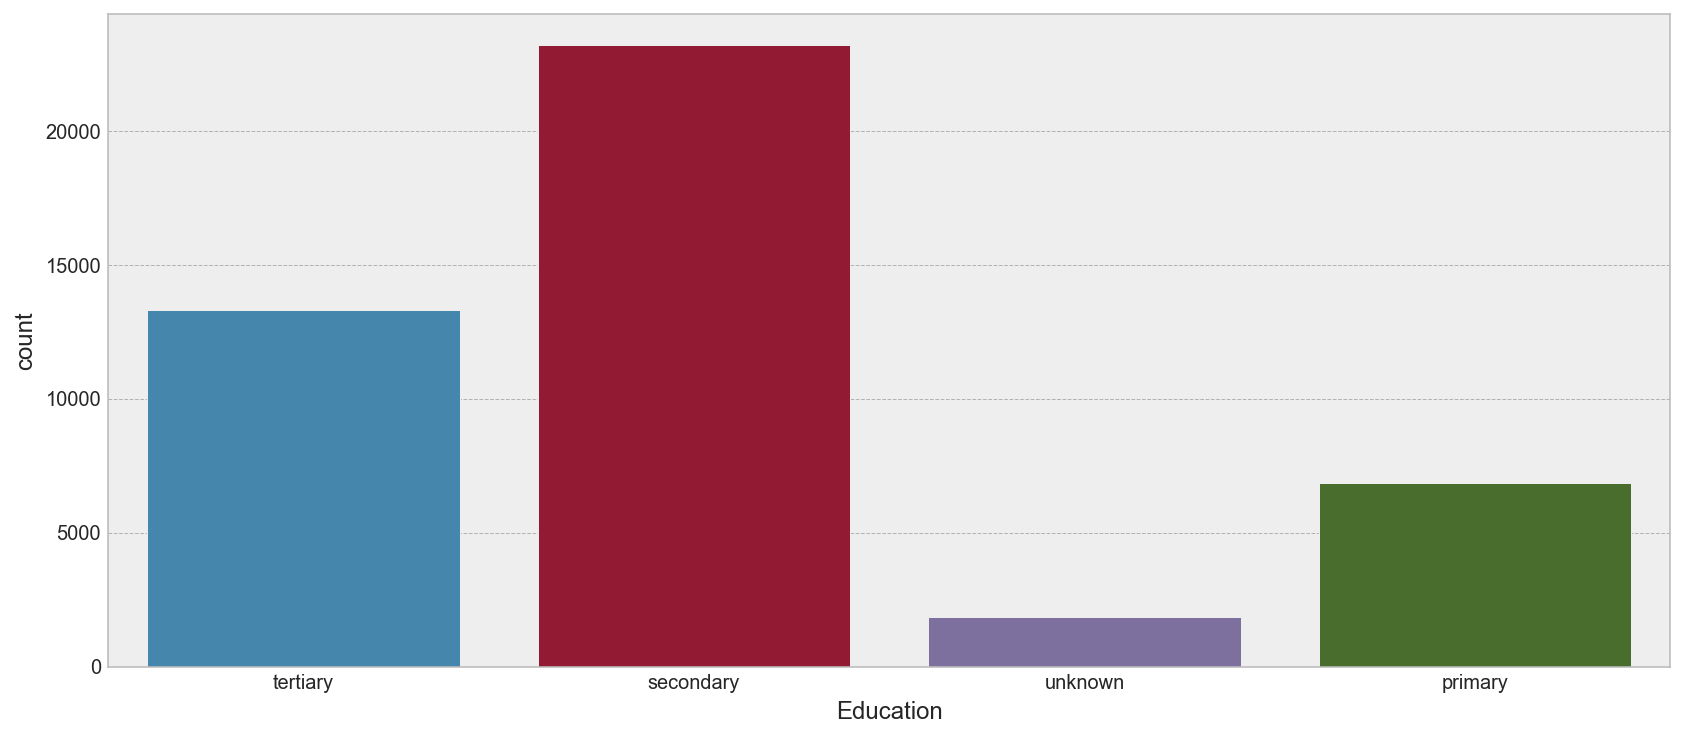

In [53]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='Education')

<Figure size 1008x432 with 0 Axes>

<AxesSubplot:xlabel='Months', ylabel='count'>

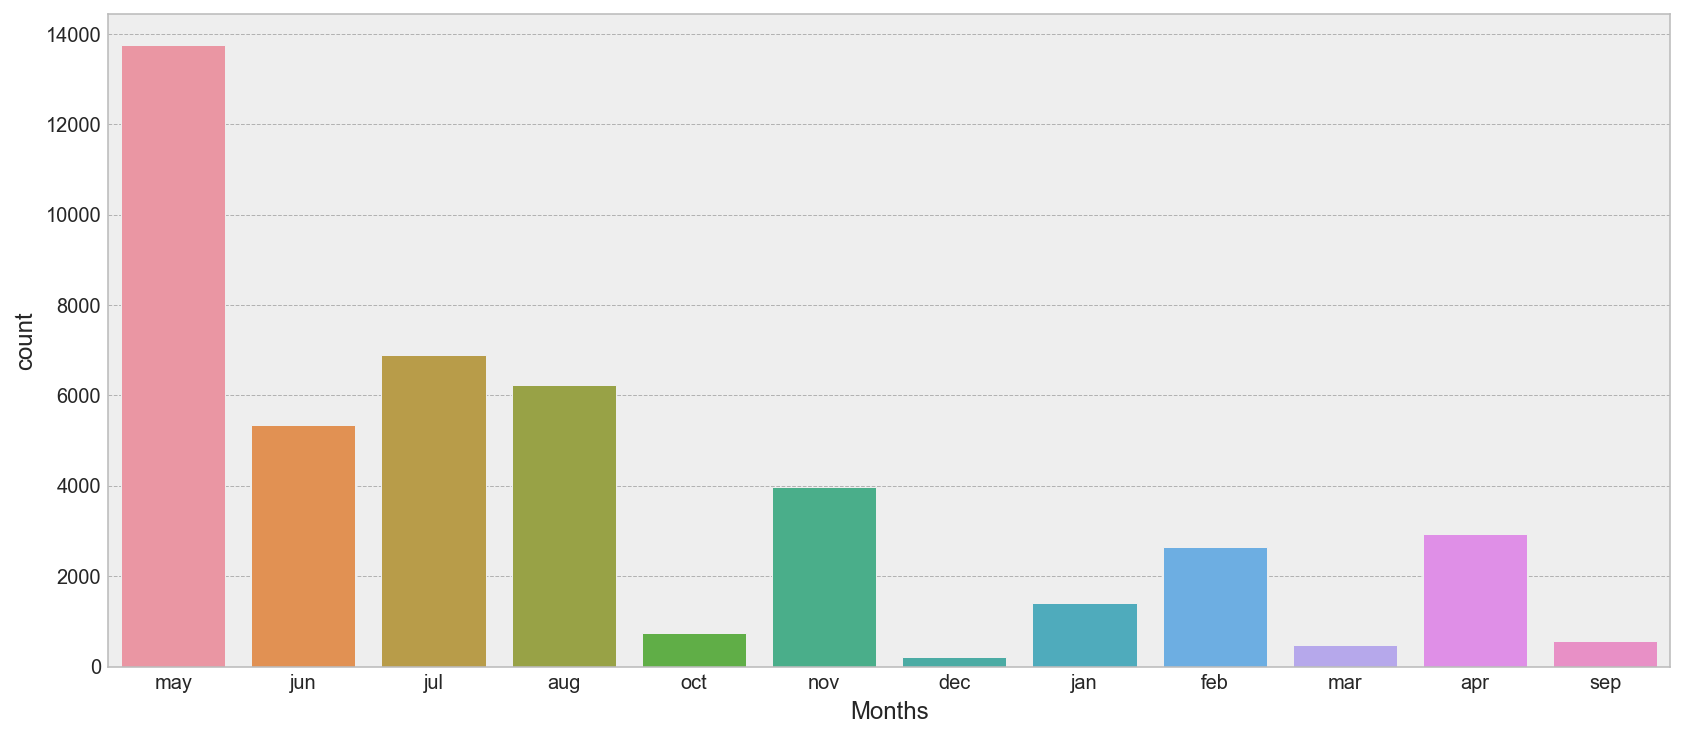

In [54]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='Months')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   banking marketing  45211 non-null  int64  
 1   Age                45211 non-null  float64
 2   Salary             45211 non-null  int64  
 3   Balance            45211 non-null  int64  
 4   Merital status     45211 non-null  object 
 5   Targeted           45211 non-null  object 
 6   Default            45211 non-null  object 
 7   Housing            45211 non-null  object 
 8   Loan               45211 non-null  object 
 9   Contact            45211 non-null  object 
 10  Day                45211 non-null  int64  
 11  Duration_minu      45211 non-null  float64
 12  Campaign           45211 non-null  int64  
 13  Pdays              45211 non-null  int64  
 14  Previous           45211 non-null  int64  
 15  Poutcome           45211 non-null  object 
 16  Response           451

### (4) Scatter Plot:

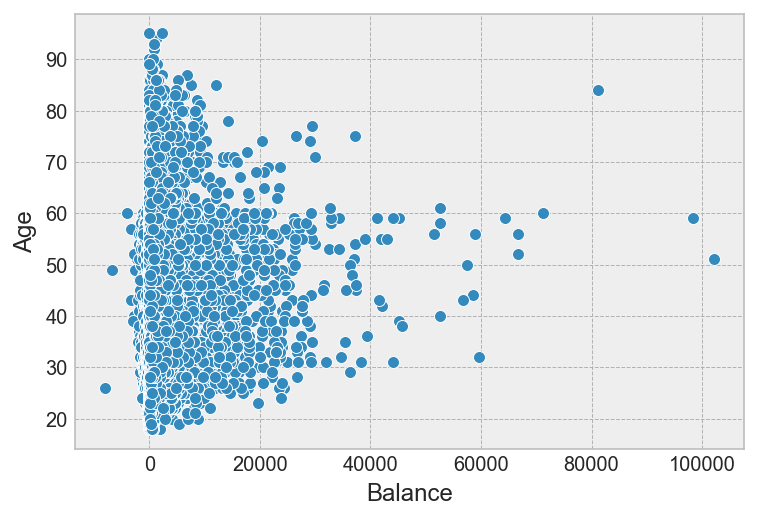

In [56]:
sns.scatterplot(data =df, x = 'Balance', y= 'Age');

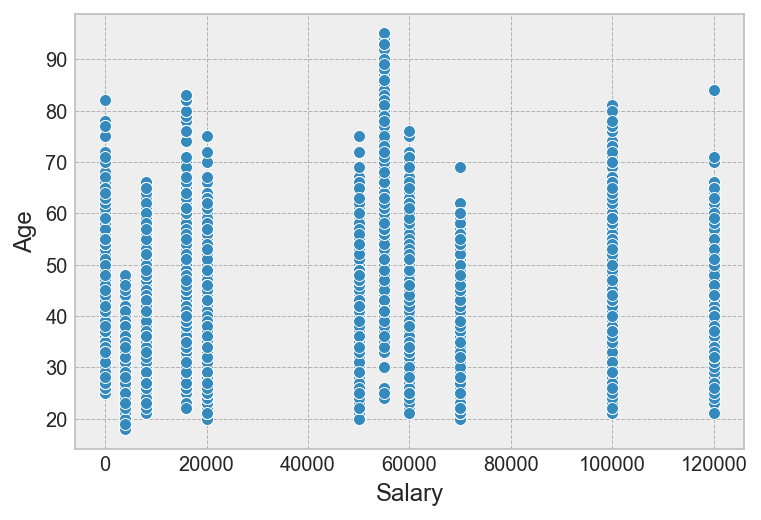

In [57]:
sns.scatterplot(data =df, x = 'Salary', y= 'Age');

### (5) Pair Plot:

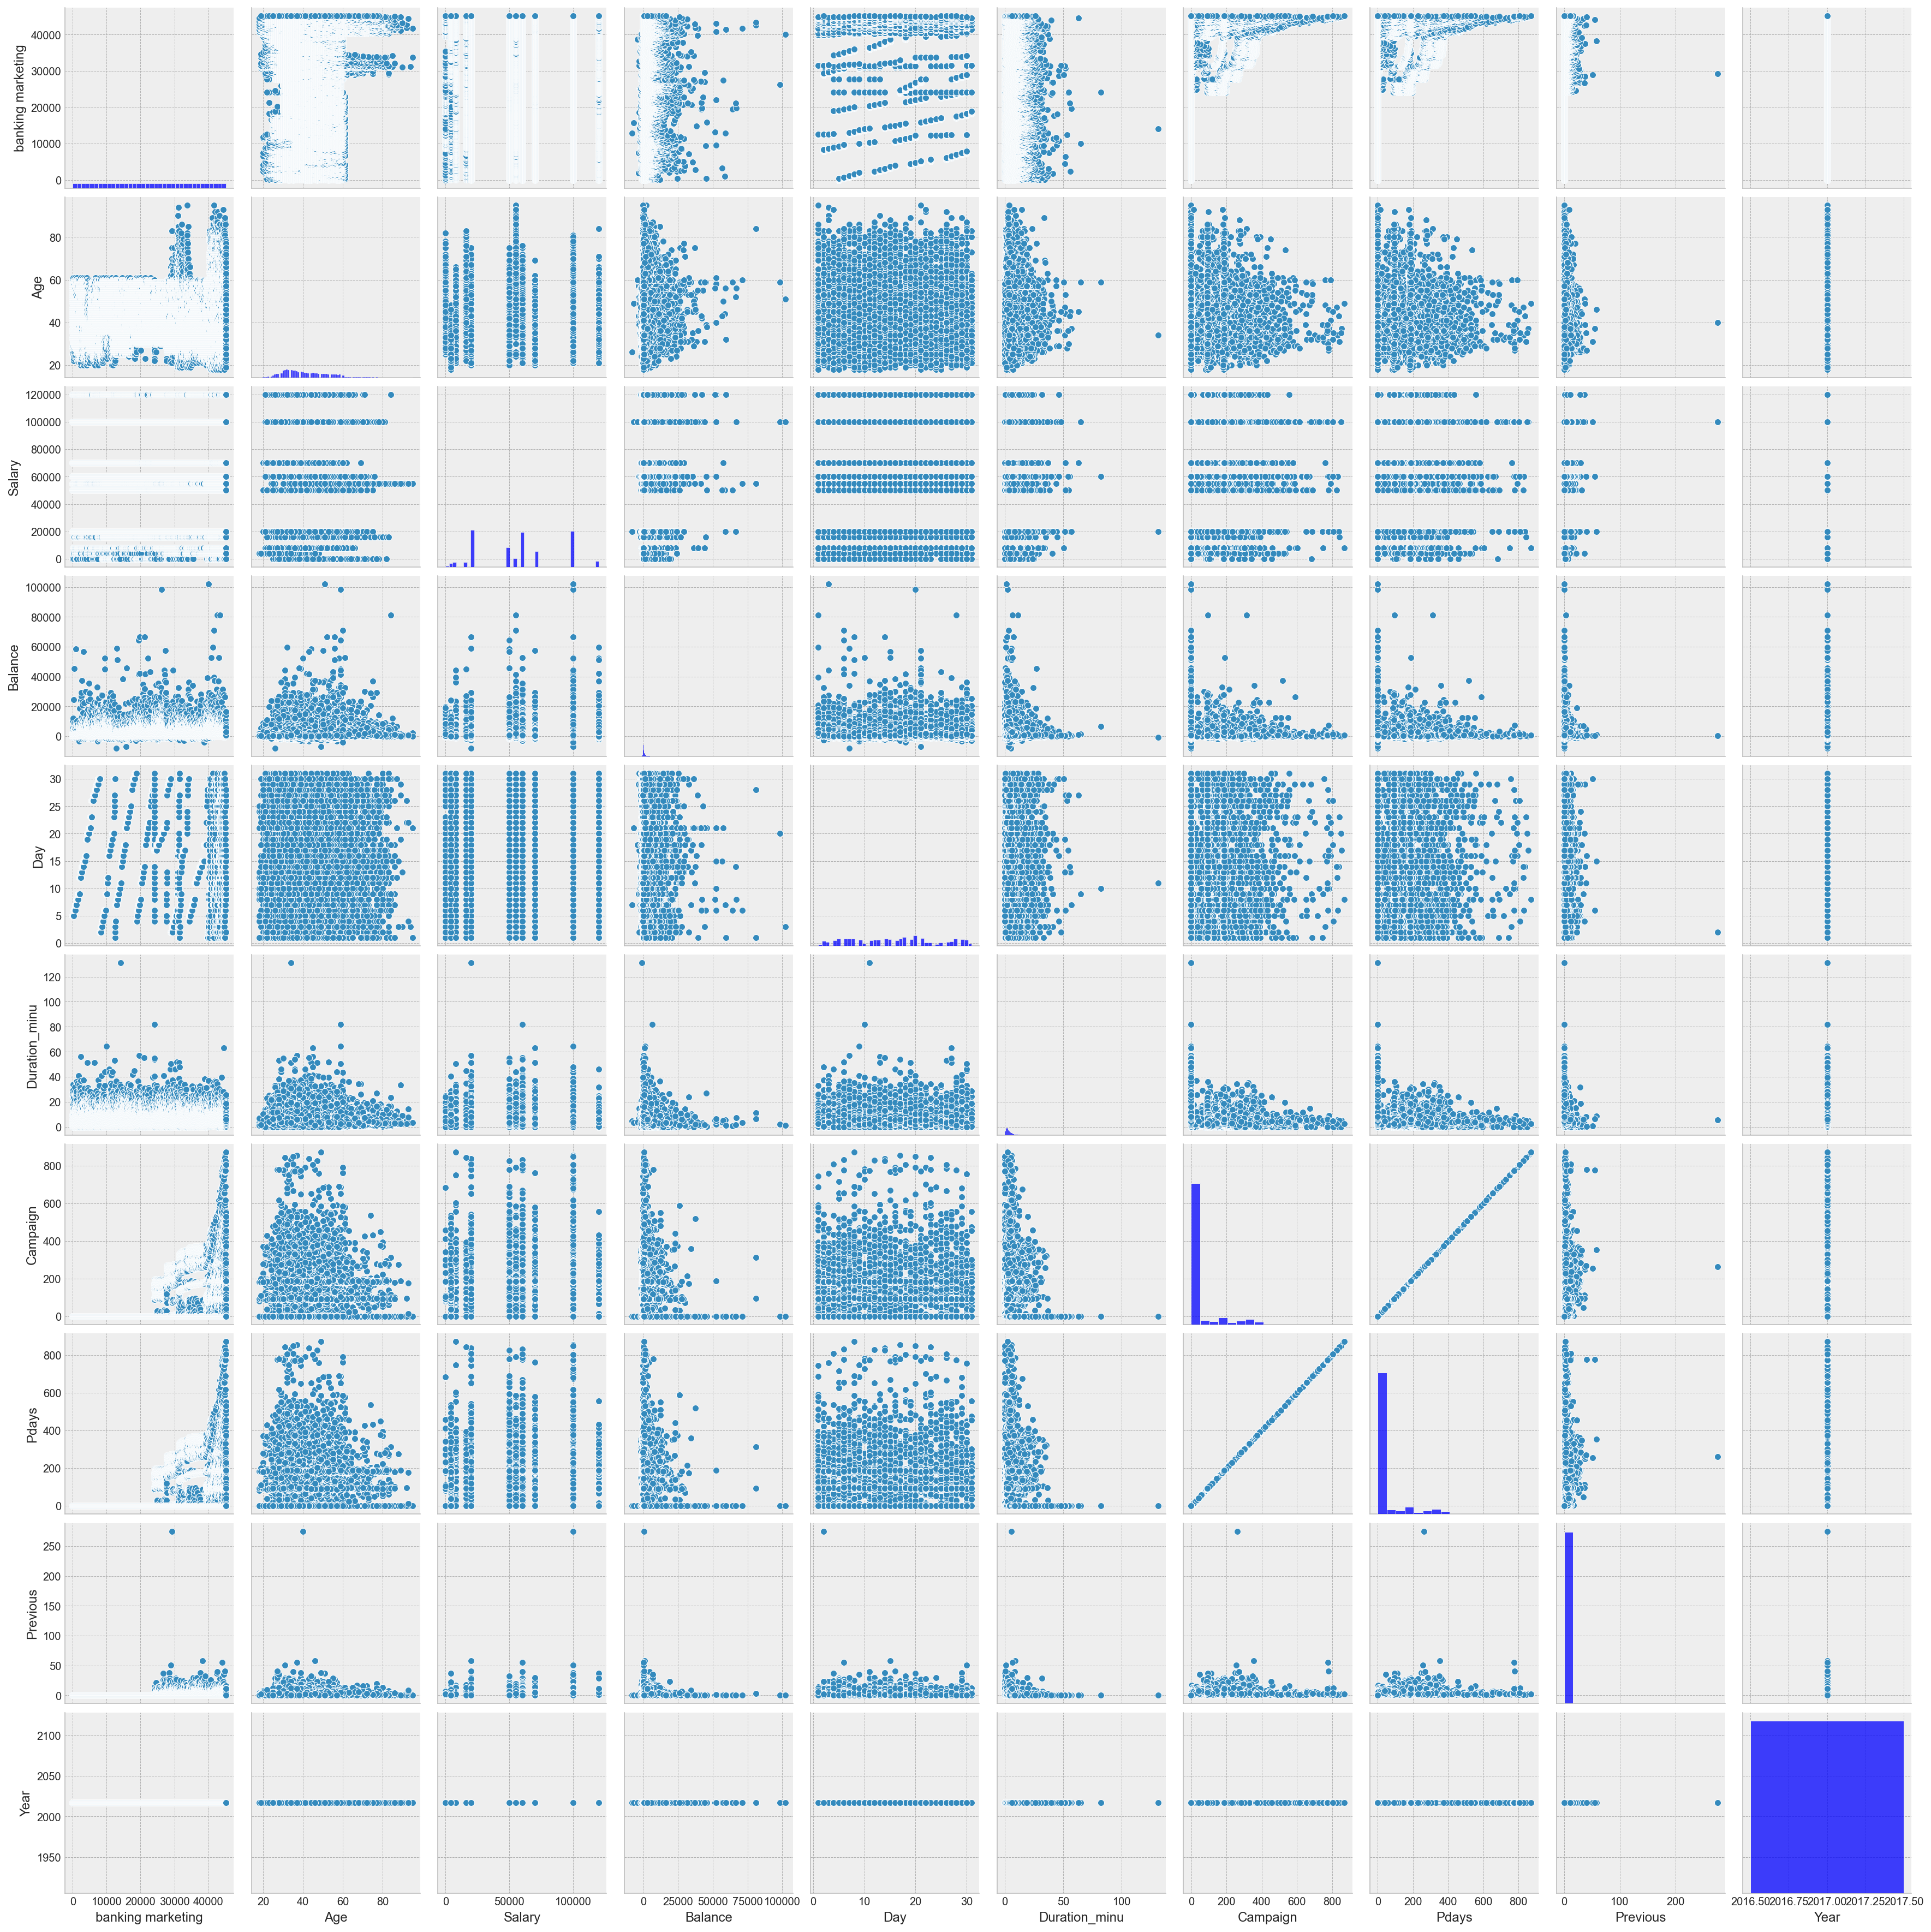

In [58]:
sns.pairplot(df);

### (6) Hexin Plot:

<AxesSubplot:xlabel='Salary', ylabel='Age'>

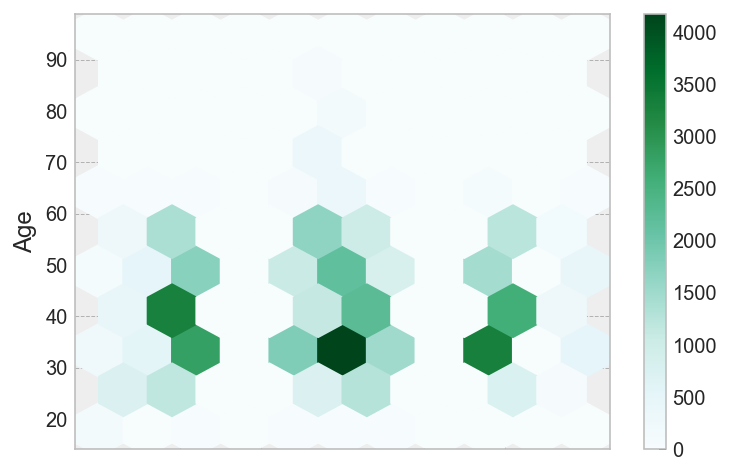

In [59]:
df.plot.hexbin(x='Salary',
                    y='Age',
                    reduce_C_function=np.sum,
                    gridsize=10)

### (7) Bar Plot:

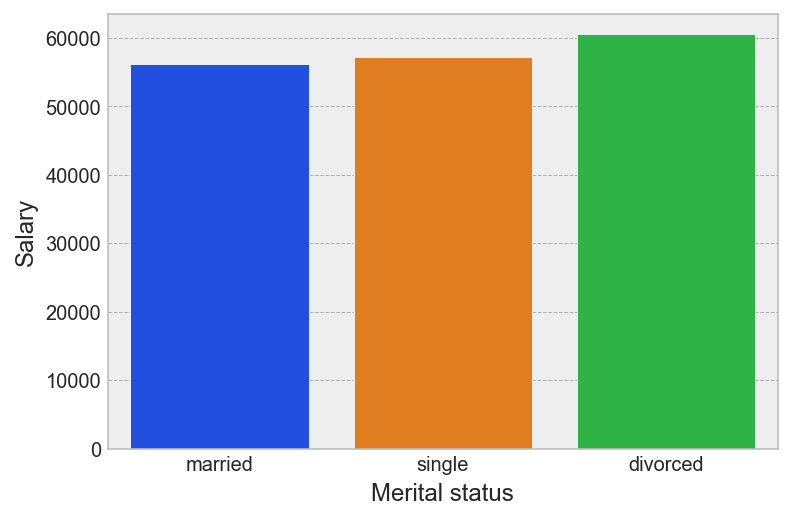

In [60]:
sns.barplot(data = df, x = 'Merital status', y = 'Salary', ci = None, palette='bright');

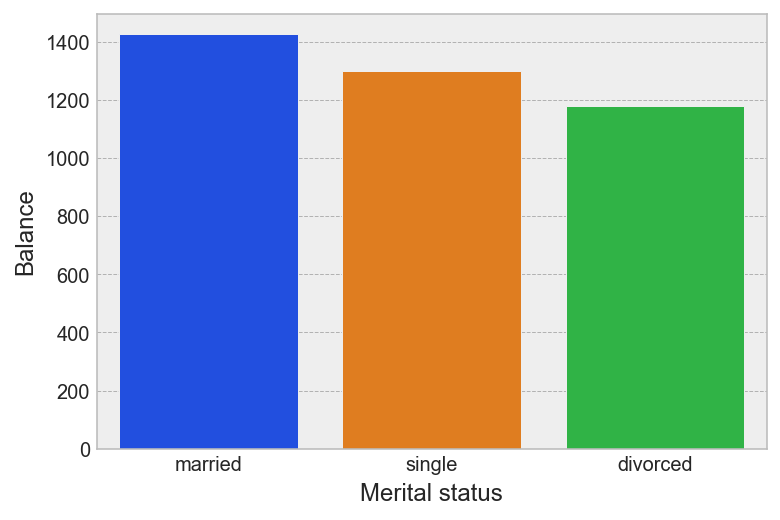

In [61]:
sns.barplot(data = df, x = 'Merital status', y = 'Balance', ci = None, palette='bright');

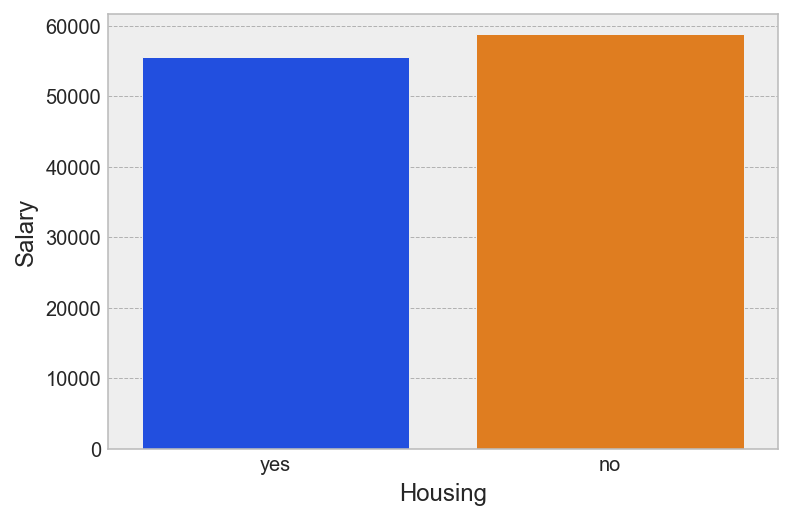

In [62]:
sns.barplot(data = df, x = 'Housing', y = 'Salary', ci = None, palette='bright');

### (8) Distribution Plot:

<Figure size 1200x800 with 0 Axes>

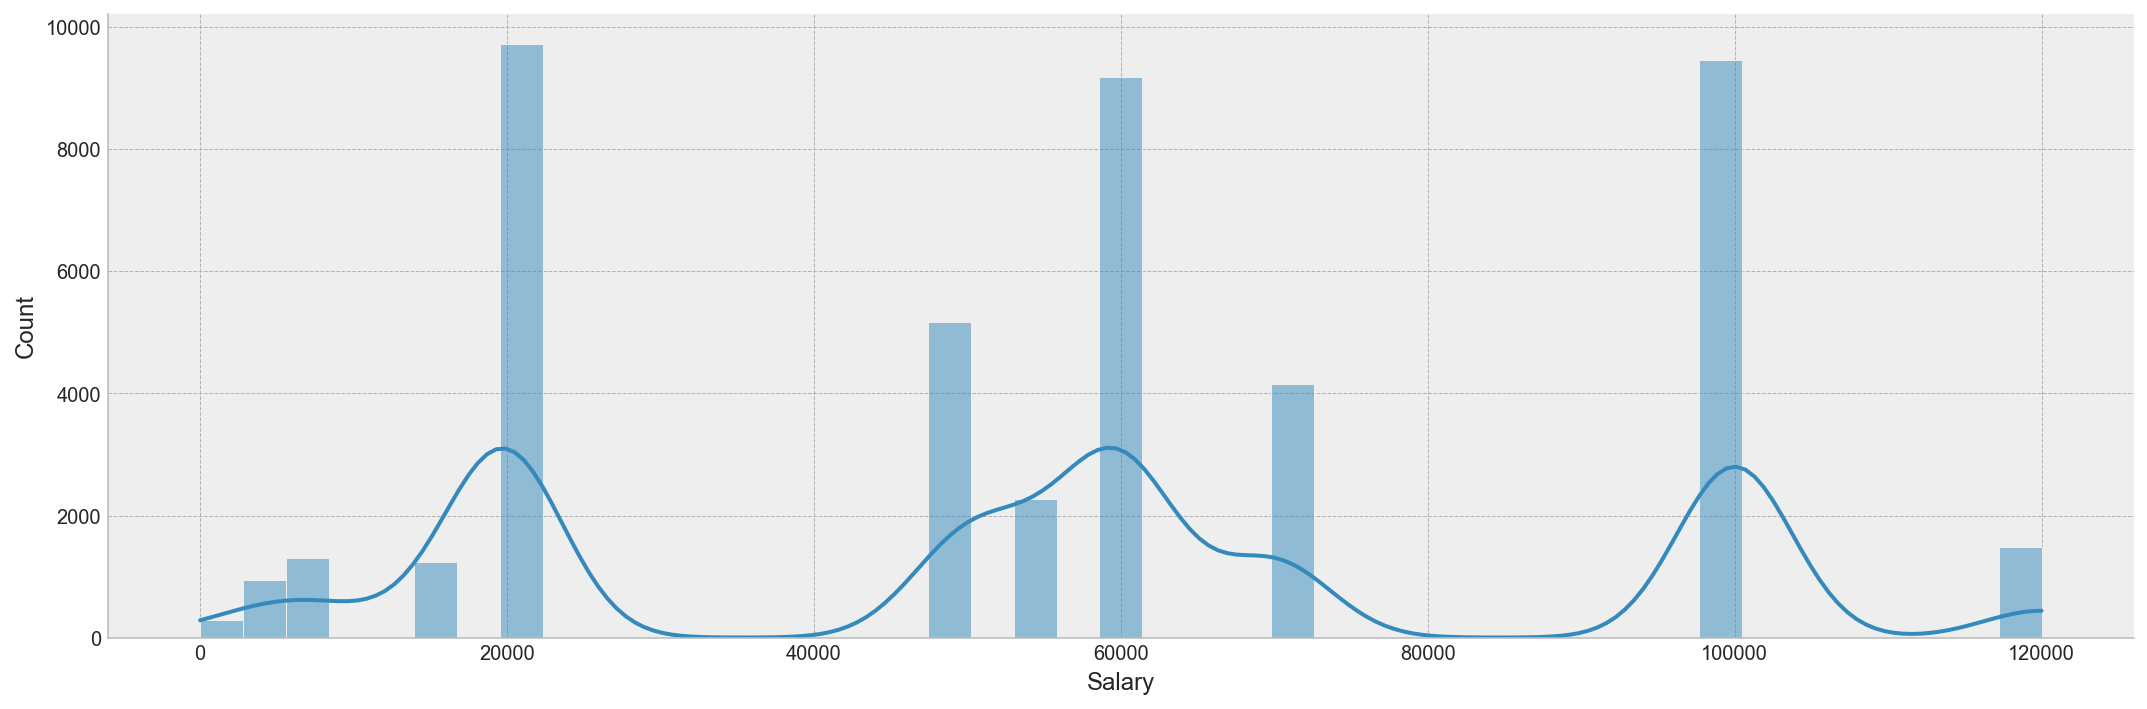

In [63]:
plt.figure(dpi = 200)
sns.displot(data = df, x = 'Salary', height = 5, aspect = 15/5,kde = True);

<Figure size 1200x800 with 0 Axes>

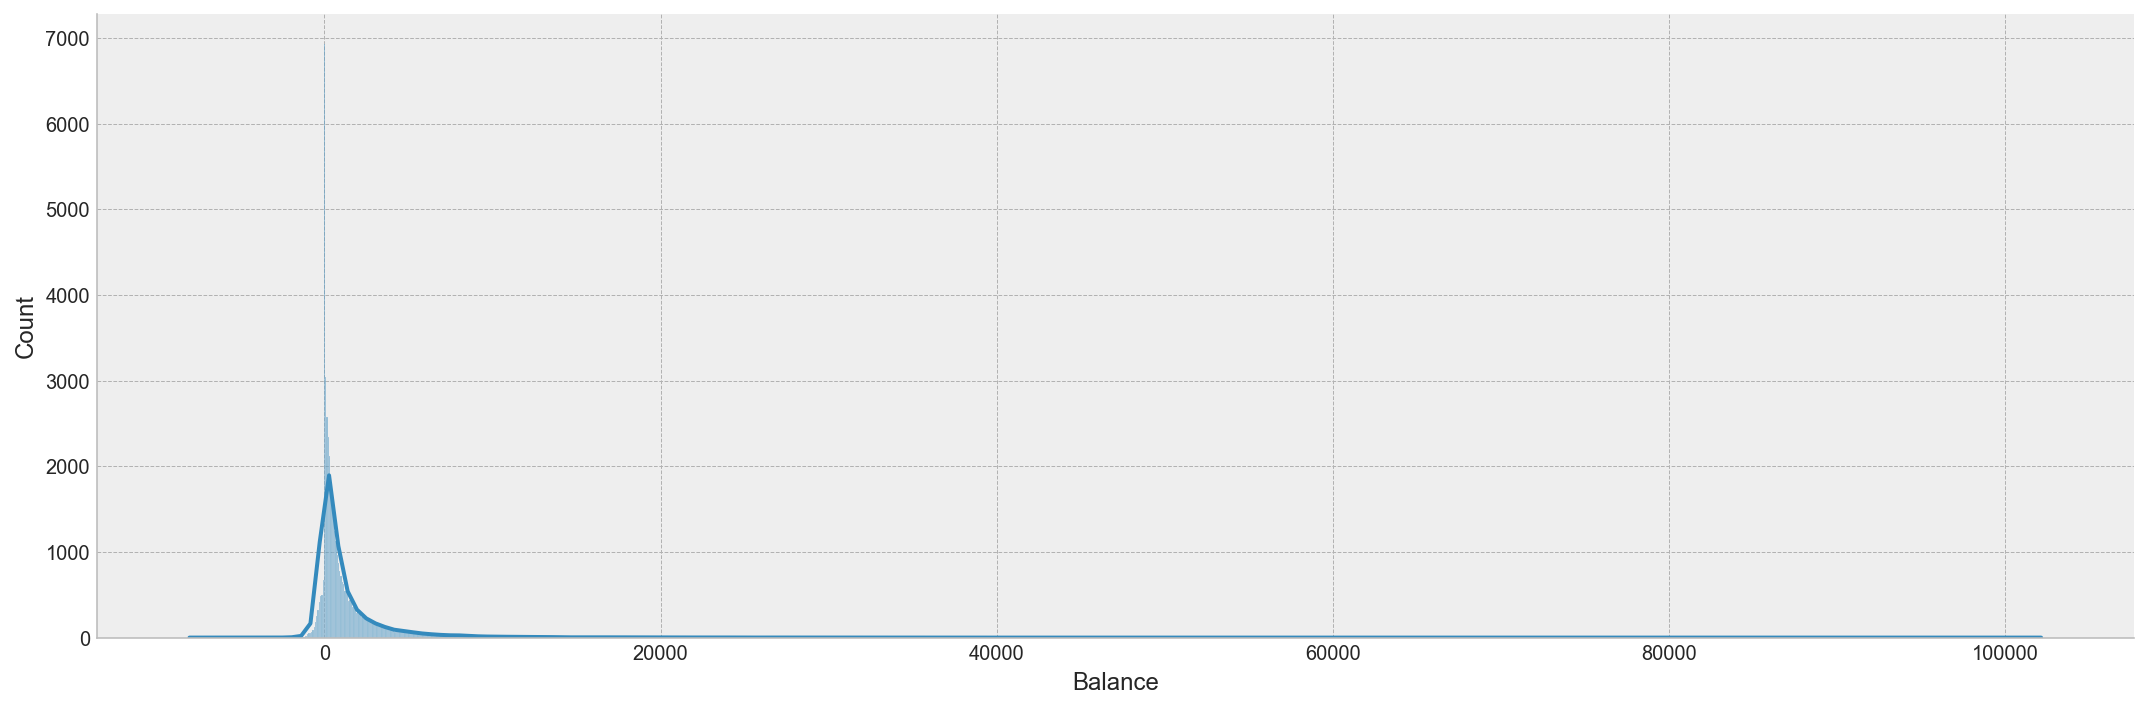

In [64]:
plt.figure(dpi = 200)
sns.displot(data = df, x = 'Balance', height = 5, aspect = 15/5,kde = True);

### (9) Heat Map:

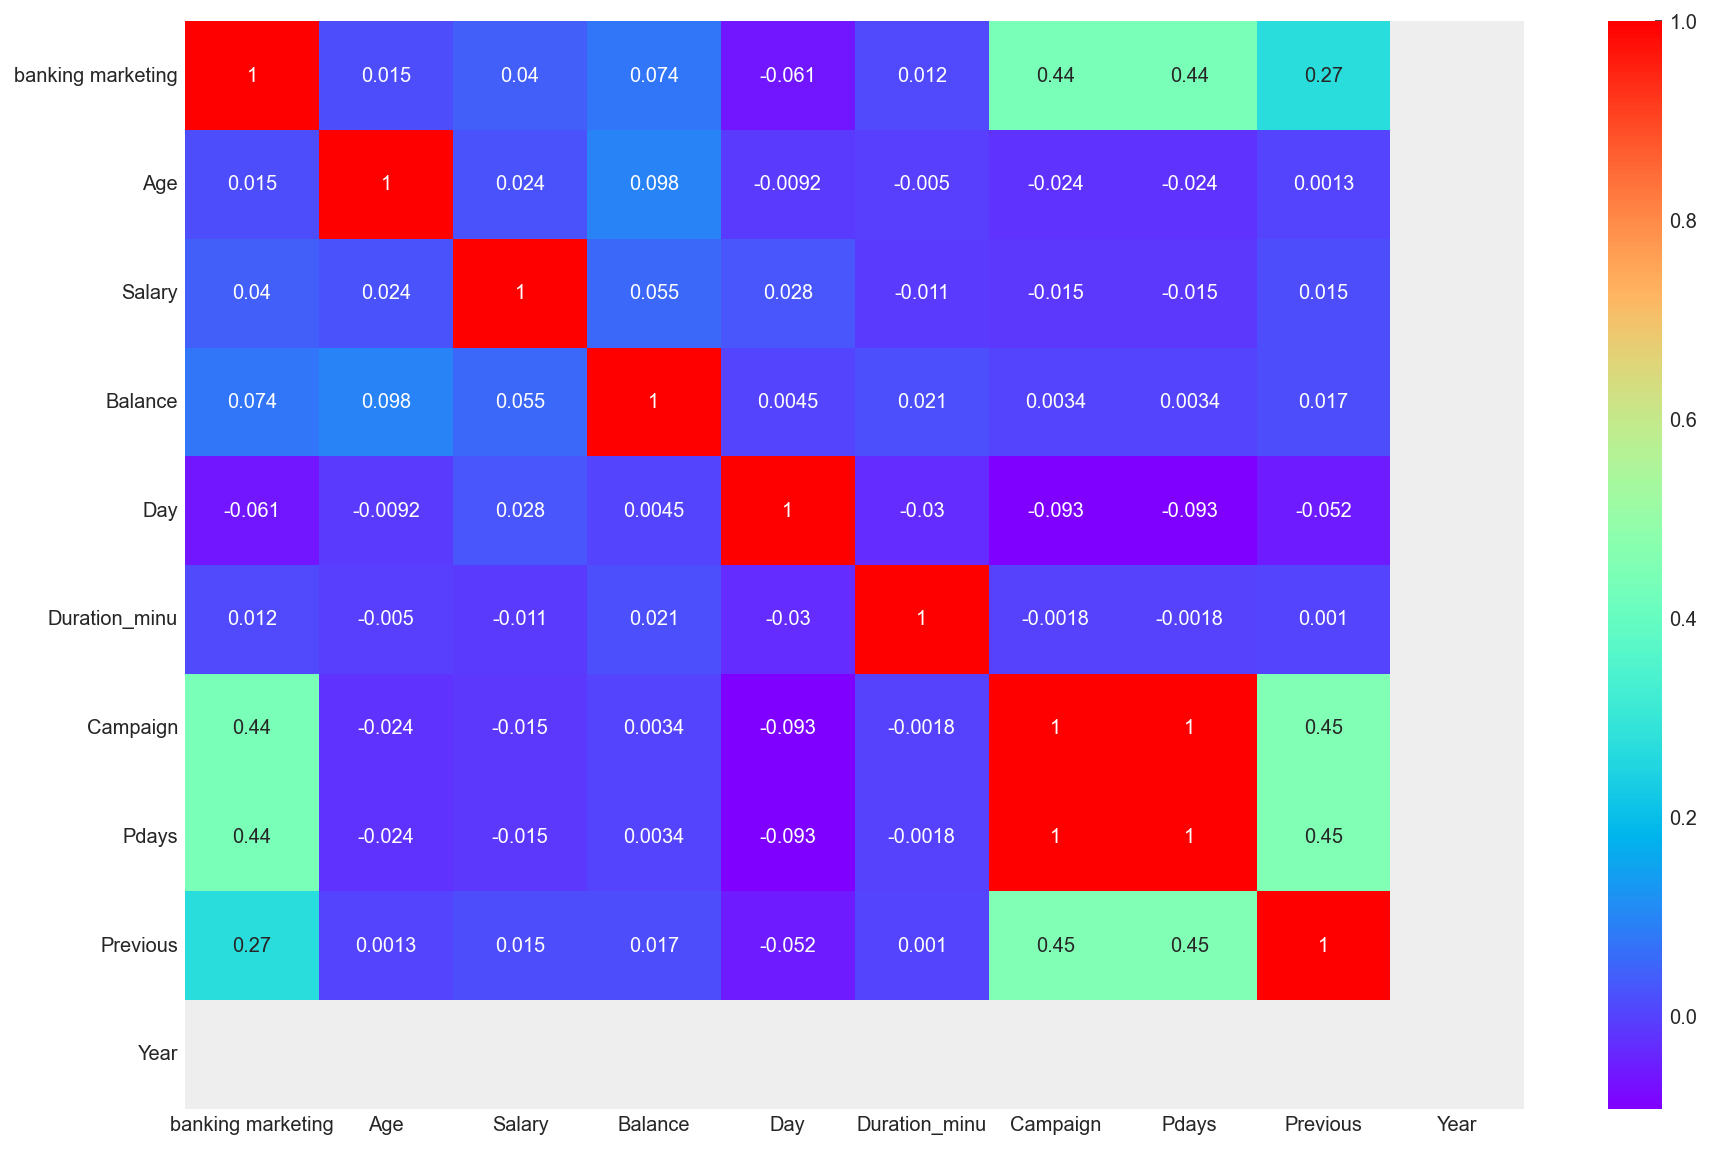

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap = 'rainbow', annot=True);

# Statistical Manipulation:

## 1- Find the correlation between the columns and draw the observations from it.

In [66]:
df.corr()

banking marketing       Age    Salary   Balance       Day  \
banking marketing           1.000000  0.014922  0.039966  0.073639 -0.061465   
Age                         0.014922  1.000000  0.024366  0.097753 -0.009185   
Salary                      0.039966  0.024366  1.000000  0.055469  0.027864   
Balance                     0.073639  0.097753  0.055469  1.000000  0.004503   
Day                        -0.061465 -0.009185  0.027864  0.004503  1.000000   
Duration_minu               0.012480 -0.005030 -0.010601  0.020901 -0.030299   
Campaign                    0.437729 -0.023795 -0.014968  0.003435 -0.093044   
Pdays                       0.437729 -0.023795 -0.014968  0.003435 -0.093044   
Previous                    0.271098  0.001302  0.014564  0.016674 -0.051710   
Year                             NaN       NaN       NaN       NaN       NaN   

                   Duration_minu  Campaign     Pdays  Previous  Year  
banking marketing       0.012480  0.437729  0.437729  0.271098   NaN  
Age                    -0.005030 -0.023795 -0.023795  0.001302   NaN  
Salary                 -0.010601 -0.014968 -0.014968  0.014564   NaN  
Balance                 0.020901  0.003435  0.003435  0.016674   NaN  
Day                    -0.030299 -0.093044 -0.093044 -0.051710   NaN  
Duration_minu           1.000000 -0.001820 -0.001820  0.001026   NaN  
Campaign               -0.001820  1.000000  1.000000  0.454820   NaN  
Pdays                  -0.001820  1.000000  1.000000  0.454820   NaN  
Previous                0.001026  0.454820  0.454820  1.000000   NaN  
Year                         NaN       NaN       NaN       NaN   NaN

## 2- What is the mean age and duration time of the customers with respect to every column?

In [67]:
df.describe()

banking marketing           Age         Salary        Balance  \
count       45211.000000  45211.000000   45211.000000   45211.000000   
mean        22606.000000     40.934795   57006.171065    1362.272058   
std         13051.435847     10.616926   32085.718415    3044.765829   
min             1.000000     18.000000       0.000000   -8019.000000   
25%         11303.500000     33.000000   20000.000000      72.000000   
50%         22606.000000     39.000000   60000.000000     448.000000   
75%         33908.500000     48.000000   70000.000000    1428.000000   
max         45211.000000     95.000000  120000.000000  102127.000000   

                Day  Duration_minu      Campaign         Pdays      Previous  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      15.806419       4.305567     40.197828     40.197828      0.580323   
std        8.322476       4.333282    100.128746    100.128746      2.303441   
min        1.000000       0.000000     -1.000000     -1.000000      0.000000   
25%        8.000000       1.716667     -1.000000     -1.000000      0.000000   
50%       16.000000       3.000000     -1.000000     -1.000000      0.000000   
75%       21.000000       5.316667     -1.000000     -1.000000      0.000000   
max       31.000000     131.000000    871.000000    871.000000    275.000000   

          Year  
count  45211.0  
mean    2017.0  
std        0.0  
min     2017.0  
25%     2017.0  
50%     2017.0  
75%     2017.0  
max     2017.0

## 3- Find the mean and median of every column response wise and draw the observations.

In [68]:
df.mean()
df.median()

banking marketing    22606.000000
Age                     40.934795
Salary               57006.171065
Balance               1362.272058
Day                     15.806419
Duration_minu            4.305567
Campaign                40.197828
Pdays                   40.197828
Previous                 0.580323
Year                  2017.000000
dtype: float64

banking marketing    22606.0
Age                     39.0
Salary               60000.0
Balance                448.0
Day                     16.0
Duration_minu            3.0
Campaign                -1.0
Pdays                   -1.0
Previous                 0.0
Year                  2017.0
dtype: float64

## 4- Show that the columns are following the Normal Distribution or not, if not following try to convert it non-normal to normal.

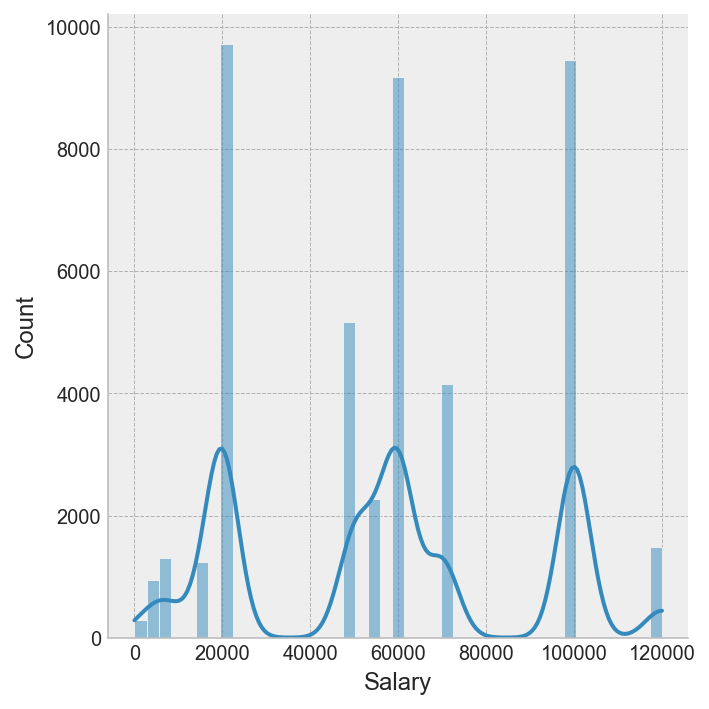

In [69]:
# salary 
sns.displot(data=df,x='Salary',kde=True)

In [70]:
np.mean(df.Salary)
np.std(df.Salary)

np.mean(df.Salary)+np.std(df.Salary)

np.mean(df.Salary)-np.std(df.Salary)

57006.17106456393

32085.363569046578

89091.53463361051

24920.807495517354

## 5- Converting salary column to normal disritution.

In [71]:
df.Salary.skew()

0.13782909379095207

In [72]:
np.log(df.Salary)

0        11.512925
1        11.002100
2        11.695247
3         9.903488
4             -inf
           ...    
45206    11.002100
45207    10.915088
45208    10.915088
45209     9.903488
45210    11.695247
Name: Salary, Length: 45211, dtype: float64

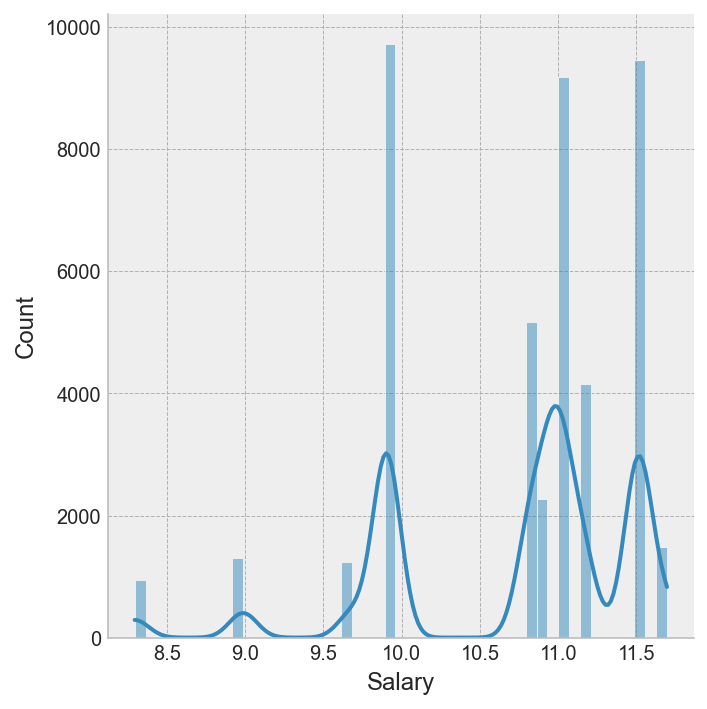

In [73]:
sns.displot(np.log(df.Salary), kde = True);

## Age of Costumer:

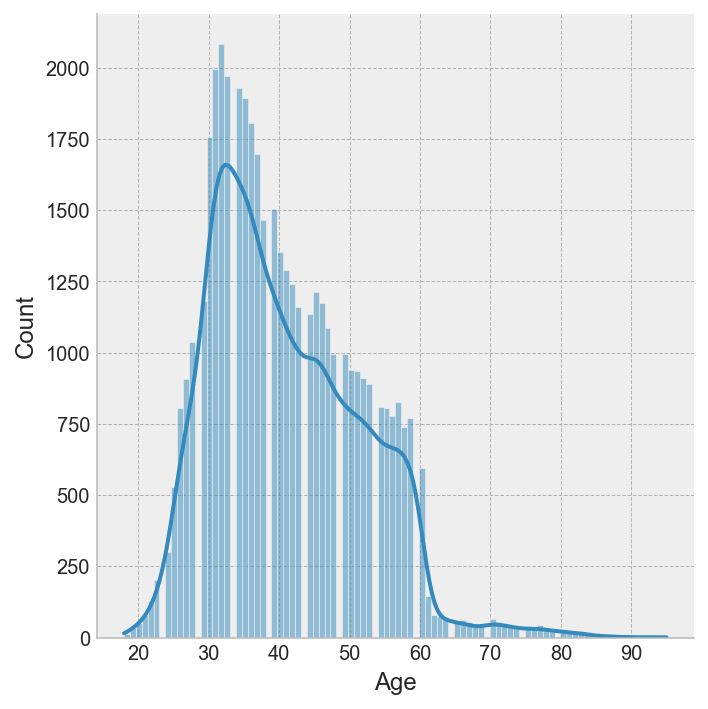

In [74]:
# Age
sns.displot(data=df,x='Age',kde=True)

In [75]:
df.Age.skew()

0.6853771512669647

In [76]:
np.log(df.Age).skew()

0.09908054576302029

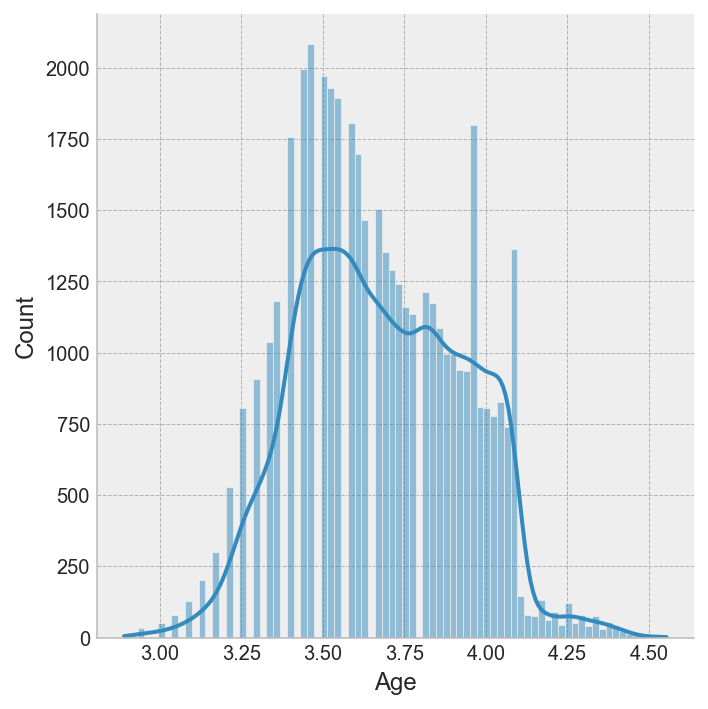

In [77]:
sns.displot(np.log(df.Age), kde = True);

## Balance Column:

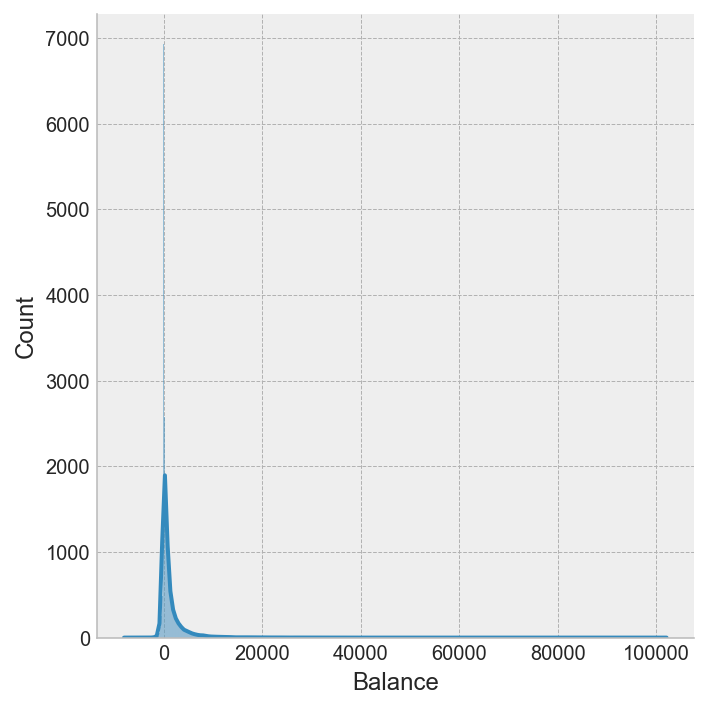

In [78]:
sns.displot(data=df,x='Balance',kde=True)

In [79]:
df.Balance.skew()

8.360308326166326

### Converting to normal distribution:

In [80]:
np.log(df.Balance)

0        7.669962
1        3.367296
2        0.693147
3        7.317212
4        0.000000
           ...   
45206    6.715383
45207    7.455298
45208    8.650850
45209    6.504288
45210    7.996654
Name: Balance, Length: 45211, dtype: float64

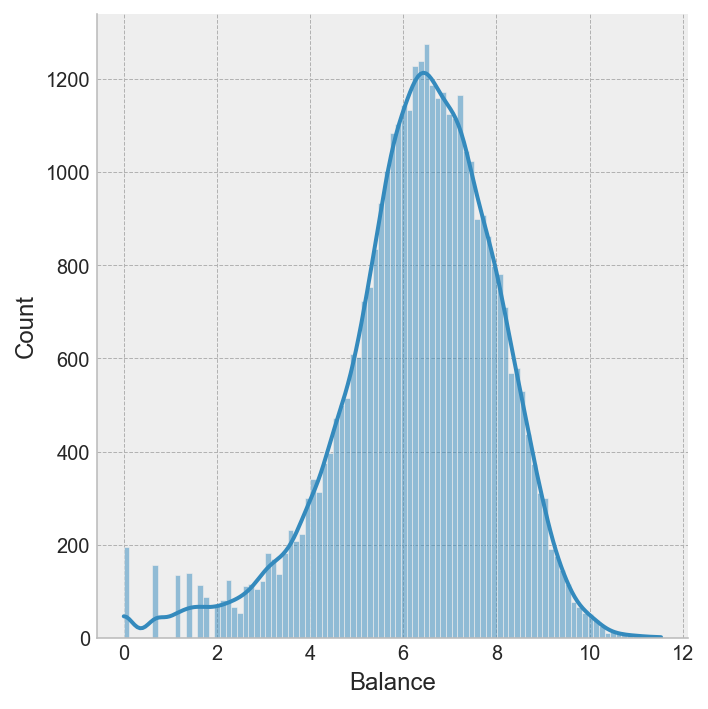

In [81]:
sns.displot(np.log(df.Balance),kde=True)

## Find the Best features using correlation and Chi-square test

###  Chi-square test:

In [82]:
import scipy.stats as stats

In [83]:
df_crosstab = pd.crosstab(df.Job,df.Housing,margins=True,margins_name='Total')
df_crosstab

Housing          no    yes  Total
Job                              
admin          1989   3182   5171
blue           2684   7048   9732
entrepreneur    618    869   1487
housemaid       842    398   1240
management     4780   4678   9458
retired        1773    491   2264
self            814    765   1579
services       1388   2766   4154
student         689    249    938
technician     3482   4115   7597
unemployed      760    543   1303
unknown         262     26    288
Total         20081  25130  45211

In [84]:
# significance level
alpha = 0.05

rows = df.Job.unique()
columns = df.Housing.unique()

print(rows, columns)

['management' 'technician' 'entrepreneur' 'blue' 'unknown' 'retired'
 'admin' 'services' 'self' 'unemployed' 'housemaid' 'student'] ['yes' 'no']


In [85]:
# Finding chi square value
chi_square = []
for i in columns:
    for j in rows:
        O = df_crosstab[i][j]
        E = df_crosstab[i]['Total'] * df_crosstab['Total'][j] / df_crosstab['Total']['Total']
        chi_square.append((O-E)**2/E)

In [86]:
chi_square

[63.794863997804036,
 2.7470234319781315,
 2.182112082553112,
 496.3480499077622,
 112.30424784699052,
 467.99235587860153,
 32.95365538421202,
 90.47094588179588,
 14.463534136876882,
 45.36255439859088,
 123.06371715292835,
 142.29418193919253,
 79.8349152066538,
 3.4377122078387754,
 2.7307642365698777,
 621.1456846861244,
 140.54109598102045,
 585.6604702569223,
 41.23924903168408,
 113.21820975098515,
 18.100125136184253,
 56.768138640336076,
 154.00583696295448,
 178.07145023315113]

In [87]:
chi_square = np.sum(chi_square)

print(chi_square)

3588.7308943697108


In [88]:
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print(" The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))

if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
else:
    conclusion = "Failed to reject the null hypothesis."
        
print("chisquare-score is:", chi_square, " and critical value is:", critical_value)
print(conclusion)


--------------------------------------------------------------------------------------
 The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 3588.7308943697108  and critical value is: 19.67513757268249
Null Hypothesis is rejected.


## 6)Find the probabilities with respect to the job role and education with customer responses.

In [89]:
# Making contingency table JOb with respect to response after call
contigency_table = pd.crosstab(df.Job,df.Response,margins=True,margins_name='Total')

In [90]:
contigency_table

Response         no   yes  Total
Job                             
admin          4536   630   5166
blue           9019   708   9727
entrepreneur   1363   123   1486
housemaid      1130   109   1239
management     8153  1301   9454
retired        1747   516   2263
self           1389   186   1575
services       3781   369   4150
student         669   269    938
technician     6752   840   7592
unemployed     1101   202   1303
unknown         254    34    288
Total         39894  5287  45181

### Marginal probability

In [91]:
p_No = 39919/45211
p_yes= 5292/45211

p_adm = 5171/45211
p_bc=9732/45211
p_ent = 1487/45211
p_hm = 1240/45211
p_manag = 9458/45211
p_ret = 2264/45211
p_semp = 1579/4511
p_ser = 4154/45211
p_std = 937/45211
p_tech = 7597/45211
p_unempl = 1303/45211
p_unkno = 288/45211

In [92]:
p_adm
p_bc
p_ent
p_hm
p_manag
p_ret
p_semp
p_ser
p_std
p_tech
p_unempl
p_unkno
p_yes
p_No


0.11437482028709828

0.21525734887527373

0.03289022582999712

0.027426953617482472

0.20919687686624935

0.05007630886288735

0.35003325205054314

0.09188029461856628

0.02072504478998474

0.16803432792904383

0.028820419809338436

0.006370131162770122

0.117051160115901

0.882948839884099

In [93]:
# Probability of Job with respect to resopnse of call 
contigency_table/45211

Response            no       yes     Total
Job                                       
admin         0.100330  0.013935  0.114264
blue          0.199487  0.015660  0.215147
entrepreneur  0.030148  0.002721  0.032868
housemaid     0.024994  0.002411  0.027405
management    0.180332  0.028776  0.209108
retired       0.038641  0.011413  0.050054
self          0.030723  0.004114  0.034837
services      0.083630  0.008162  0.091792
student       0.014797  0.005950  0.020747
technician    0.149344  0.018580  0.167924
unemployed    0.024352  0.004468  0.028820
unknown       0.005618  0.000752  0.006370
Total         0.882396  0.116941  0.999336

###  Probability of eduation with respect to resopnse of call

In [94]:
# Making contingency table JOb with respect to response after call
contigency_table = pd.crosstab(df.Education,df.Response,margins=True,margins_name='Total')

In [95]:
contigency_table

Response      no   yes  Total
Education                    
primary     6253   591   6844
secondary  20740  2449  23189
tertiary   11297  1995  13292
unknown     1604   252   1856
Total      39894  5287  45181

In [96]:
# Probability
contigency_table/45211

Response         no       yes     Total
Education                              
primary    0.138307  0.013072  0.151379
secondary  0.458738  0.054168  0.512906
tertiary   0.249873  0.044126  0.293999
unknown    0.035478  0.005574  0.041052
Total      0.882396  0.116941  0.999336

# Let’s check if we have any statistical patterns in the Data frame (using plots or analysis).

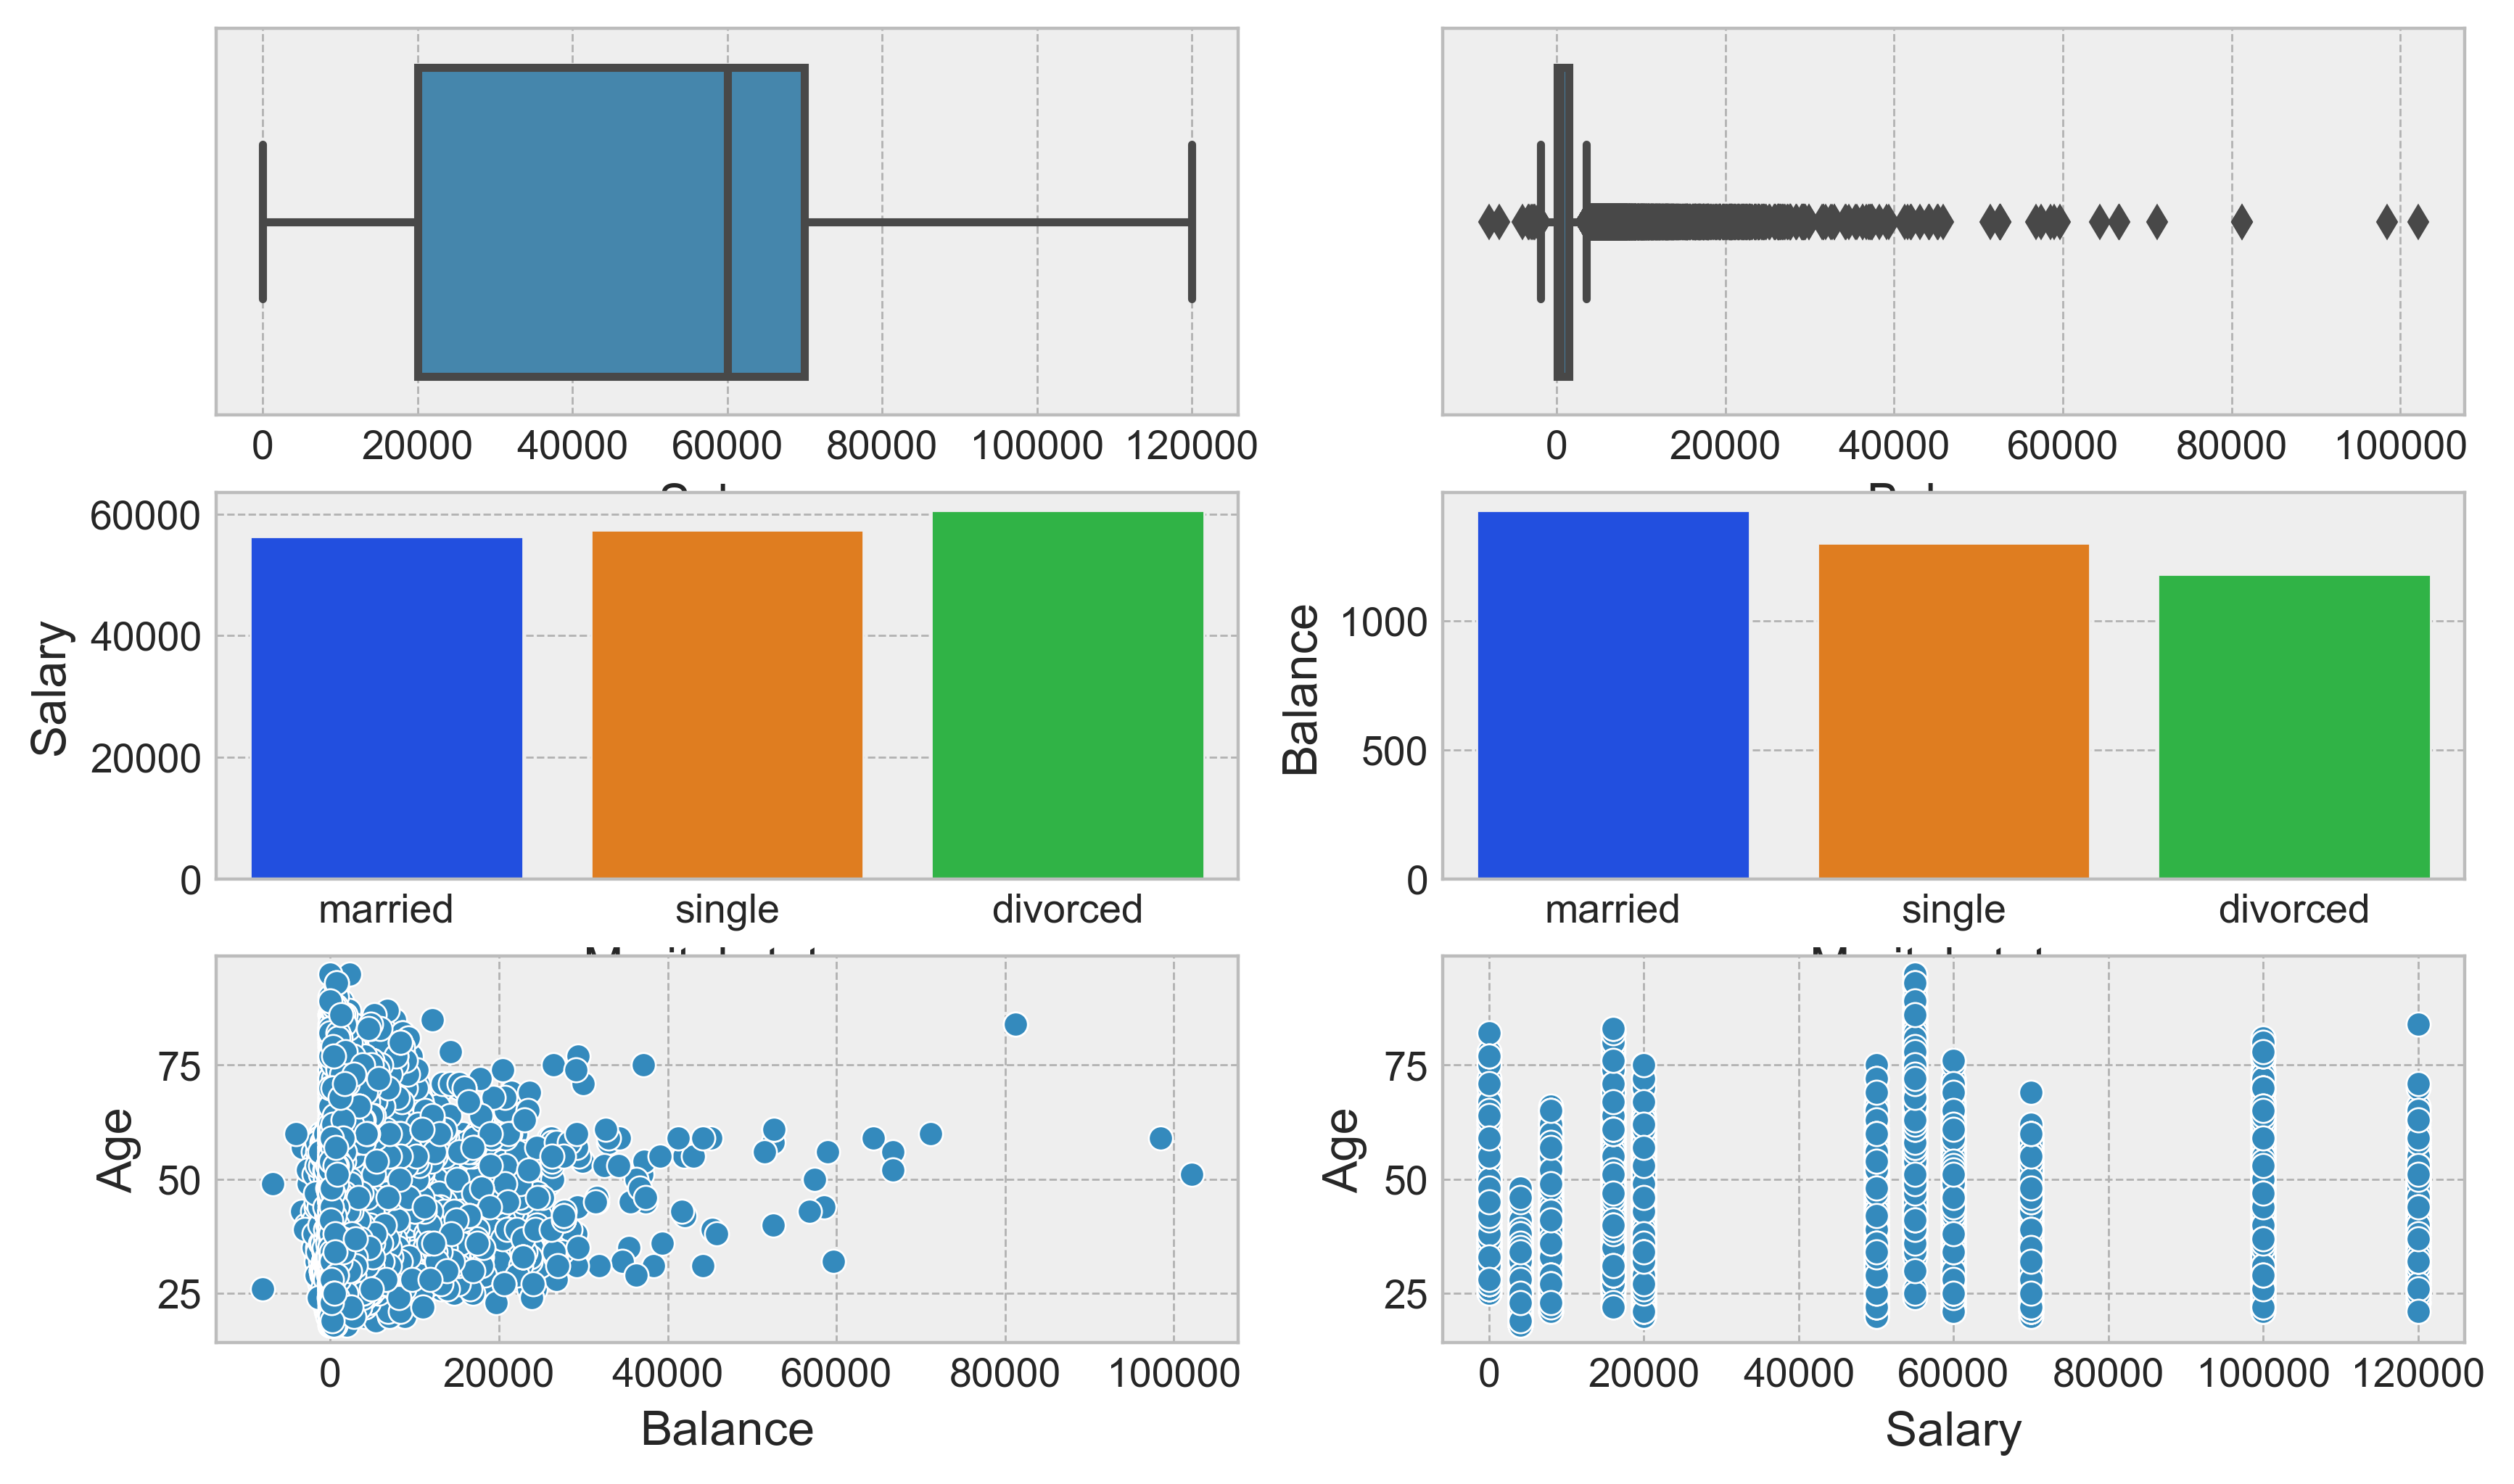

In [97]:
plt.figure(figsize=(10,6),dpi=200)

plt.subplot(321)
sns.boxplot(data=df,x = 'Salary')
plt.subplot(322)
sns.boxplot(data=df,x = 'Balance')

plt.subplot(323)
sns.barplot(data = df, x = 'Merital status', y = 'Salary', ci = None, palette='bright');
plt.subplot(324)
sns.barplot(data = df, x = 'Merital status', y = 'Balance', ci = None, palette='bright');
plt.subplot(325)
sns.scatterplot(data =df, x = 'Balance', y= 'Age');
plt.subplot(326)
sns.scatterplot(data =df, x = 'Salary', y= 'Age');


# plt.tight_layout();